<a href="https://colab.research.google.com/github/ConorD28/Airport-Analysis/blob/main/Albany_Airport_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load In**

In [1]:
def Modify_df(df):
  columns_to_select = ['Month', 'FlightDate', 'Operating_Airline ', 'OriginAirportID',
                    'OriginCityName', 'DestAirportID', 'DestCityName',
                    'DepartureDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                     'SecurityDelay', 'LateAircraftDelay', 'CRSDepTime', 'DepTime',
                     'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
                    'DepTimeBlk', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes',
                     'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode']
  df = df.loc[:, columns_to_select] # Select columns using the list
  df = df[(df.OriginAirportID.isin([10257, 13204])) | (df.DestAirportID.isin([10257, 13204]))] #10257 is Albany International and 13204 is Orlando International
  df.reset_index(drop=True, inplace=True)
  return df

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/ALB ORL Airports.csv')
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
#data = Modify_df(data)
data.loc[data['Month'].isin([1,2,3]), 'Quarter'] = 'Q1'
data.loc[data['Month'].isin([4,5,6]), 'Quarter'] = 'Q2'
data.loc[data['Month'].isin([7,8,9]), 'Quarter'] = 'Q3'
data.loc[data['Month'].isin([10,11,12]), 'Quarter'] = 'Q4'
data.Month = data.Month.apply(lambda x: calendar.month_name[x])
data.DepDel15 = np.where(data.DepDel15 == 0, 'Not Delayed at least 15 Minutes',
                            np.where(data.DepDel15== 1, 'Delayed at least 15 Minutes', data.DepDel15))
data.DepDel15 = np.where(data.DepDel15 == 'nan', 'Cancelled', data.DepDel15)
data.ArrDel15 = np.where(data.ArrDel15 == 0, 'Not Delayed at least 15 Minutes',
                            np.where(data.ArrDel15== 1, 'Delayed at least 15 Minutes', data.ArrDel15))
data.ArrDel15 = np.where(data.ArrDel15 == 'nan', 'Cancelled', data.ArrDel15)

#rename abbreviations to Airline Name:
data['Operating_Airline '] = data['Operating_Airline '].str.replace('WN', 'Southwest')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('PT', 'Piedmont')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('AA', 'American')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('DL', 'Delta')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('C5', 'CommuteAir')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('OH', 'PSA Airlines')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('9E', 'Endeavor Air')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('OO', 'SkyWest')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('UA', 'United')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('B6', 'JetBlue')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('G4', 'Allegiant')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('G7', 'GoJet')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('YX', 'Republic Airline')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('ZW', 'Air Wisconsin')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('NK', 'Spirit')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('F9', 'Frontier')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('AS', 'Alaska Airlines')
data['Operating_Airline '] = data['Operating_Airline '].str.replace('MQ', 'Envoy')

# **Functions**

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None #turn off setting with copy warning

In [5]:
def perc_Outliers(data_frame, col):
  q1 = np.nanpercentile(data_frame[col], 25)  # First quartile (Q1)
  q3 = np.nanpercentile(data_frame[col], 75)
  iqr = q3 - q1
  iqr_modified_value = iqr * 1.5
  lower_bound = q1 - iqr_modified_value
  upper_bound = q3 + iqr_modified_value

  outliers = 0
  for value in data_frame[col]:
    if value < lower_bound or value > upper_bound:
      outliers = outliers + 1
  percent_outliers = round(outliers/len(data_frame) * 100)
  return percent_outliers

In [6]:
def horizontal_bar_plot(df, col, title):
  df = df.sort_values(by = col, ascending = False)
  fig, ax = plt.subplots()
  ax.set_title(title)
  bars = ax.barh(df.index.values, df[col].values)
  ax.bar_label(bars, padding=3)
  bars[len(bars) - 1].set_color('gold')
  print()
  plt.show()

In [7]:
def plot_boxplot_with_mean(data, grouper, minutes, title_box, marker_size, ordering, fig_height):
    fig,ax = plt.subplots(figsize=(10,fig_height))
    if ordering != []:
      sns.boxplot(x=minutes, y=grouper, data=data, showfliers = False, width = .6, palette='coolwarm',
        medianprops={'color': 'black', 'linewidth': 2}, vert = False, order = ordering, ax = ax)
    else:
      sns.boxplot(x=minutes, y=grouper, data=data, showfliers = False, width = .6, palette='coolwarm',
        medianprops={'color': 'black', 'linewidth': 2}, vert = False, ax = ax)

    # Compute mean values
    means = data.groupby(grouper)[minutes].mean()
    data_groups = data[grouper].unique()

    if ordering != []:
      means = means.reindex(ordering)
      data_groups = sorted(data_groups, key = lambda x: ordering.index(x))
    # Overlay mean points:
    for i, group in enumerate(data_groups):
        mean_value = means[group]
        ax.scatter(mean_value, i, color='black', marker='o', s=marker_size, label='Mean' if i == 0 else "",
                   zorder=2)
    plt.title(title_box)
    plt.legend(loc="upper right")
    plt.show()

In [8]:
def remove_outliers(group):
  Q1 = group.quantile(0.25)
  Q3 = group.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return group[(group >= lower_bound) & (group <= upper_bound)]

In [9]:
def box_plots(df, col, title, groupby_col, order_by, max_allowed):
  num_boxes = df[groupby_col].nunique()
  scaled_marker_size = 300/num_boxes
  means = df.groupby(groupby_col)[col].mean()

  # Remove outliers per category
  df_no_outliers = df.groupby(groupby_col)[col].apply(remove_outliers).reset_index(level=0, drop=True)
  # Compute maximum value per category after outlier removal
  max_values = df_no_outliers.groupby(df[groupby_col]).max()

  # Identify categories where the max value (after outlier removal) is ≥ 150
  outlier_categories = max_values[max_values >= max_allowed].index.tolist()

  # Separate data into two groups
  df_filtered = df[~df[groupby_col].isin(outlier_categories)]
  df_outliers = df[df[groupby_col].isin(outlier_categories)]

  # Plot box plot without the outlier category
  if not df_outliers.empty:
    order_by = [x for x in order_by if x not in outlier_categories]

  df_order_by_values = df_filtered.iloc[:,0].unique()
  order_by = [x for x in order_by if x in df_order_by_values] #only get valeus in df
  plot_boxplot_with_mean(df_filtered, groupby_col, col, title, scaled_marker_size, order_by, 6)

  # Plot the outlier category separately if it exists
  if not df_outliers.empty:
    title = "Box Plot for other " + groupby_col + "(s)"
    order_by = []
    plot_boxplot_with_mean(df_outliers, groupby_col, col, title, scaled_marker_size, order_by, 3)

In [10]:
def tables_graphs_by_split(data_frame, Group, delayMins, delayed15, cityName, Choice, order_box_plot, max_box):
  data_frame2 = data_frame.groupby(Group).agg(Arrivals=(delayMins, 'count'), Flights=(delayMins, 'size'),
       Median_Minutes_Delayed=(delayMins, lambda x: round(x.median())), Mean_Minutes_Delayed=(delayMins, lambda x: round(x.mean())),
       Delayed_15=(delayed15, lambda x: x[x=='Delayed at least 15 Minutes'].count()),
      Cancelled=(delayed15, lambda x: x[x.isin(['Cancelled'])].count())) #Arrivals may really be departures, change name later down if it is departures
  data_frame2['% Cancelled'] = round(data_frame2.Cancelled/data_frame2.Flights*100)
  data_frame2['% of Arrivals that Arrived 15 Minutes Late'] = round(data_frame2.Delayed_15/data_frame2.Arrivals*100) #arrived or departed 15 minutes late, change name later down if it is departed

  title = 'Delay Minutes by ' + Group
  c = 0

  if Group == cityName:
    data_frame2 = data_frame2.sort_values(by = 'Flights', ascending = False)
    data_frame2 = data_frame2.head(10)
    top_10_cities = data_frame2.index.values

  df2 = data_frame2[['Arrivals', 'Mean_Minutes_Delayed', 'Median_Minutes_Delayed']]
  if Choice == 'Departures':
    df3 = data_frame[[Group, 'DepDelayMinutes']]
    df2 = df2.rename(columns = {'Arrivals': 'Departures'})
    df3 = df3.rename(columns = {'Arrivals': 'Departures'})
    if Group == cityName:
      df3 = df3[df3[Group].isin(top_10_cities)]
    box_plots(df3, 'DepDelayMinutes', title, Group, order_box_plot, max_box)
  else:
    df3 = data_frame[[Group, 'ArrDelayMinutes']]
    title = 'How Late Flights Arrived by ' + Group
    if Group == cityName:
      df3 = df3[df3[Group].isin(top_10_cities)]
    box_plots(df3, 'ArrDelayMinutes', title, Group, order_box_plot, max_box)
  df2 = df2.sort_values(by = 'Mean_Minutes_Delayed')

  if data_frame2['% of Arrivals that Arrived 15 Minutes Late'].nunique() != 1:
    c = 1
    if Choice == 'Departures':
      data_frame2 = data_frame2.rename(columns = {'% of Arrivals that Arrived 15 Minutes Late': '% of Departed Flights Delayed 15 Minutes'})
      title = '% of Departed Flights Delayed 15 Minutes'
    else:
      data_frame2 = data_frame2.sort_values(by = '% of Arrivals that Arrived 15 Minutes Late', ascending = False)
      title = '% of Arrivals that Arrived 15 Minutes Late'
    horizontal_bar_plot(data_frame2, title, title)
    data_frame2 = data_frame2.sort_values(by = title)

  if Choice == 'Departures':
    if Group == cityName:
      df2 = df2.rename(columns = {'Median_Minutes_Delayed': 'Median_Mins_Delayed', 'Mean_Minutes_Delayed': 'Mean_Mins_Delayed'})
    print('\n             Departed Flights By' + ' ' + Group + ':\n')
    print(df2)
  else:
    print('\n             Arrival Flights By' + ' ' + Group + ':\n')
    df2 = df2.rename(columns = {'Median_Minutes_Delayed': 'Median Mins. Late', 'Mean_Minutes_Delayed': 'Mean Mins. Late'})
    print(df2)
  print()
  if c==1:
    data_frame2['% Delayed 15 Minutes'] = round(data_frame2.Delayed_15/data_frame2.Flights*100)
    if Choice == 'Departures':
      print(data_frame2[['Flights', '% Delayed 15 Minutes', '% Cancelled']])
    else:
      data_frame2 = data_frame2.rename(columns = {'% Delayed 15 Minutes': '% 15 Minutes Late'})
      print(data_frame2[['Flights', '% 15 Minutes Late', '% Cancelled']])
  print()

In [11]:
def Airport_delay_data(df, delay_mins, delayed_15, time_block, city_name, choice, max_plot):
  mean_mins_delayed = round(np.nanmean(df[delay_mins]))
  median_mins_delayed = round(np.nanmedian(df[delay_mins]))
  DelayMinutes_Outliers = perc_Outliers(df, delay_mins)
  print('% of Outliers for Delay Minutes is ', DelayMinutes_Outliers)
  if choice == 'Departures':
    print('The median is', median_mins_delayed, 'minutes departed after scheduled time.')
    print('On average, flights depart', mean_mins_delayed, 'minutes delayed.\n')
  else:
    print('The median is', median_mins_delayed, 'minutes arrived after scheduled time.')
    print('On average, flights arrive', mean_mins_delayed, 'minutes late.\n')

#Delayed at Least 15 Minutes:
  Delayed_15_indices = df[delayed_15].value_counts().index
  Delayed_15_values = df[delayed_15].value_counts().values
  perc_Delayed_15 = round(df[delayed_15].value_counts()/len(df) * 100, 1).values
  Delayed_15_data = {'Flights': Delayed_15_values, '%': perc_Delayed_15}
  if choice == 'Departures':
    Delayed_15_df = pd.DataFrame(Delayed_15_data, index = Delayed_15_indices)
  else:
    Delayed_15_indices = ['Arrived Less than 15 Minutes Late', 'Arrived at Least 15 Minutes Late', 'Cancelled']
    Delayed_15_df = pd.DataFrame(Delayed_15_data, index = Delayed_15_indices)
  if Delayed_15_df['%'].nunique() != 1:
    fig, ax = plt.subplots()
    ax.pie(Delayed_15_df['%'], labels = Delayed_15_df.index.values, autopct='%1.0f%%')
    if choice == 'Departures':
      ax.set_title('Flights Cancelled/Delayed')
    else:
      ax.set_title('Flights Cancelled/Arrived Late')
    plt.tight_layout()
    plt.show()
    print()
    print(Delayed_15_df)
    print()

#Quarter:
  order_of_boxes = ['Q1', 'Q2', 'Q3', 'Q4']
  tables_graphs_by_split(df, 'Quarter', delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Month:
  order_of_boxes = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                    'August', 'September', 'October', 'November', 'December']
  tables_graphs_by_split(df, 'Month', delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Part of Day:
  df['Part_Of_Day'] = df[time_block].apply(lambda x: 'Morning' if x in ['0001-0559',
    '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059', '1100-1159'] else ('Afternoon' if x in ['1200-1259',
                                                                                '1300-1359', '1400-1459', '1500-1559',
                                                                                  '1600-1659'] else 'Evening'))
  order_of_boxes = ['Morning', 'Afternoon', 'Evening']
  tables_graphs_by_split(df, 'Part_Of_Day', delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Time Block:
  order_of_boxes = ['0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059',
                    '1100-1159', '1200-1259', '1300-1359', '1400-1459', '1500-1559', '1600-1659', '1700-1759',
                    '1800-1859', '1900-1959', '2000-2059', '2100-2159', '2200-2259', '2300-2359']
  tables_graphs_by_split(df, time_block, delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)

#Destination City Delay Time:
  order_of_boxes = []
  tables_graphs_by_split(df, city_name, delay_mins, delayed_15, city_name, choice, order_of_boxes, max_plot)
  #print('\n Note: Diverted means flight did not land at destination city. \n')

In [12]:
def Airport_delays_by_Airline(df, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight):
#Flights:
    grouped_df = df.groupby('Operating_Airline ').agg(Flights=(DelayMins, 'size'),
                                                      Arrivals_or_Departures=(DelayMins, 'count'),
                                                                Delayed_15=(Delayed15, lambda x: x[x =='Delayed at least 15 Minutes'].count()),
                                                                Cancelled=(Delayed15, lambda x: x[x =='Cancelled'].count()),
                                                                Mean_Minutes_Delayed=(DelayMins, lambda x: round(x.mean())),
                                                                Median_Minutes_Delayed=(DelayMins, lambda x: round(x.median())))
    grouped_df['% of Total Flights'] = round(grouped_df.Flights/sum(grouped_df.Flights) * 100, 1)
    fig, ax = plt.subplots()
    ax.pie(grouped_df['% of Total Flights'], labels = grouped_df.index.values, autopct='%1.1f%%')
    ax.set_title('% of Scheduled Flights')
    plt.tight_layout()
    plt.show()
    print()

#Cancelled/Delayed 15:
    grouped_df['Delayed 15 Mins %'] = round(grouped_df['Delayed_15']/grouped_df['Arrivals_or_Departures'] * 100)
    grouped_df['Cancelled %'] = round(grouped_df['Cancelled']/grouped_df['Flights'] * 100, 2)
    title = '% of Scheduled Flights Cancelled'
    horizontal_bar_plot(grouped_df, 'Cancelled %', title)
    if type_of_flight == 'Departures':
      title = '% of Departed Flights Delayed at least 15 Minutes'
      grouped_df = grouped_df.rename(columns = {'Arrivals_or_Departures': 'Departures'})
    else:
      title = '% of Arrival Flights Delayed at least 15 Minutes'
      grouped_df = grouped_df.rename(columns = {'Arrivals_or_Departures': 'Arrivals'})
    horizontal_bar_plot(grouped_df, 'Delayed 15 Mins %', title)

    if type_of_flight == 'Departures':
      print('\n         % of Departed Flights Delayed at least 15 Minutes: \n')
      delay15 = grouped_df[['Departures', 'Delayed 15 Mins %']]
    else:
      print('\n         % of Arrival Flights Delayed at least 15 Minutes: \n')
      delay15 = grouped_df[['Arrivals', 'Delayed 15 Mins %']]
    delay15 = delay15.sort_values(by = 'Delayed 15 Mins %')
    print(delay15)
    print('\n           % of Scheduled Flights Cancelled: \n')
    cancelled = grouped_df[['Flights', 'Cancelled %']]
    cancelled = cancelled.sort_values(by = 'Cancelled %')
    print(cancelled)

#Delay Length:
    if type_of_flight == 'Departures':
        Delays = grouped_df[['Departures', 'Mean_Minutes_Delayed', 'Median_Minutes_Delayed']]
    else:
        Delays = grouped_df[['Arrivals', 'Mean_Minutes_Delayed', 'Median_Minutes_Delayed']]

    title = 'Mean Delay Length (minutes):'
    horizontal_bar_plot(grouped_df, 'Mean_Minutes_Delayed', title)
    Delays = Delays.sort_values(by = 'Mean_Minutes_Delayed')

    Delays = Delays.rename(columns = {'Median_Minutes_Delayed': 'Median_Mins_Delayed', 'Mean_Minutes_Delayed': 'Mean_Mins_Delayed'})
    print('\n                          Delay Length: \n')
    print(Delays)

#Most Popular Airline:
    Most_popular = grouped_df.sort_values(by = 'Flights', ascending = False)
    Most_popular_airline = Most_popular.head(1)
    Most_popular_airline_name = str(Most_popular_airline.index.values)
    Most_popular_airline_name = Most_popular_airline_name[2:-2]
    df_most_popular = df[df['Operating_Airline '] == Most_popular_airline_name]
    print("\n                          " + Most_popular_airline_name + ":" + '\n')
    Airport_delay_data(df_most_popular, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)
    print('\n           Southwest Flights Delayed at least 15 Minutes: \n')
    if type_of_flight == 'Departures':
      df_most_popular_15 = df_most_popular[df_most_popular.DepDelayMinutes >= 15]
    else:
      df_most_popular_15 = df_most_popular[df_most_popular.ArrDelayMinutes >= 15]
    Airport_delay_data(df_most_popular_15, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)

#2nd Most Popular Airline:
    Second_most_popular_airline = Most_popular.iloc[1]
    Second_most_popular_airline = pd.DataFrame(Second_most_popular_airline).T
    Second_most_popular_airline_name = str(Second_most_popular_airline.index.values)
    Second_most_popular_airline_name = Second_most_popular_airline_name[2:-2]
    df_second_most_popular = df[df['Operating_Airline '] == Second_most_popular_airline_name]
    print("\n                          " + Second_most_popular_airline_name + ":" + '\n')
    Airport_delay_data(df_second_most_popular, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)

#3rd Most Popular Airline:
    Third_most_popular_airline = Most_popular.iloc[2]
    Third_most_popular_airline = pd.DataFrame(Third_most_popular_airline).T
    Third_most_popular_airline_name = str(Third_most_popular_airline.index.values)
    Third_most_popular_airline_name = Third_most_popular_airline_name[2:-2]
    df_third_most_popular = df[df['Operating_Airline '] == Third_most_popular_airline_name]
    print("\n                          " + Third_most_popular_airline_name + ":" + '\n')
    Airport_delay_data(df_third_most_popular, DelayMins, Delayed15, Time_Block, City_Name, type_of_flight, 300)

# **Departures**

In [13]:
ALB_Dep = data[data.OriginAirportID==10257]
ALB_Dep.reset_index(drop=True, inplace=True)

Albany International Airport had 15608 flights that departed in 2024.

% of Outliers for Delay Minutes is  19
The median is 0 minutes departed after scheduled time.
On average, flights depart 17 minutes delayed.



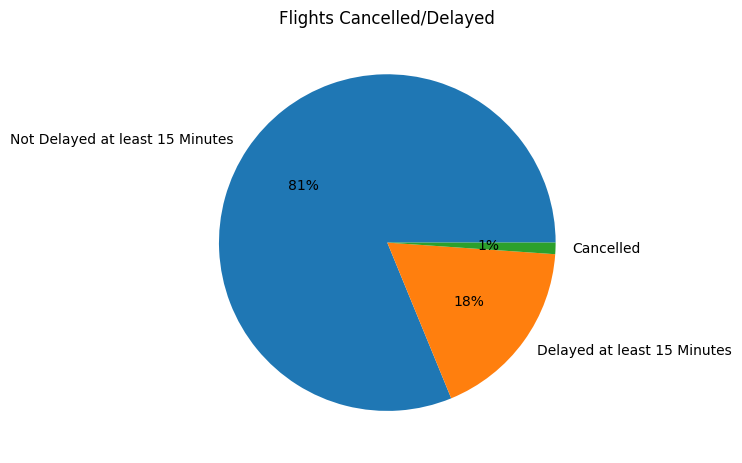


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes    12809  81.2
Delayed at least 15 Minutes         2799  17.7
Cancelled                            173   1.1



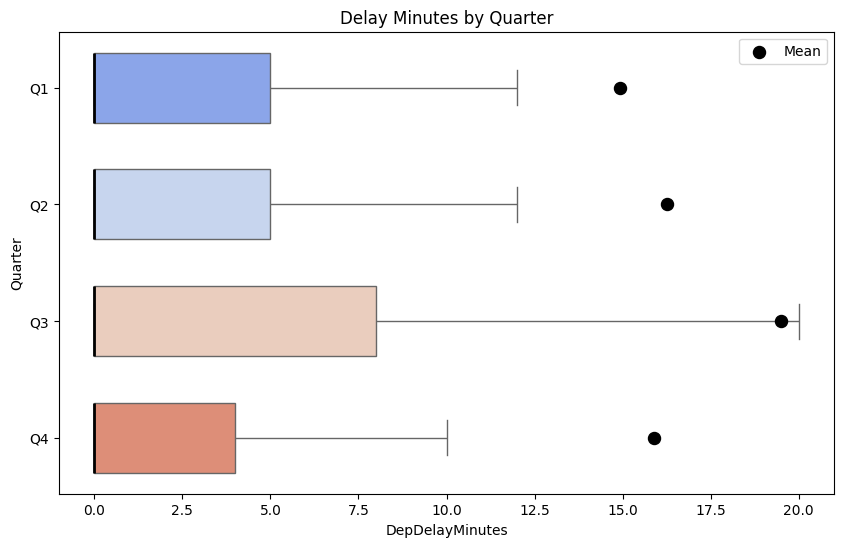

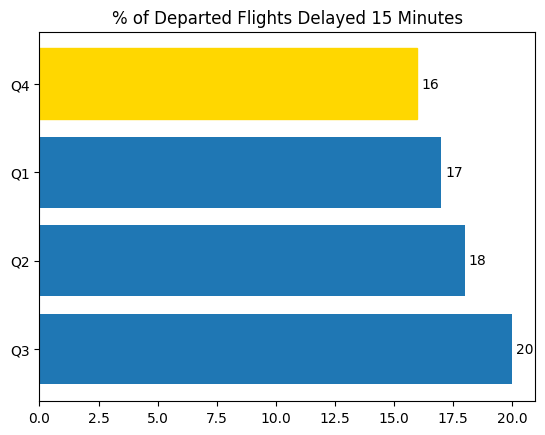


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q1             3479                    15                       0
Q2             3885                    16                       0
Q4             4065                    16                       0
Q3             4179                    20                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4          4084                  16.0          0.0
Q1          3534                  17.0          2.0
Q2          3908                  18.0          1.0
Q3          4255                  20.0          2.0



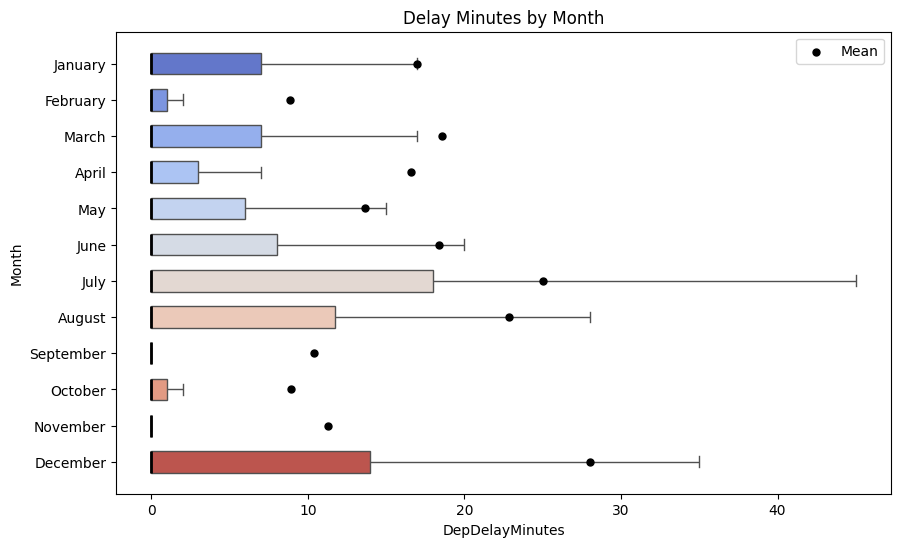

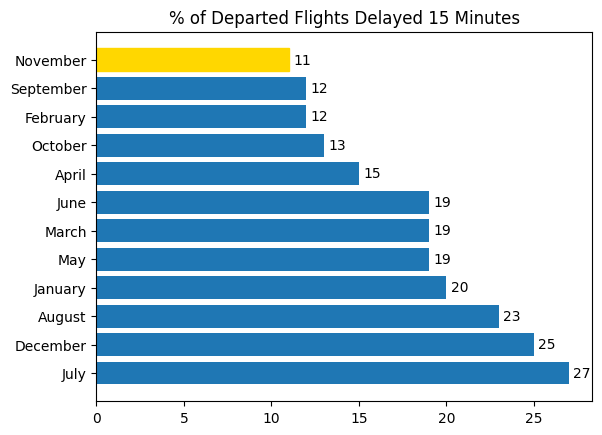


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
February         1127                     9                       0
October          1463                     9                       0
September        1367                    10                       0
November         1281                    11                       0
May              1280                    14                       0
April            1251                    17                       0
January          1123                    17                       0
June             1354                    18                       0
March            1229                    19                       0
August           1426                    23                       0
July             1386                    25                       0
December         1321                    28                       0

     

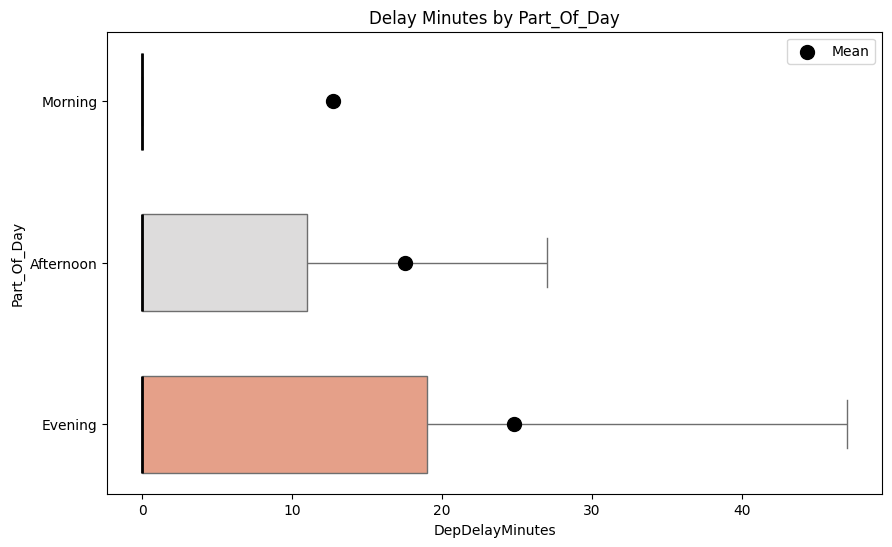

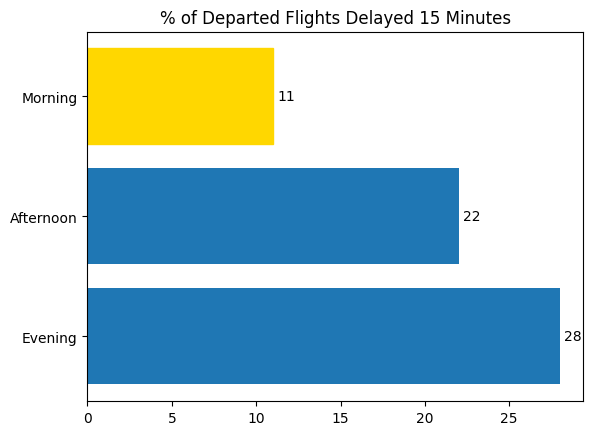


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            7571                    13                       0
Afternoon          4720                    18                       0
Evening            3317                    25                       0

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning         7650                  11.0          1.0
Afternoon       4759                  21.0          1.0
Evening         3372                  28.0          2.0



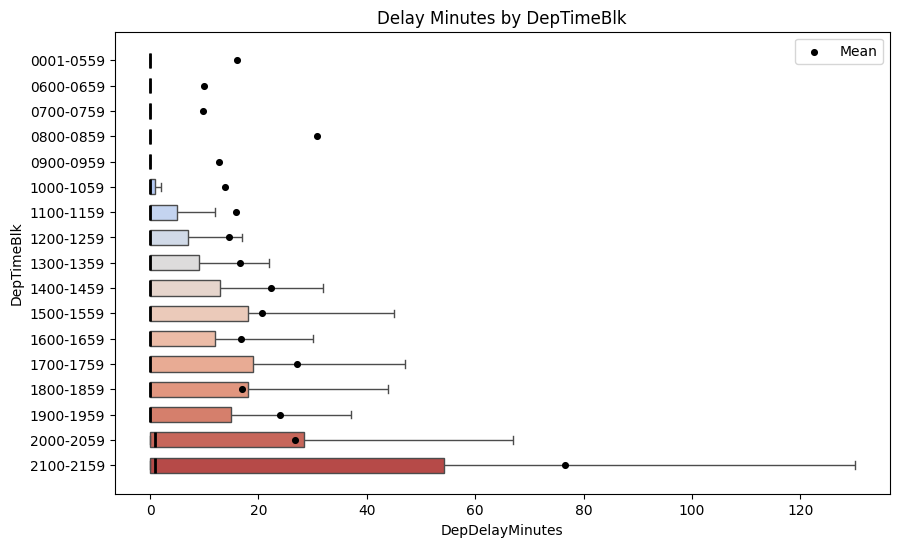

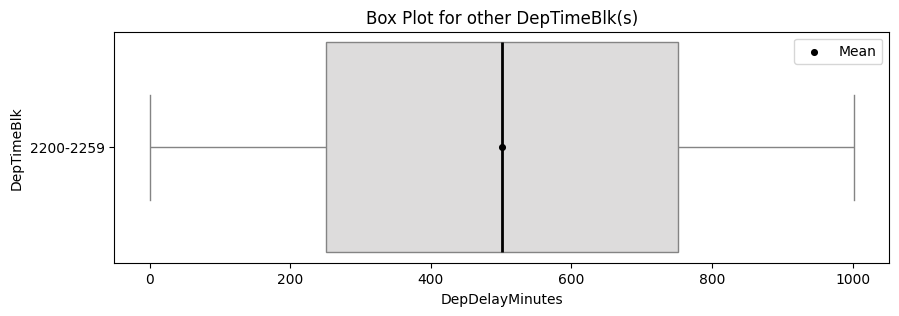

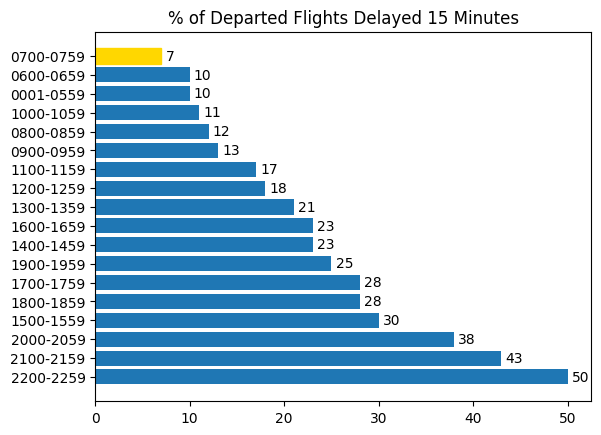


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0600-0659         3060                    10                       0
0700-0759          953                    10                       0
0900-0959          623                    13                       0
1000-1059          351                    14                       0
1200-1259         1525                    15                       0
0001-0559         1228                    16                       0
1100-1159         1193                    16                       0
1300-1359          907                    17                       0
1800-1859          884                    17                       0
1600-1659          863                    17                       0
1500-1559          462                    21                       0
1400-1459          963                    22            

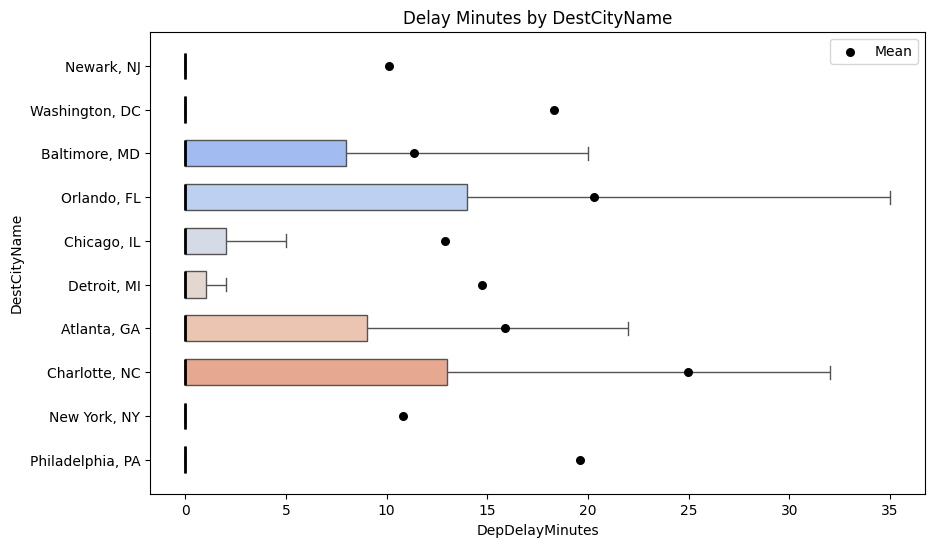

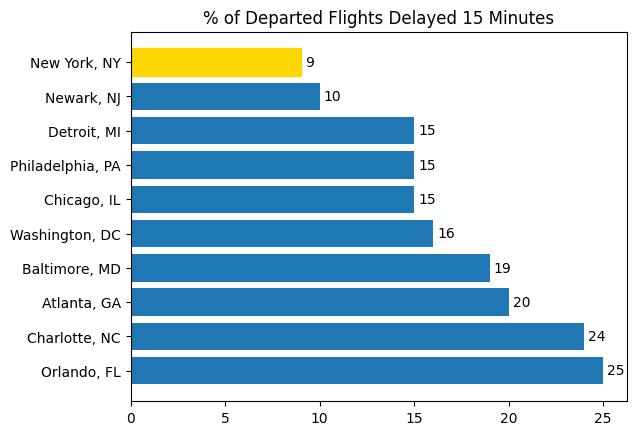


             Departed Flights By DestCityName:

                  Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                        
Newark, NJ               785                 10                    0
Baltimore, MD           1639                 11                    0
New York, NY             636                 11                    0
Chicago, IL             2607                 13                    0
Detroit, MI             1295                 15                    0
Atlanta, GA              998                 16                    0
Washington, DC          2457                 18                    0
Philadelphia, PA        1138                 20                    0
Orlando, FL             1070                 20                    0
Charlotte, NC           1192                 25                    0

                  Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                                


In [ ]:
print('Albany International Airport had', ALB_Dep.DepDelayMinutes.agg('count'), 'flights that departed in 2024.\n')
Airport_delay_data(ALB_Dep, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures', 150) #Albany Airport Delay Info

Albany International Airport had 2799 departed flights delayed at least 15 Minutes in 2024.

% of Outliers for Delay Minutes is  9
The median is 43 minutes departed after scheduled time.
On average, flights depart 88 minutes delayed.



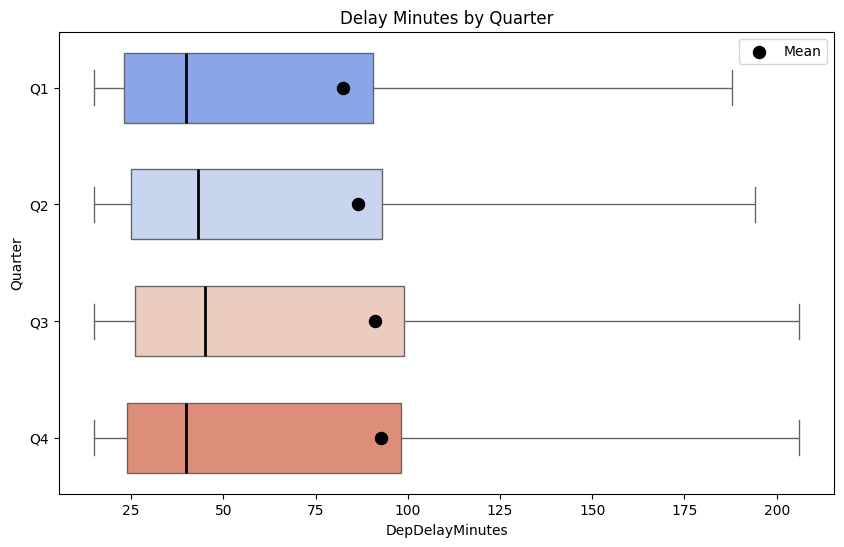


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q1              592                    82                      40
Q2              691                    86                      43
Q3              856                    91                      45
Q4              660                    93                      40




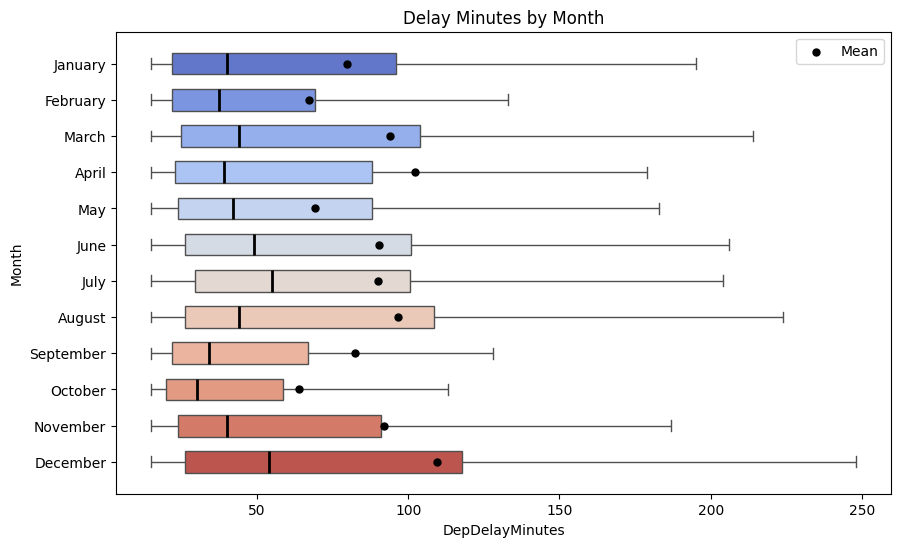


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October           187                    64                      30
February          134                    67                      38
May               237                    69                      42
January           227                    80                      40
September         162                    82                      34
July              371                    90                      55
June              261                    90                      49
November          147                    92                      40
March             231                    94                      44
August            323                    97                      44
April             193                   102                      39
December          326                   109                      54




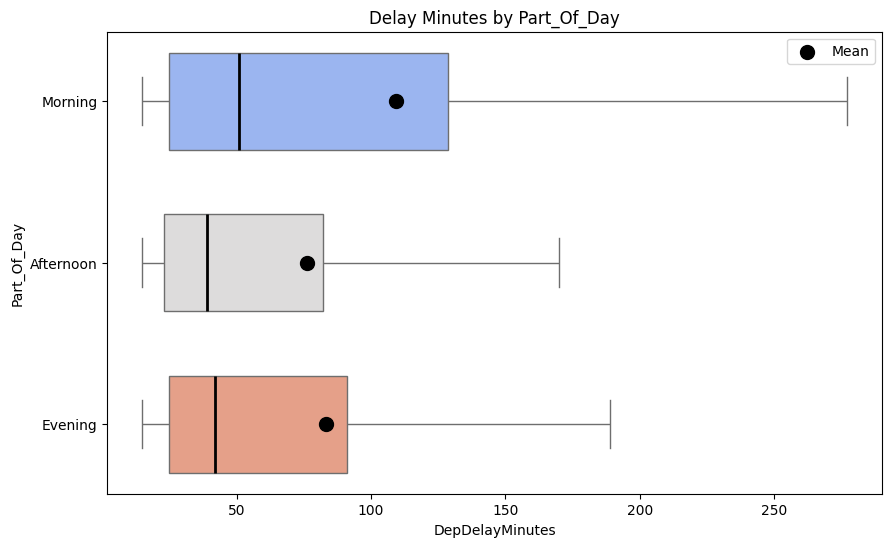


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Afternoon          1019                    76                      39
Evening             945                    83                      42
Morning             835                   109                      51




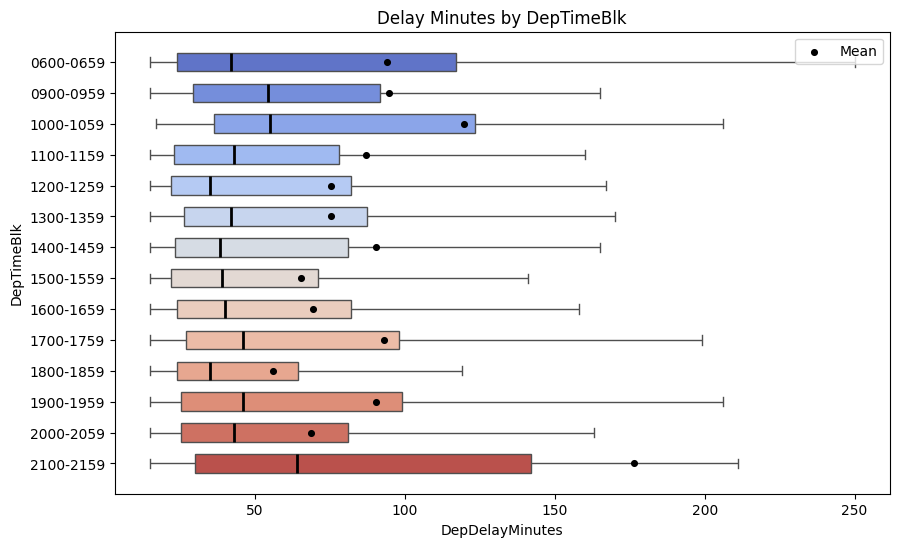

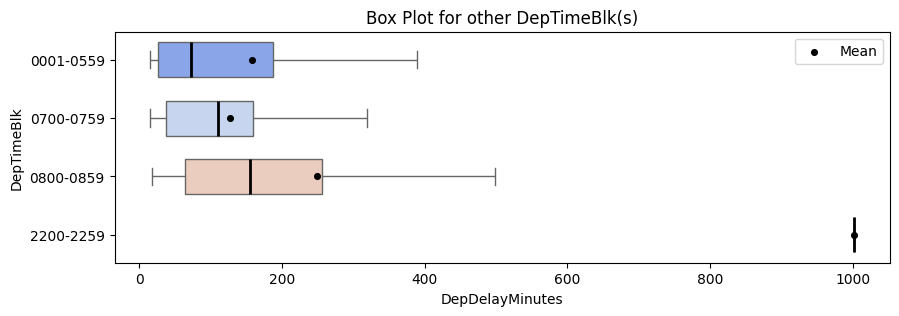


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
1800-1859          251                    56                      35
1500-1559          137                    65                      39
1600-1659          197                    69                      40
2000-2059           87                    69                      43
1200-1259          273                    75                      35
1300-1359          186                    75                      42
1100-1159          205                    87                      43
1400-1459          226                    90                      38
1900-1959          166                    91                      46
1700-1759          421                    93                      46
0600-0659          300                    94                      42
0900-0959           80                    95            

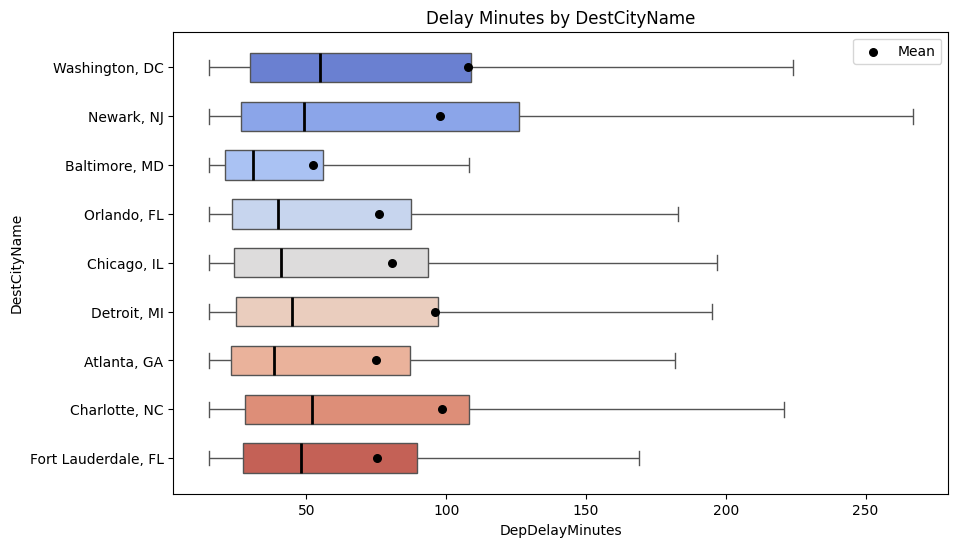

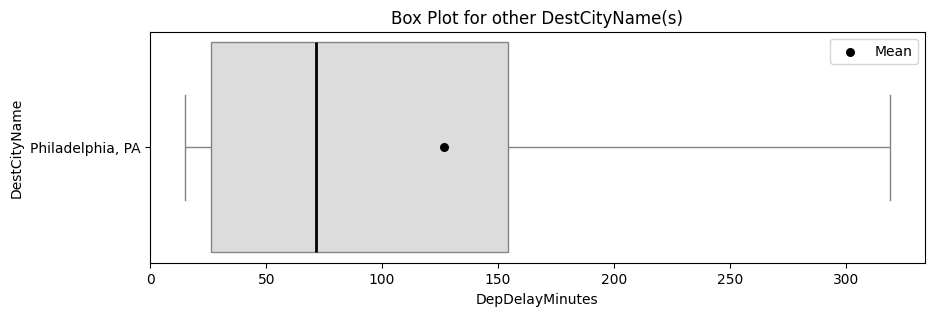


             Departed Flights By DestCityName:

                     Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                           
Baltimore, MD               317                 52                   31
Atlanta, GA                 196                 75                   38
Fort Lauderdale, FL          95                 75                   48
Orlando, FL                 267                 76                   40
Chicago, IL                 392                 81                   41
Detroit, MI                 189                 96                   45
Newark, NJ                   78                 98                   49
Charlotte, NC               289                 99                   52
Washington, DC              405                108                   55
Philadelphia, PA            172                127                   72




In [ ]:
ALB_Delayed_15 = ALB_Dep[ALB_Dep.DepDel15 == 'Delayed at least 15 Minutes']
ALB_Delayed_15.reset_index(drop = True, inplace = True)
print('Albany International Airport had', len(ALB_Delayed_15), 'departed flights delayed at least 15 Minutes in 2024.\n')
Airport_delay_data(ALB_Delayed_15, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures', 300) #Albany Airport Delayed 15 Minutes Delay Info

Albany International Airport had 2607 flights to Chicago, IL that departed in 2024.

% of Outliers for Delay Minutes is  21
The median is 0 minutes departed after scheduled time.
On average, flights depart 13 minutes delayed.



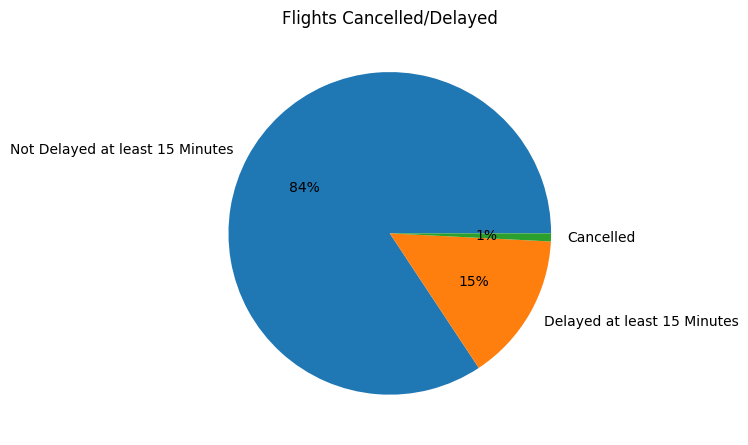


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes     2215  84.3
Delayed at least 15 Minutes          392  14.9
Cancelled                             22   0.8



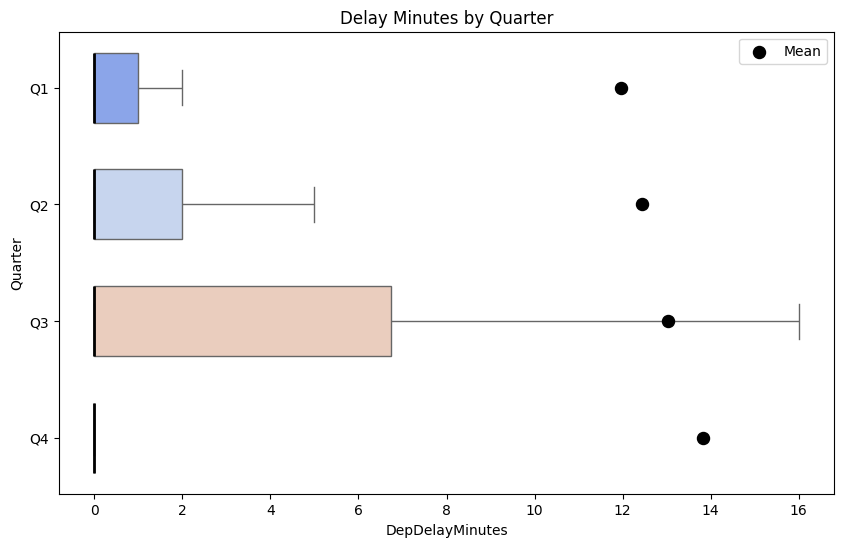

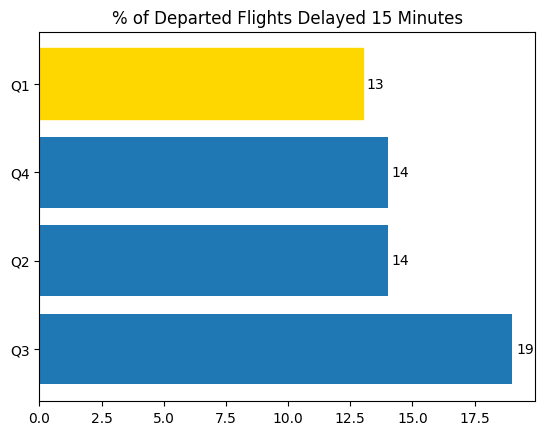


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q1              485                    12                       0
Q2              699                    12                       0
Q3              746                    13                       0
Q4              677                    14                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q1           495                  13.0          2.0
Q2           703                  14.0          1.0
Q4           678                  14.0          0.0
Q3           753                  18.0          1.0



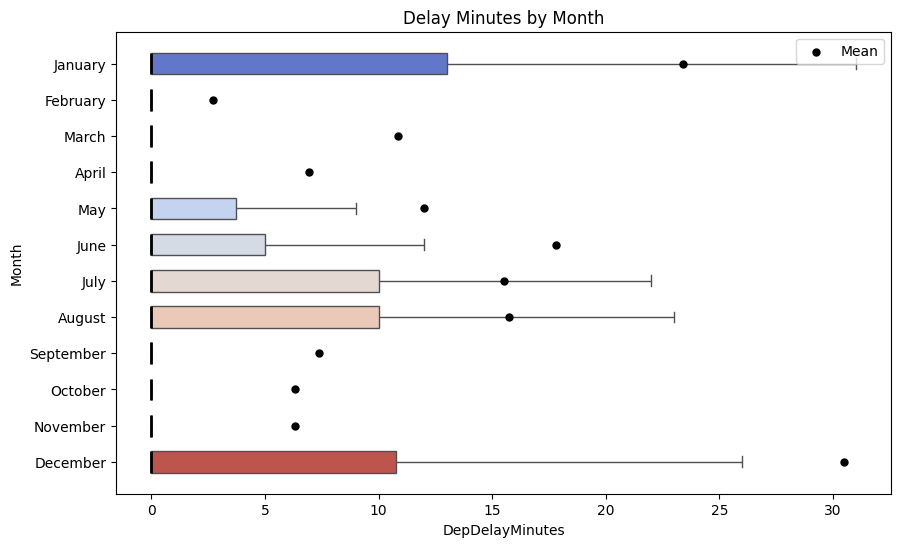

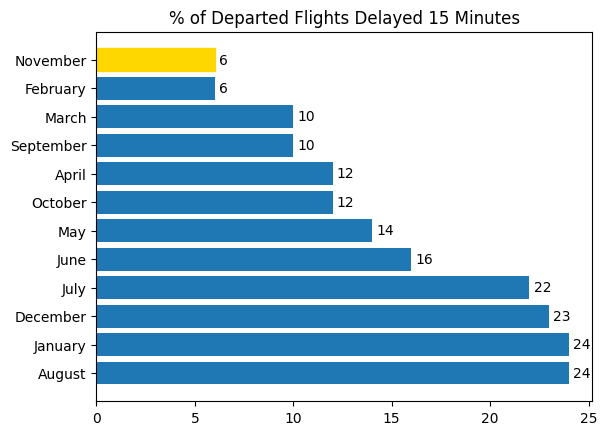


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
February          155                     3                       0
November          217                     6                       0
October           250                     6                       0
April             224                     7                       0
September         235                     7                       0
March             186                    11                       0
May               226                    12                       0
August            251                    16                       0
July              260                    16                       0
June              249                    18                       0
January           144                    23                       0
December          210                    30                       0

     

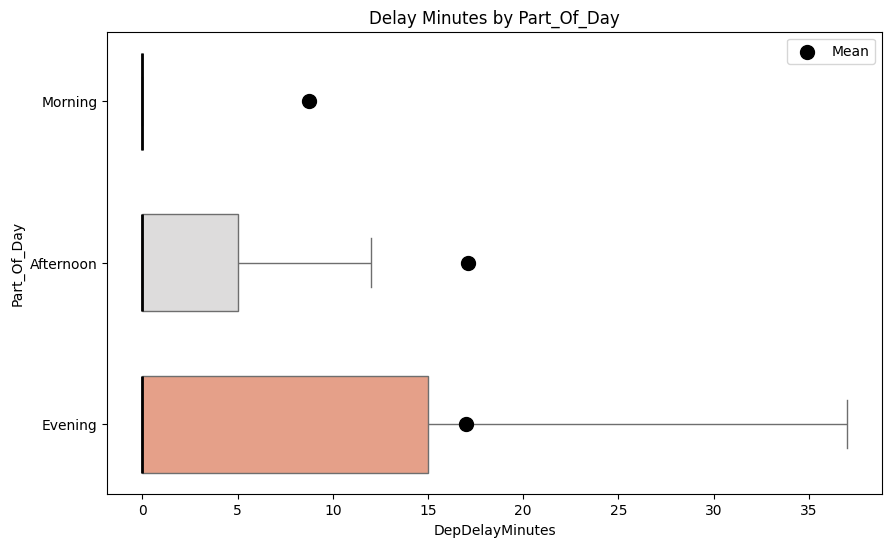

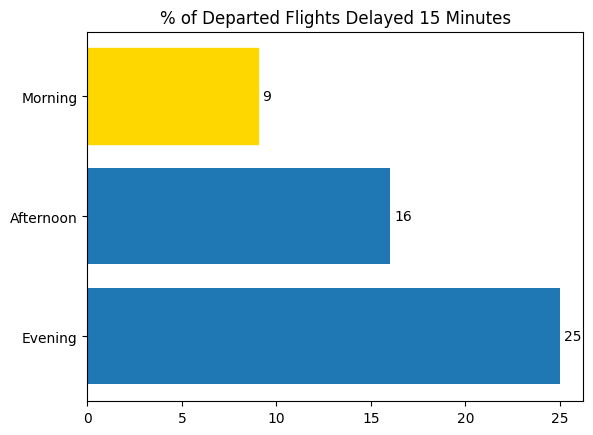


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            1306                     9                       0
Afternoon           643                    17                       0
Evening             658                    17                       0

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning         1317                   9.0          1.0
Afternoon        645                  16.0          0.0
Evening          667                  25.0          1.0



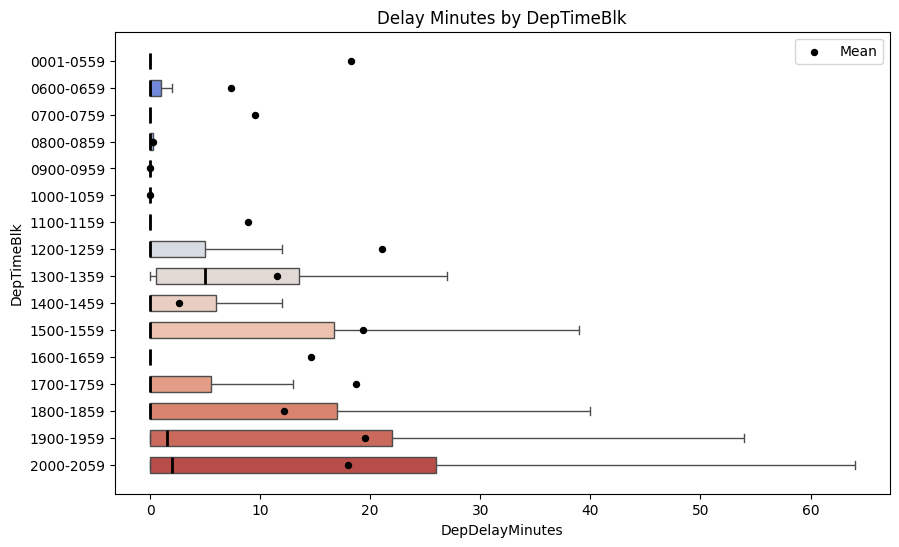

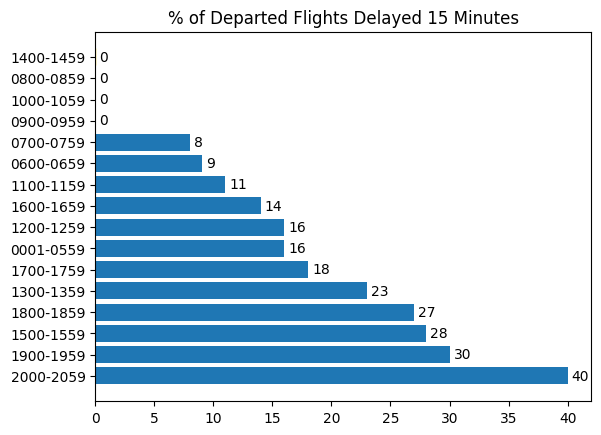


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0800-0859            4                     0                       0
0900-0959            9                     0                       0
1000-1059            1                     0                       0
1400-1459           13                     3                       0
0600-0659          447                     7                       0
1100-1159          255                     9                       0
0700-0759          565                    10                       0
1300-1359           31                    12                       5
1800-1859          168                    12                       0
1600-1659          294                    15                       0
2000-2059          105                    18                       2
0001-0559           25                    18            

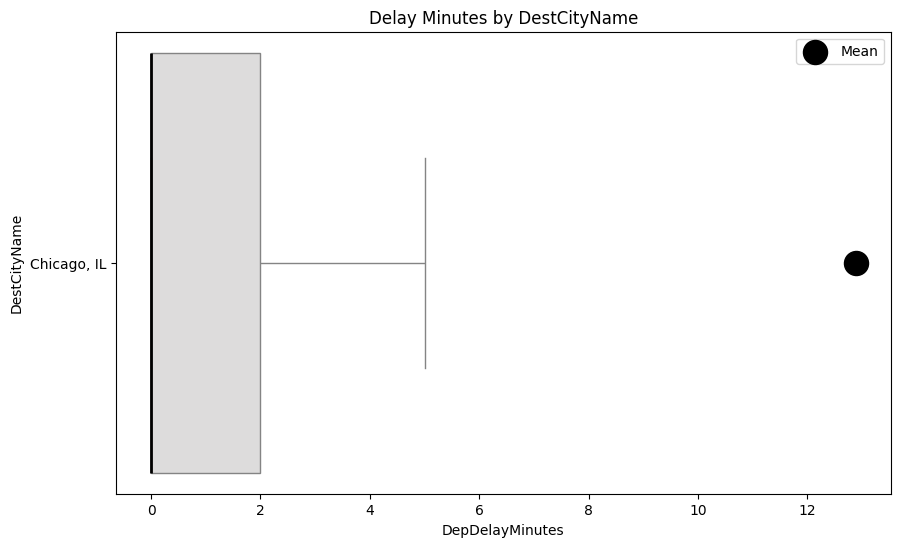


             Departed Flights By DestCityName:

              Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                    
Chicago, IL         2607                 13                    0




In [ ]:
ALB_Dep_most_popular_dest = ALB_Dep.groupby('DestCityName').agg(Flights=('DepDelayMinutes', 'size'))
ALB_Dep_most_popular_dests = ALB_Dep_most_popular_dest.sort_values(by = 'Flights', ascending = False)
ALB_Dep_most_popular_dest = ALB_Dep_most_popular_dests.head(1)
ALB_Dep_most_popular_dest_name = str(ALB_Dep_most_popular_dest.index.values)
ALB_Dep_most_popular_dest_name = ALB_Dep_most_popular_dest_name[2:-2]
ALB_Dest = ALB_Dep[ALB_Dep.DestCityName == ALB_Dep_most_popular_dest_name]
ALB_Dest.reset_index(drop=True, inplace = True)
most_pop_dest = str(ALB_Dest.DestCityName.iloc[0])
print('Albany International Airport had', ALB_Dest.DepDelayMinutes.agg('count'),
      'flights to ' + most_pop_dest + ' that departed in 2024.\n')
Airport_delay_data(ALB_Dest, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures', 300)

# **Arrivals**

In [ ]:
ALB_Arr = data[data.DestAirportID==10257]
ALB_Arr.reset_index(drop=True, inplace=True)

Albany International Airport had 15553 flights that arrived in 2024.

% of Outliers for Delay Minutes is  15
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 17 minutes late.



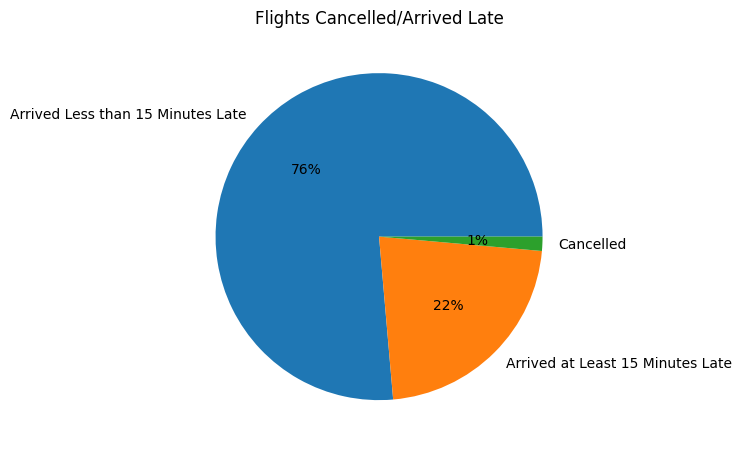


                                   Flights     %
Arrived Less than 15 Minutes Late    12045  76.3
Arrived at Least 15 Minutes Late      3508  22.2
Cancelled                              228   1.4



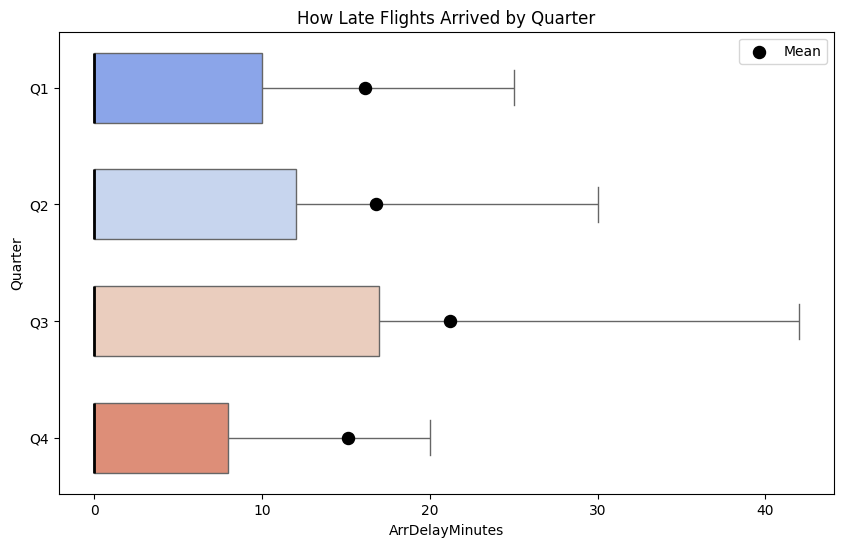

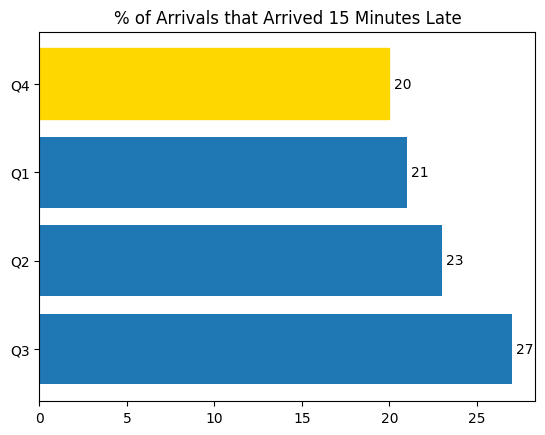


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4           4039               15                  0
Q1           3470               16                  0
Q2           3881               17                  0
Q3           4163               21                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4          4081               19.0          1.0
Q1          3535               20.0          2.0
Q2          3910               23.0          1.0
Q3          4255               26.0          2.0



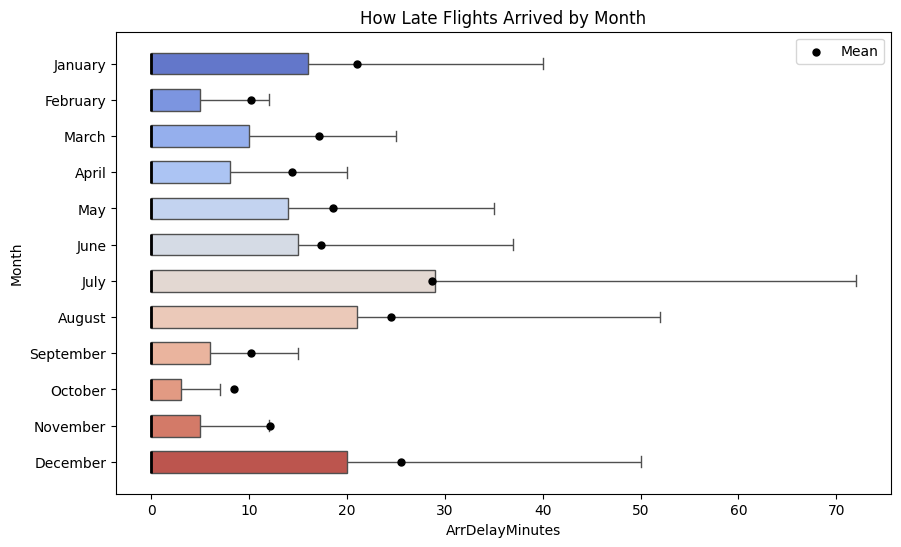

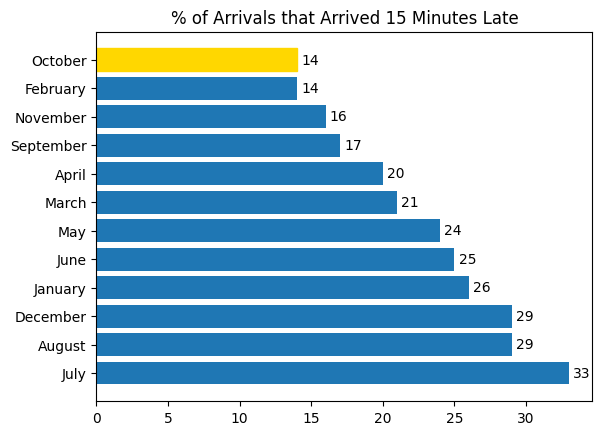


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
October        1460                8                  0
February       1126               10                  0
September      1367               10                  0
November       1277               12                  0
April          1247               14                  0
June           1353               17                  0
March          1222               17                  0
May            1281               19                  0
January        1122               21                  0
August         1415               24                  0
December       1302               26                  0
July           1381               29                  0

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
February      1133               14.0          1.0
October       1477   

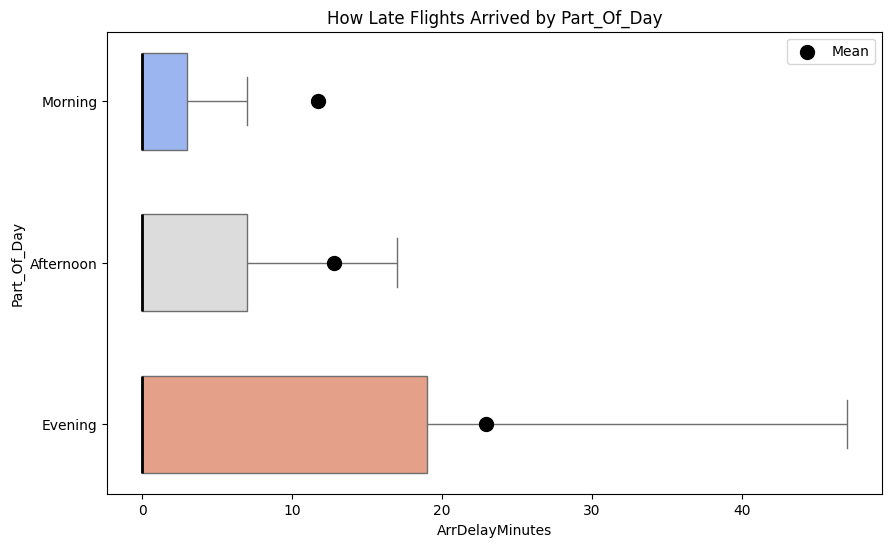

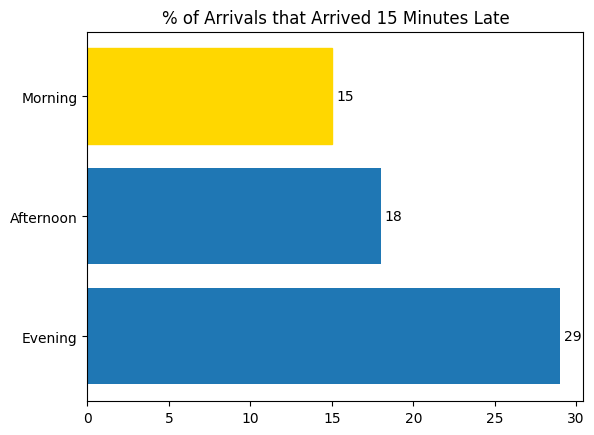


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning          3304               12                  0
Afternoon        4781               13                  0
Evening          7468               23                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning         3342               15.0          1.0
Afternoon       4831               18.0          1.0
Evening         7608               28.0          2.0



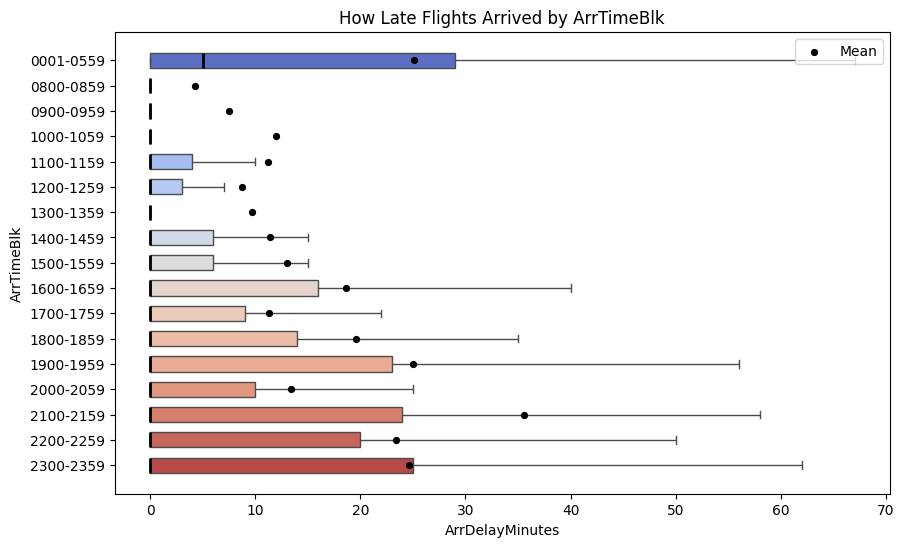

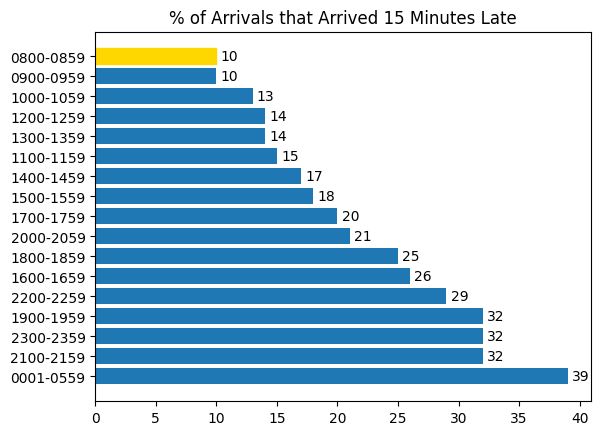


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0800-0859        114                4                  0
0900-0959        362                7                  0
1200-1259       1023                9                  0
1300-1359        742               10                  0
1100-1159       1306               11                  0
1400-1459       1039               11                  0
1700-1759       1056               11                  0
1000-1059       1331               12                  0
2000-2059        330               13                  0
1500-1559        698               13                  0
1600-1659       1279               19                  0
1800-1859        856               20                  0
2200-2259       1110               23                  0
0001-0559        191               25                  5
1900-1959        777               25     

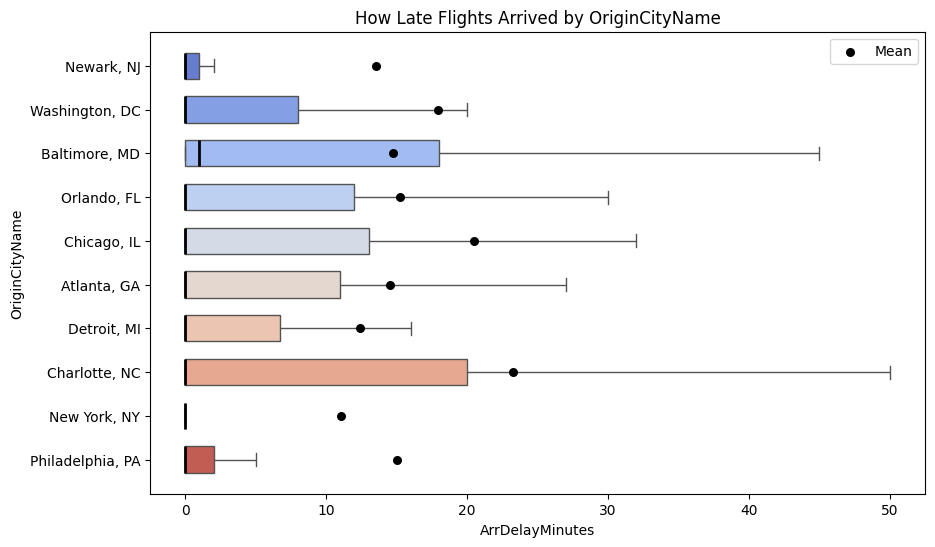

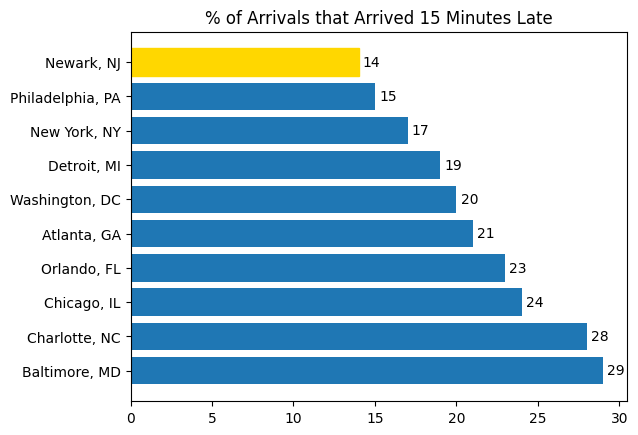


             Arrival Flights By OriginCityName:

                  Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                
New York, NY           632               11                  0
Detroit, MI           1290               12                  0
Newark, NJ             770               14                  0
Baltimore, MD         1655               15                  1
Atlanta, GA            999               15                  0
Philadelphia, PA      1139               15                  0
Orlando, FL           1066               15                  0
Washington, DC        2444               18                  0
Chicago, IL           2606               20                  0
Charlotte, NC         1190               23                  0

                  Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                           
Newark, NJ            794               14.0          3.0
Philadelphia, PA   

In [ ]:
print('Albany International Airport had', ALB_Arr.ArrDelayMinutes.agg('count'), 'flights that arrived in 2024.\n')
Airport_delay_data(ALB_Arr, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals', 300) #Albany Airport Delay Info

Albany International Airport had 3508 arrival flights delayed at least 15 Minutes in 2024.

% of Outliers for Delay Minutes is  8
The median is 40 minutes arrived after scheduled time.
On average, flights arrive 73 minutes late.



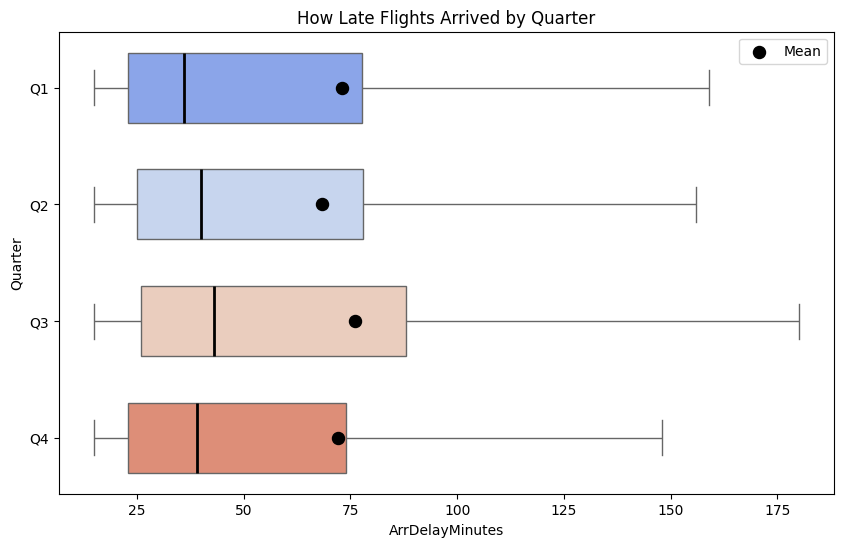


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q2            896               68                 40
Q4            793               72                 39
Q1            714               73                 36
Q3           1105               76                 43




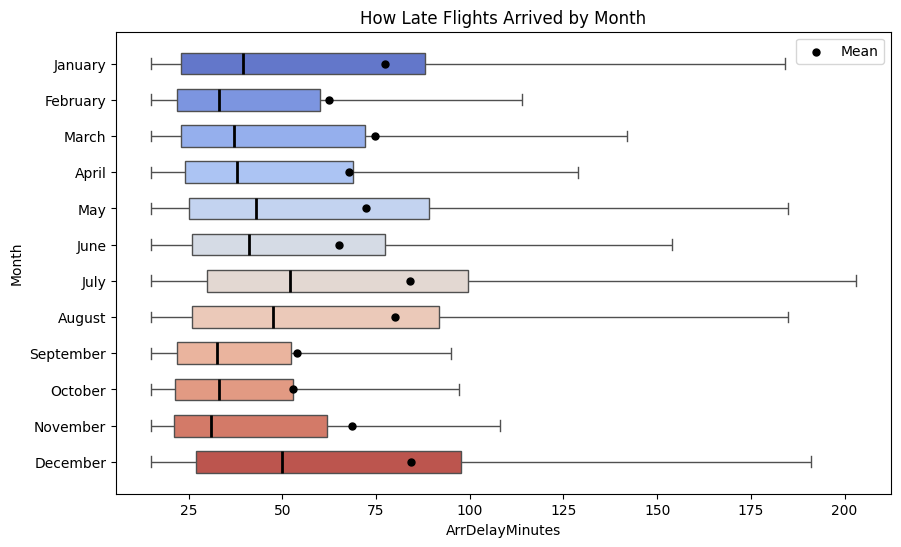


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
October         206               53                 33
September       236               54                 32
February        163               62                 33
June            339               65                 41
April           246               68                 38
November        209               69                 31
May             311               72                 43
March           261               75                 37
January         290               77                 40
August          414               80                 48
July            455               84                 52
December        378               84                 50




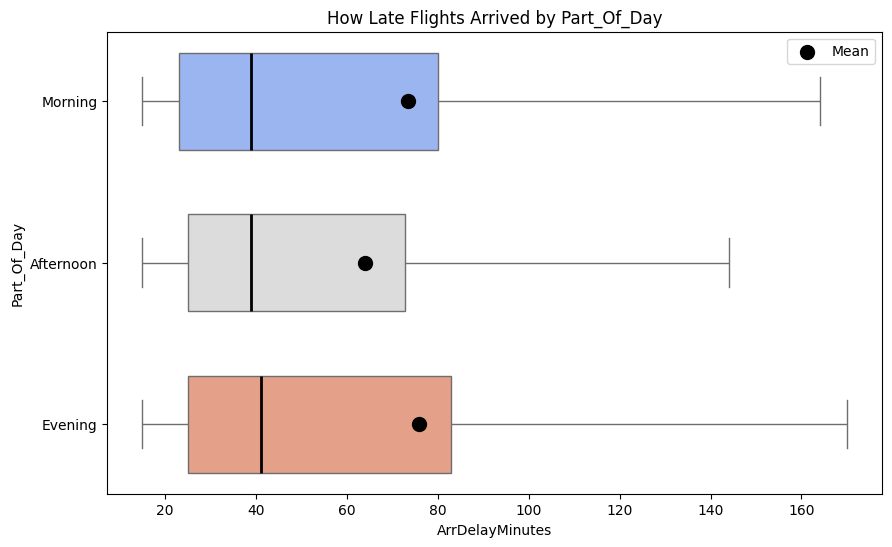


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Afternoon         882               64                 39
Morning           486               74                 39
Evening          2140               76                 41




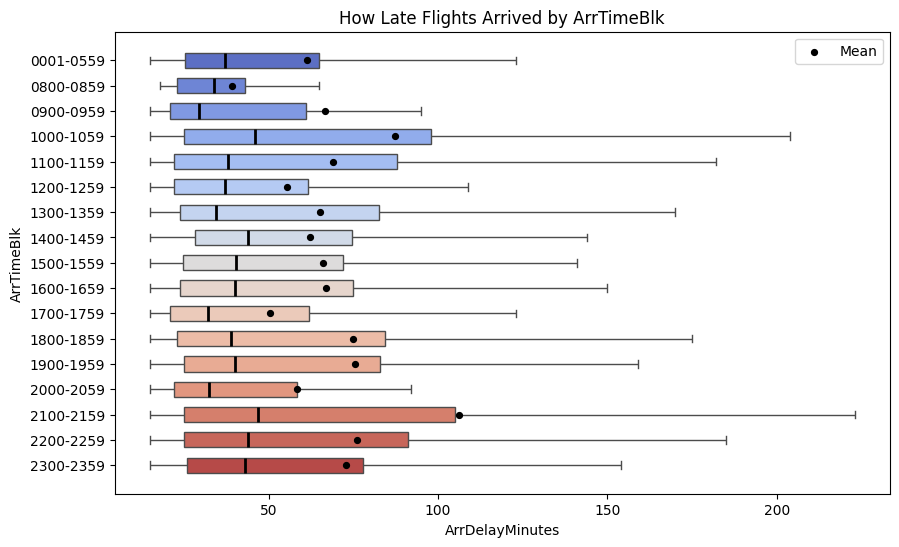


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0800-0859         11               39                 34
1700-1759        214               50                 32
1200-1259        143               56                 37
2000-2059         70               58                 32
0001-0559         74               61                 37
1400-1459        174               62                 44
1300-1359        104               65                 34
1500-1559        128               66                 40
0900-0959         36               67                 30
1600-1659        333               67                 40
1100-1159        192               69                 38
2300-2359        774               73                 43
1800-1859        211               75                 39
2200-2259        320               76                 44
1900-1959        245               76     

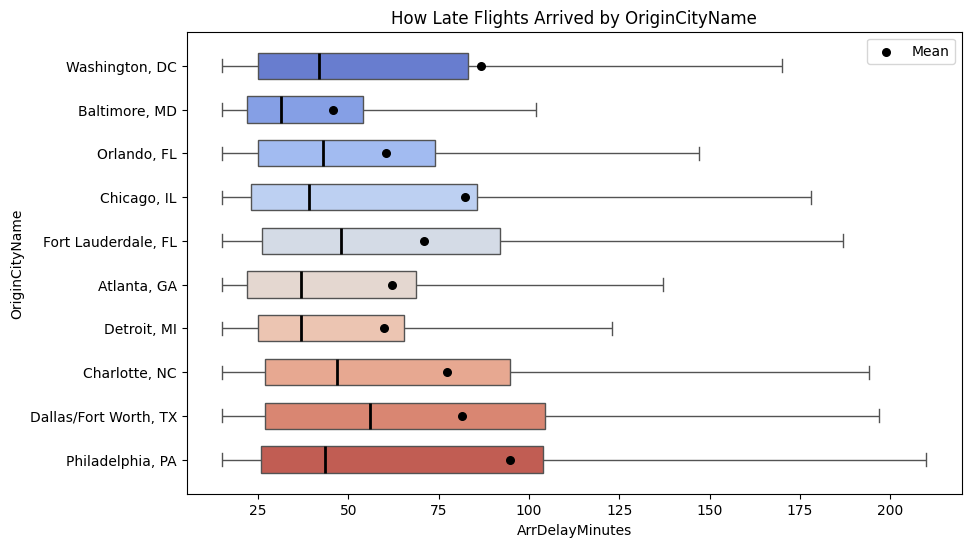


             Arrival Flights By OriginCityName:

                       Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                     
Baltimore, MD               476               46                 32
Detroit, MI                 251               60                 37
Orlando, FL                 247               60                 43
Atlanta, GA                 212               62                 37
Fort Lauderdale, FL         137               71                 48
Charlotte, NC               338               77                 47
Dallas/Fort Worth, TX       175               81                 56
Chicago, IL                 615               82                 39
Washington, DC              480               87                 42
Philadelphia, PA            172               95                 44




In [ ]:
ALB_Arr_15 = ALB_Arr[ALB_Arr.ArrDel15 == 'Delayed at least 15 Minutes']
ALB_Arr_15.reset_index(drop=True, inplace = True)
print('Albany International Airport had', len(ALB_Arr_15), 'arrival flights delayed at least 15 Minutes in 2024.\n')
Airport_delay_data(ALB_Arr_15, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals', 300) #Albany Airport Arrived 15 Minutes Late Info

Albany International Airport had 2606 flights from Chicago, IL that arrived in 2024.

% of Outliers for Delay Minutes is  14
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 20 minutes late.



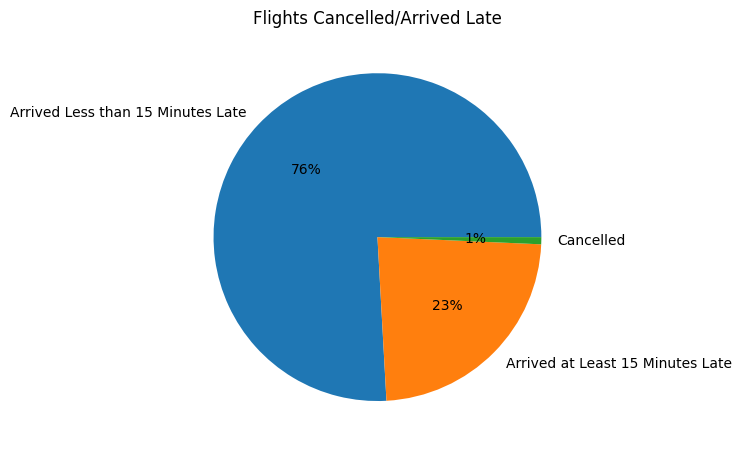


                                   Flights     %
Arrived Less than 15 Minutes Late     1991  75.8
Arrived at Least 15 Minutes Late       615  23.4
Cancelled                               19   0.7



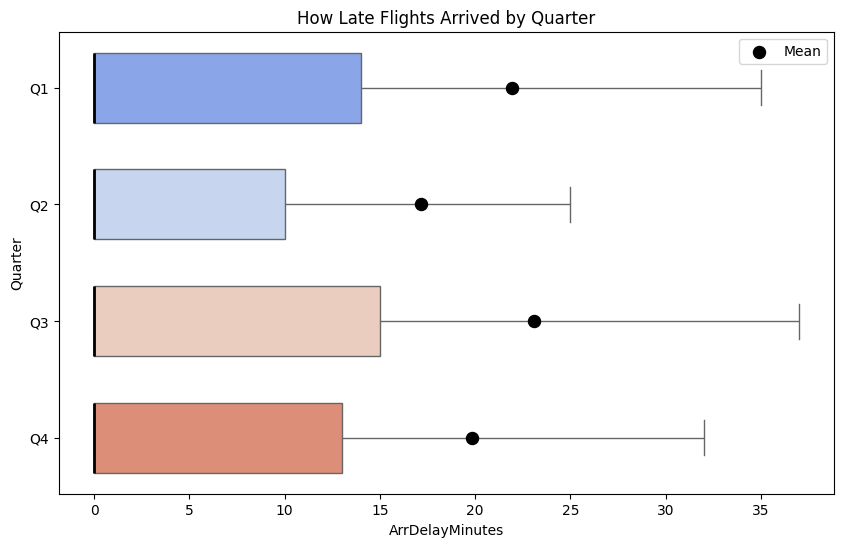

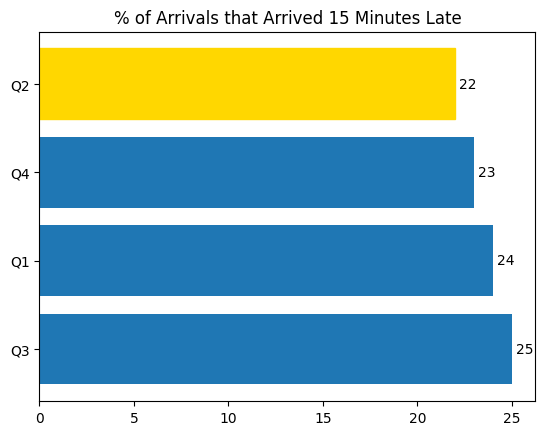


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q2            701               17                  0
Q4            670               20                  0
Q1            489               22                  0
Q3            746               23                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q2           703               22.0          0.0
Q4           675               23.0          1.0
Q1           495               24.0          1.0
Q3           752               25.0          1.0



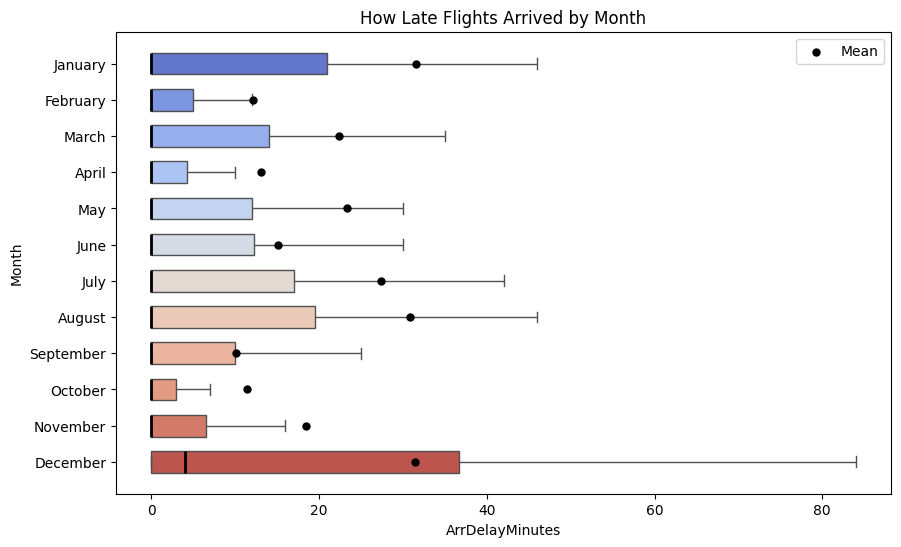

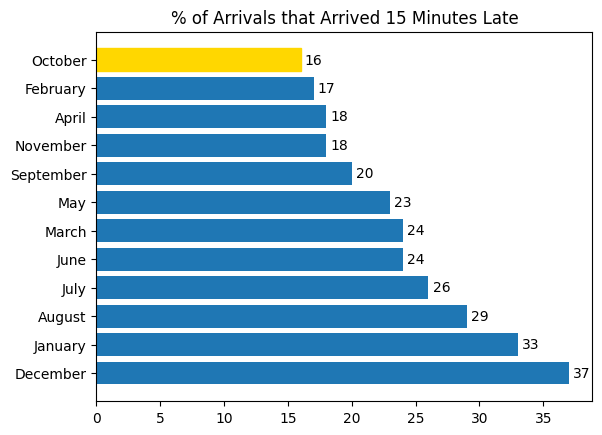


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
September       236               10                  0
October         249               11                  0
February        155               12                  0
April           224               13                  0
June            250               15                  0
November        215               19                  0
March           185               22                  0
May             227               23                  0
July            259               27                  0
August          251               31                  0
December        206               31                  4
January         149               32                  0

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
October        249               16.0          0.0
February       155   

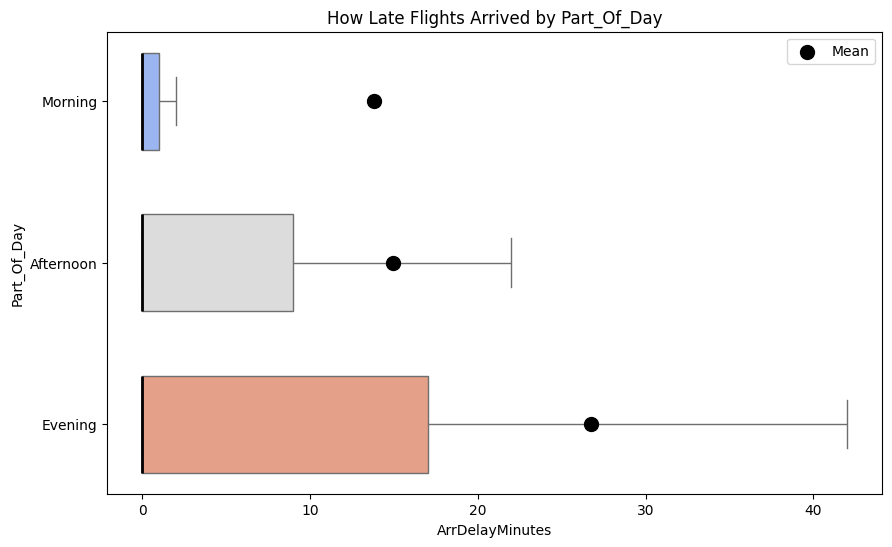

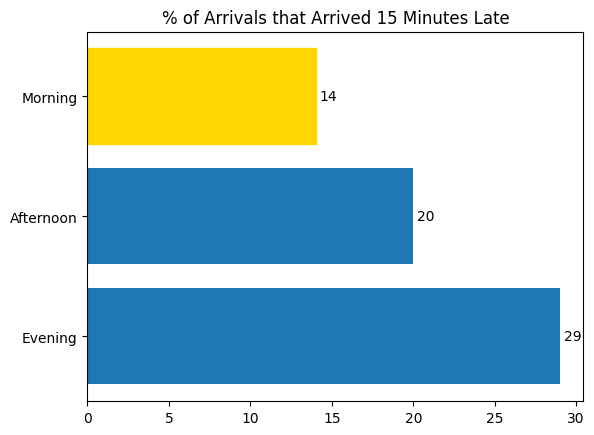


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning           342               14                  0
Afternoon        1011               15                  0
Evening          1253               27                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning          347               14.0          1.0
Afternoon       1013               20.0          0.0
Evening         1265               28.0          1.0



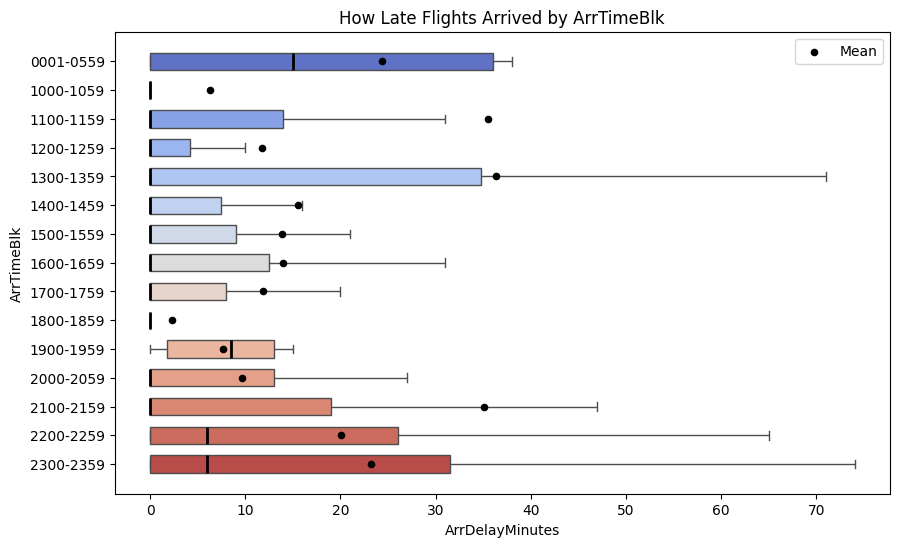

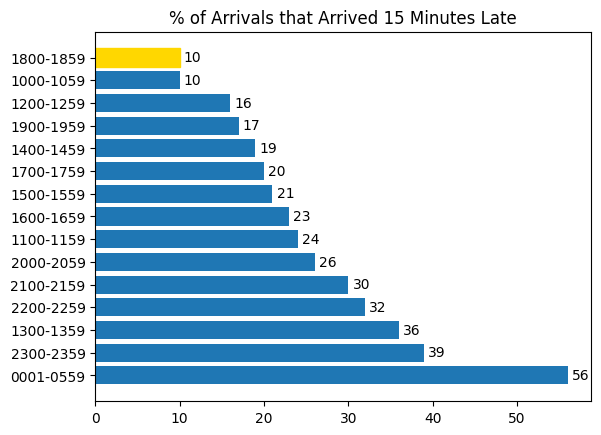


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
1800-1859         10                2                  0
1000-1059        250                6                  0
1900-1959          6                8                  8
2000-2059         35               10                  0
1700-1759        249               12                  0
1200-1259        248               12                  0
1500-1559        196               14                  0
1600-1659        250               14                  0
1400-1459        267               16                  0
2200-2259        117               20                  6
2300-2359        128               23                  6
0001-0559          9               24                 15
2100-2159        708               35                  0
1100-1159         83               35                  0
1300-1359         50               36     

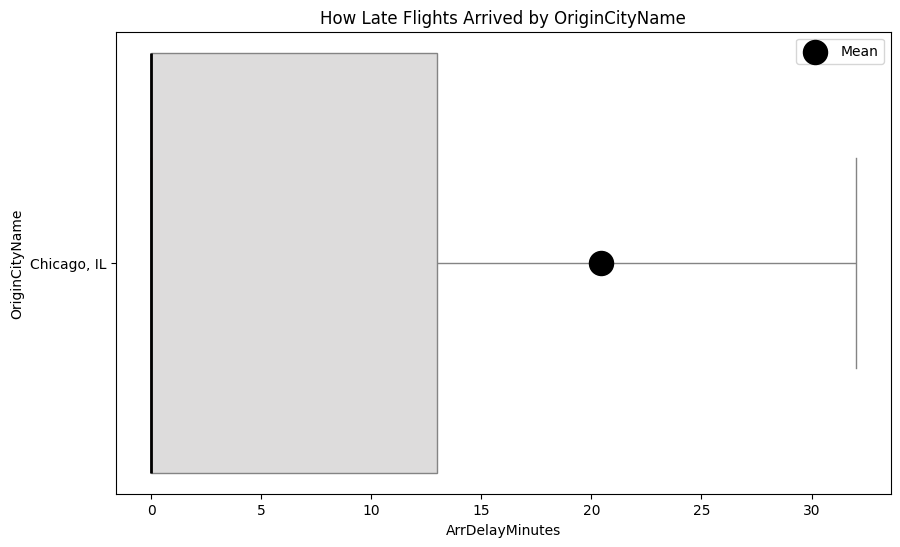


             Arrival Flights By OriginCityName:

                Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                              
Chicago, IL         2606               20                  0




In [ ]:
ALB_Arr_most_popular_origin = ALB_Arr.groupby('OriginCityName').agg(Flights=('ArrDelayMinutes', 'size'))
ALB_Arr_most_popular_origins = ALB_Arr_most_popular_origin.sort_values(by = 'Flights', ascending = False)
ALB_Arr_most_popular_origin = ALB_Arr_most_popular_origins.head(1)
ALB_Arr_most_popular_origin_name = str(ALB_Arr_most_popular_origin.index.values)
ALB_Arr_most_popular_origin_name = ALB_Arr_most_popular_origin_name[2:-2]
ALB_Origin = ALB_Arr[ALB_Arr.OriginCityName == ALB_Arr_most_popular_origin_name]
ALB_Origin.reset_index(drop=True, inplace = True)
most_pop_dest = str(ALB_Origin.OriginCityName.iloc[0])
print('Albany International Airport had', ALB_Origin.ArrDelayMinutes.agg('count'),
      'flights from ' + most_pop_dest + ' that arrived in 2024.\n')
Airport_delay_data(ALB_Origin, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals', 300)

# **Arrivals and Departures By Airline:**

**Departures**

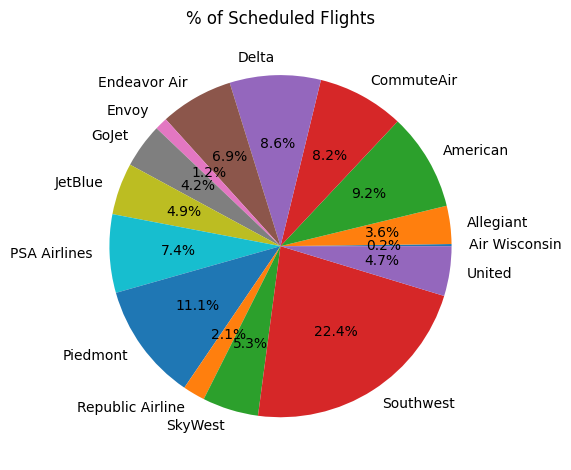

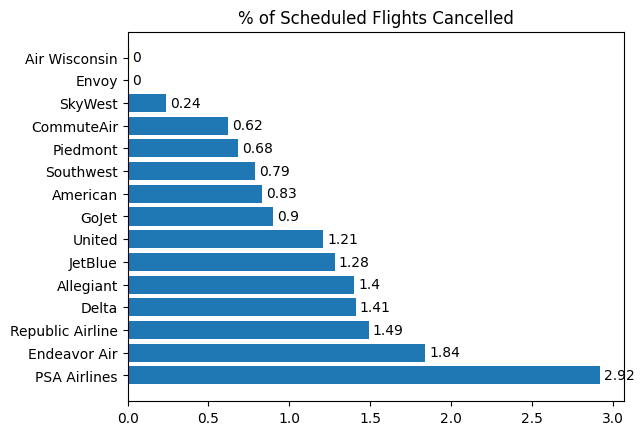

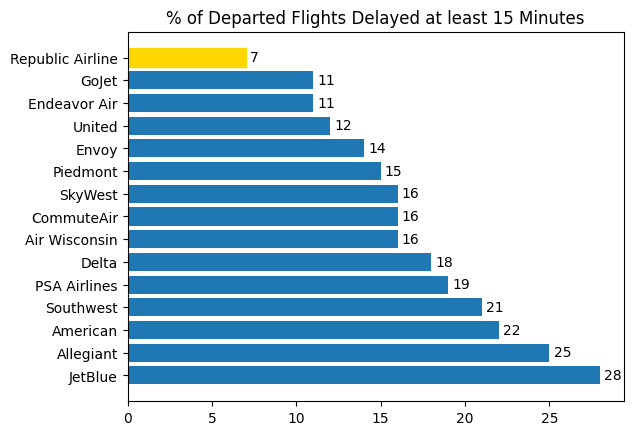


         % of Departed Flights Delayed at least 15 Minutes: 

                    Departures  Delayed 15 Mins %
Operating_Airline                                
Republic Airline           330                7.0
GoJet                      661               11.0
Endeavor Air              1069               11.0
United                     736               12.0
Envoy                      186               14.0
Piedmont                  1746               15.0
CommuteAir                1279               16.0
Air Wisconsin               25               16.0
SkyWest                    832               16.0
Delta                     1333               18.0
PSA Airlines              1132               19.0
Southwest                 3504               21.0
American                  1441               22.0
Allegiant                  565               25.0
JetBlue                    769               28.0

           % of Scheduled Flights Cancelled: 

                    Flights  Cancelled 

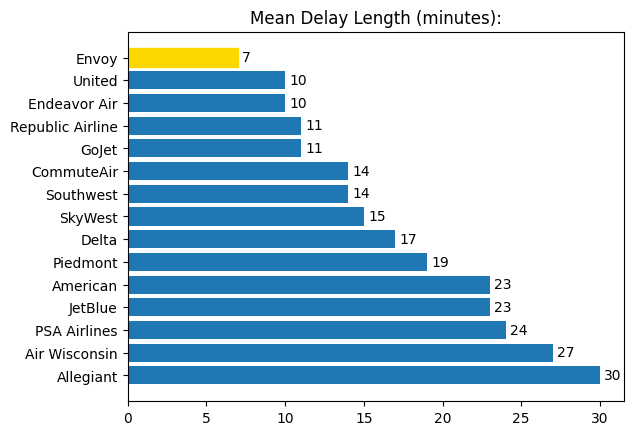


                          Delay Length: 

                    Departures  Mean_Mins_Delayed  Median_Mins_Delayed
Operating_Airline                                                     
Envoy                      186                  7                    0
Endeavor Air              1069                 10                    0
United                     736                 10                    0
GoJet                      661                 11                    0
Republic Airline           330                 11                    0
Southwest                 3504                 14                    0
CommuteAir                1279                 14                    0
SkyWest                    832                 15                    0
Delta                     1333                 17                    0
Piedmont                  1746                 19                    0
American                  1441                 23                    0
JetBlue                    769    

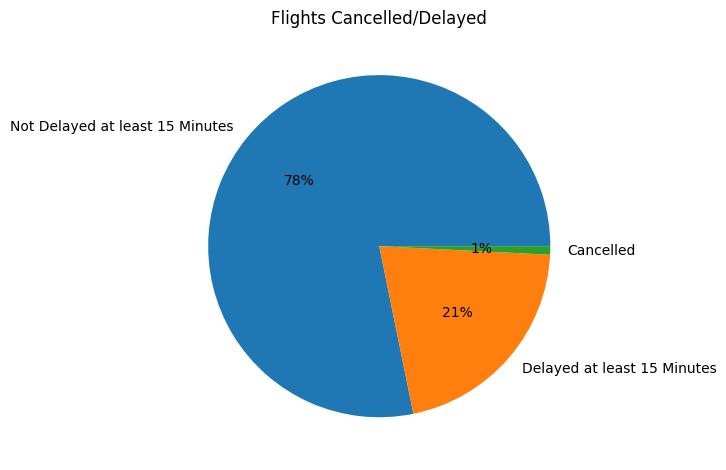


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes     2762  78.2
Delayed at least 15 Minutes          742  21.0
Cancelled                             28   0.8



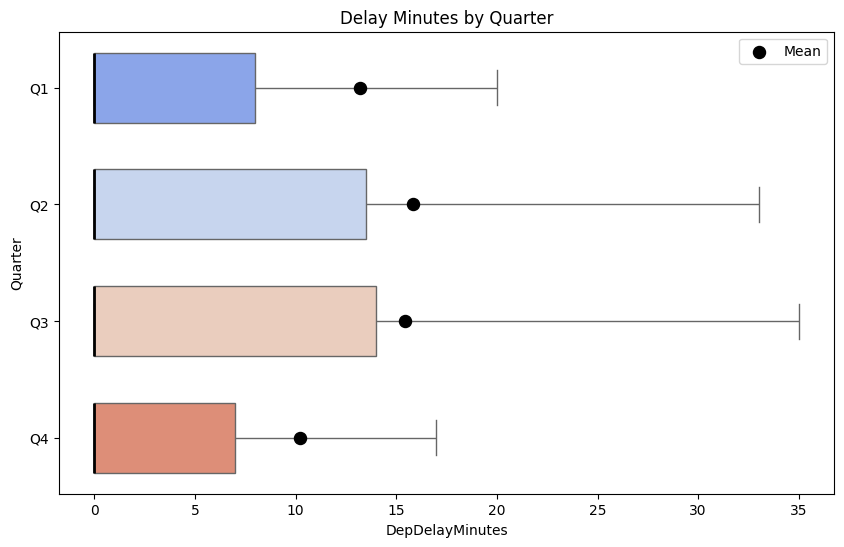

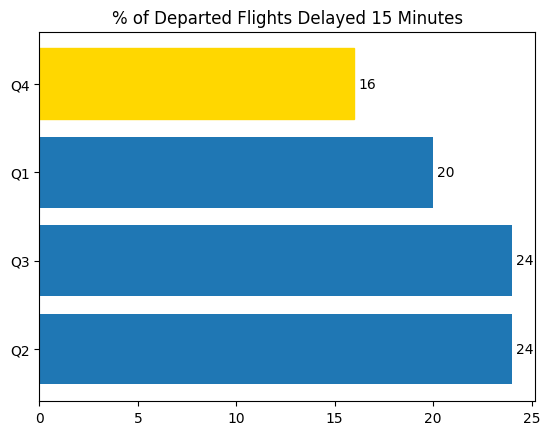


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4              886                    10                       0
Q1              835                    13                       0
Q3              948                    15                       0
Q2              835                    16                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4           894                  16.0          1.0
Q1           849                  20.0          2.0
Q2           838                  24.0          0.0
Q3           951                  24.0          0.0



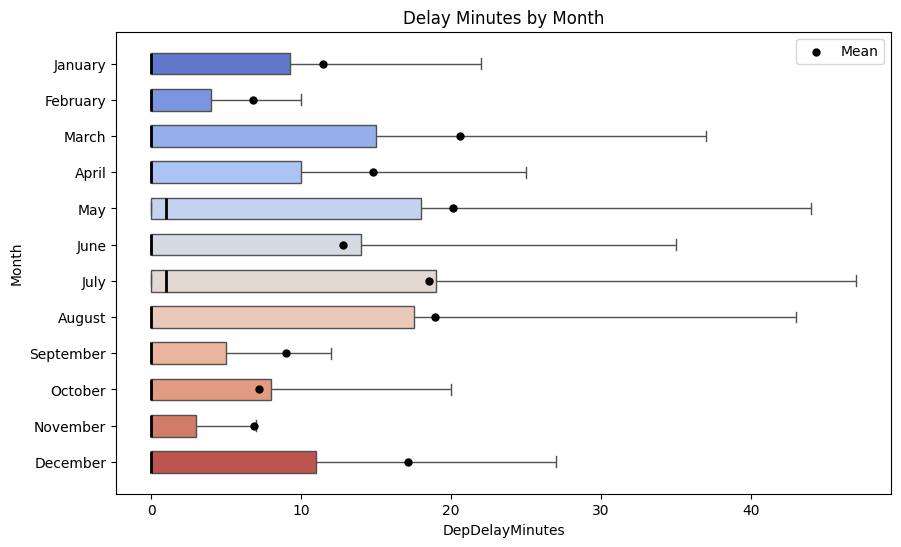

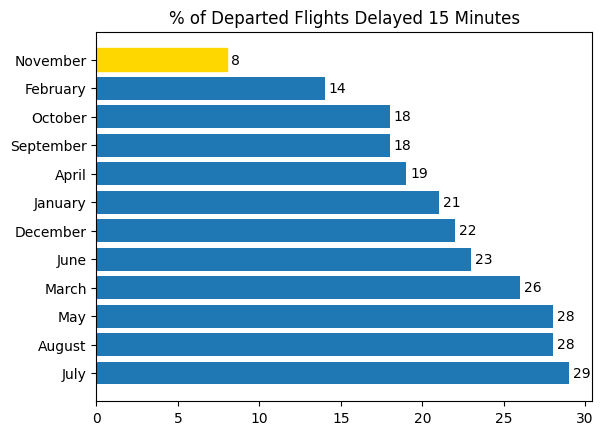


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
February          265                     7                       0
November          284                     7                       0
October           322                     7                       0
September         323                     9                       0
January           272                    11                       0
June              287                    13                       0
April             275                    15                       0
December          280                    17                       0
August            327                    19                       0
July              298                    19                       1
May               273                    20                       1
March             298                    21                       0

     

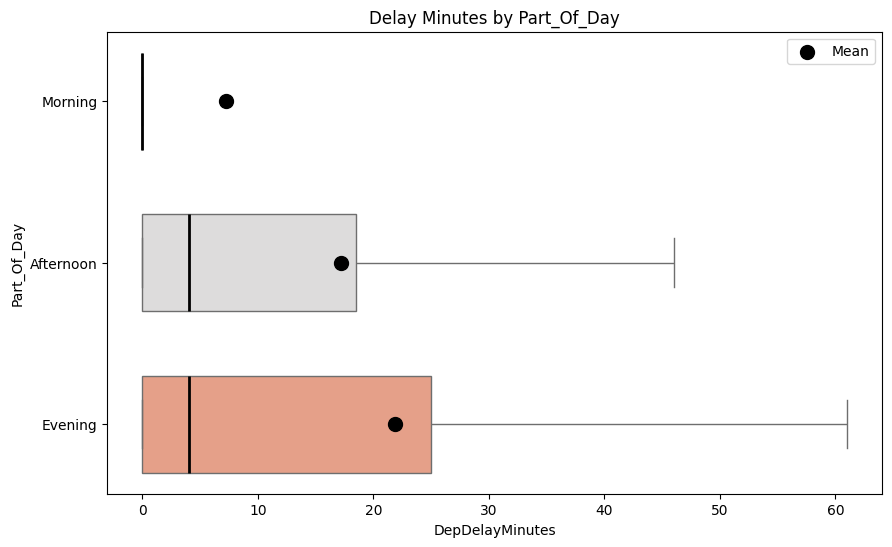

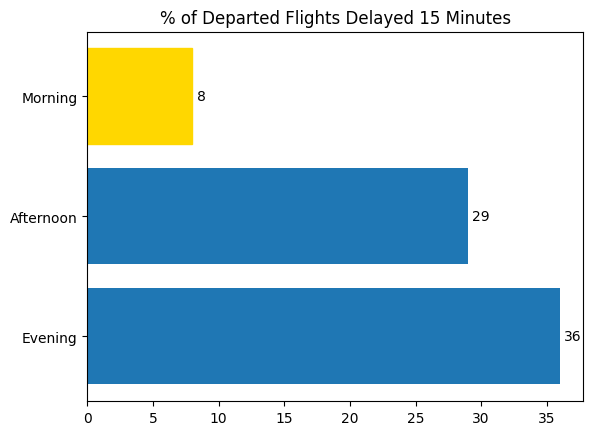


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Morning            1603                     7                       0
Afternoon          1091                    17                       4
Evening             810                    22                       4

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning         1613                   8.0          1.0
Afternoon       1100                  29.0          1.0
Evening          819                  35.0          1.0



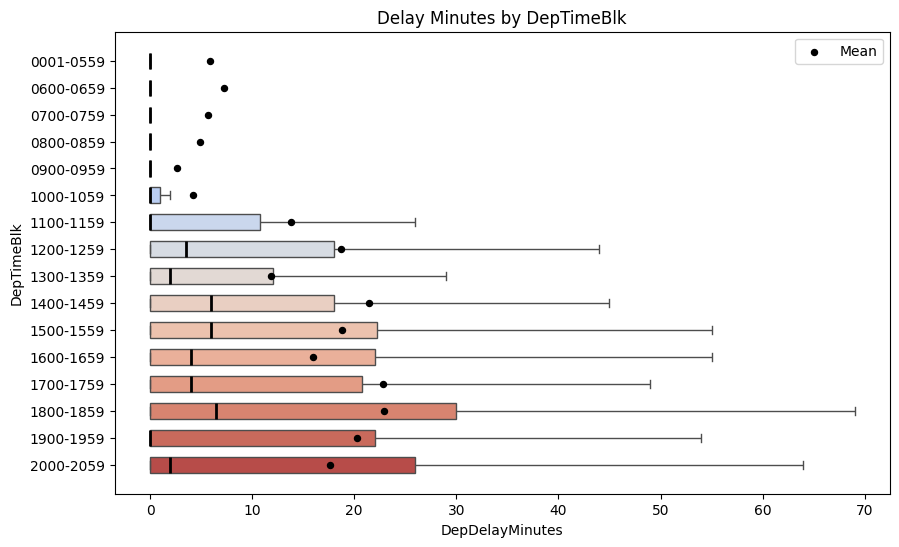

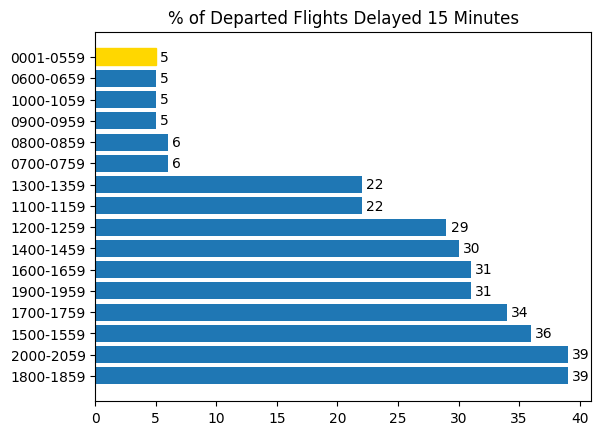


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0900-0959           57                     3                       0
1000-1059          166                     4                       0
0800-0859           95                     5                       0
0001-0559          196                     6                       0
0700-0759          346                     6                       0
0600-0659          477                     7                       0
1300-1359          237                    12                       2
1100-1159          266                    14                       0
1600-1659          231                    16                       4
2000-2059          107                    18                       2
1200-1259          226                    19                       4
1500-1559          208                    19            

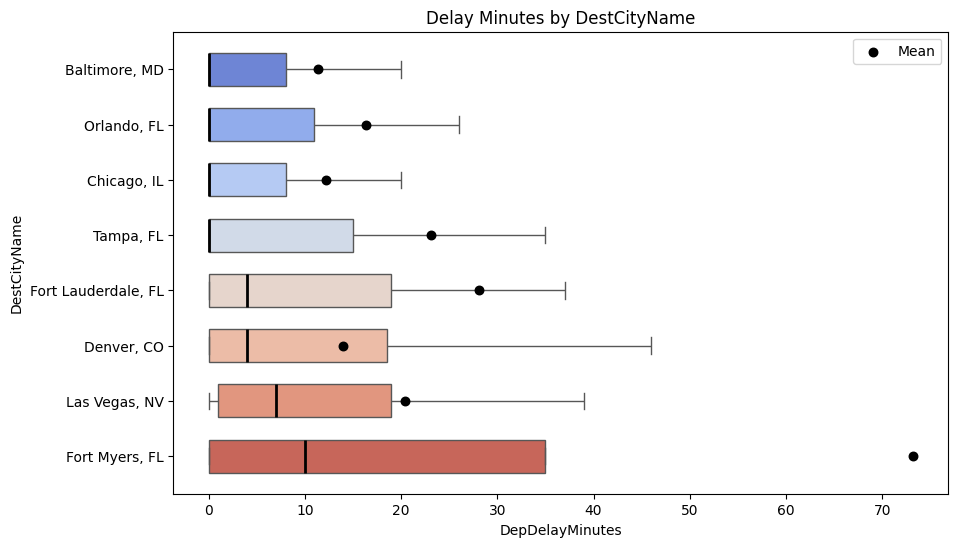

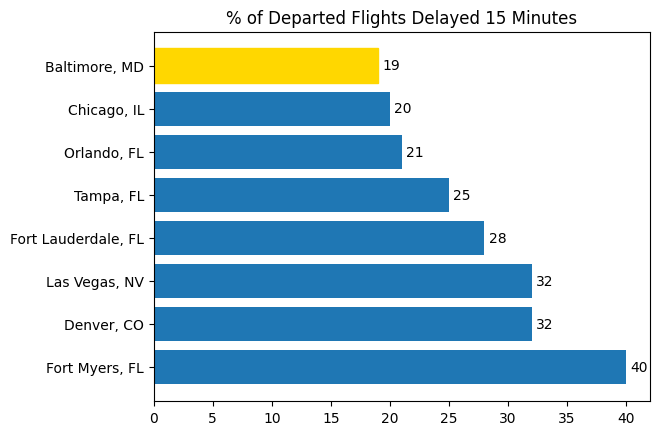


             Departed Flights By DestCityName:

                     Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                           
Baltimore, MD              1639                 11                    0
Chicago, IL                 706                 12                    0
Denver, CO                  187                 14                    4
Orlando, FL                 666                 16                    0
Las Vegas, NV                77                 20                    7
Tampa, FL                   199                 23                    0
Fort Lauderdale, FL          25                 28                    4
Fort Myers, FL                5                 73                   10

                     Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                                   
Baltimore, MD           1645                  19.0          0.0
Chicago, IL              712          

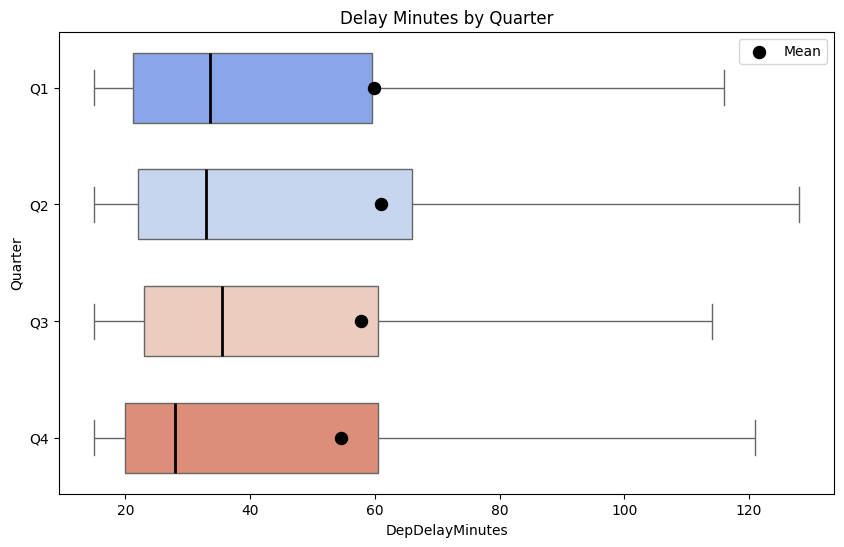


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4              143                    55                      28
Q3              232                    58                      36
Q1              170                    60                      34
Q2              197                    61                      33




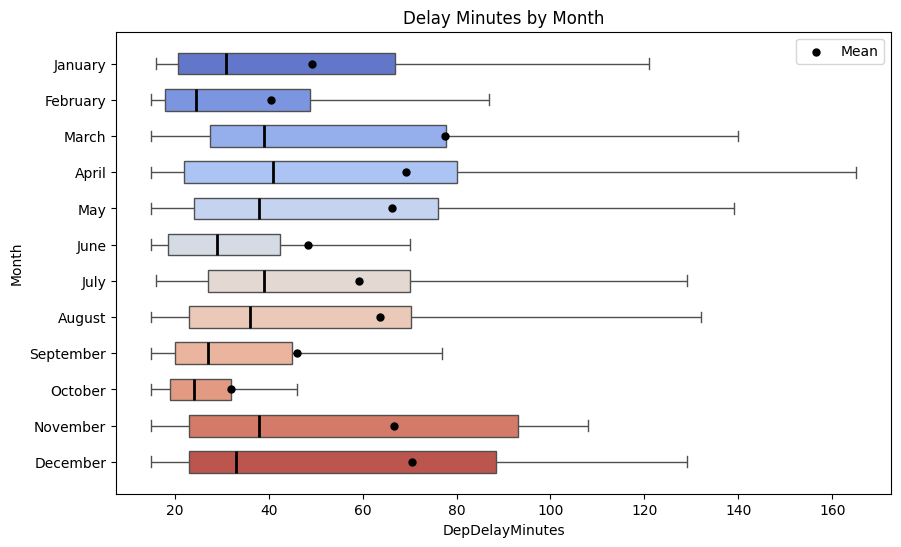


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October            57                    32                      24
February           38                    40                      24
September          57                    46                      27
June               67                    48                      29
January            56                    49                      31
July               85                    59                      39
August             90                    64                      36
May                77                    66                      38
November           23                    67                      38
April              53                    69                      41
December           63                    70                      33
March              76                    77                      39




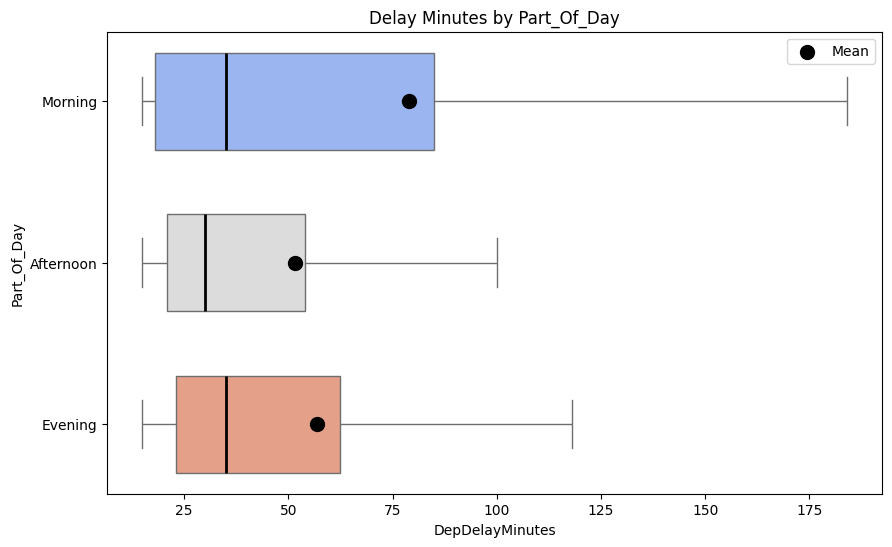


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Afternoon           321                    52                      30
Evening             290                    57                      35
Morning             131                    79                      35




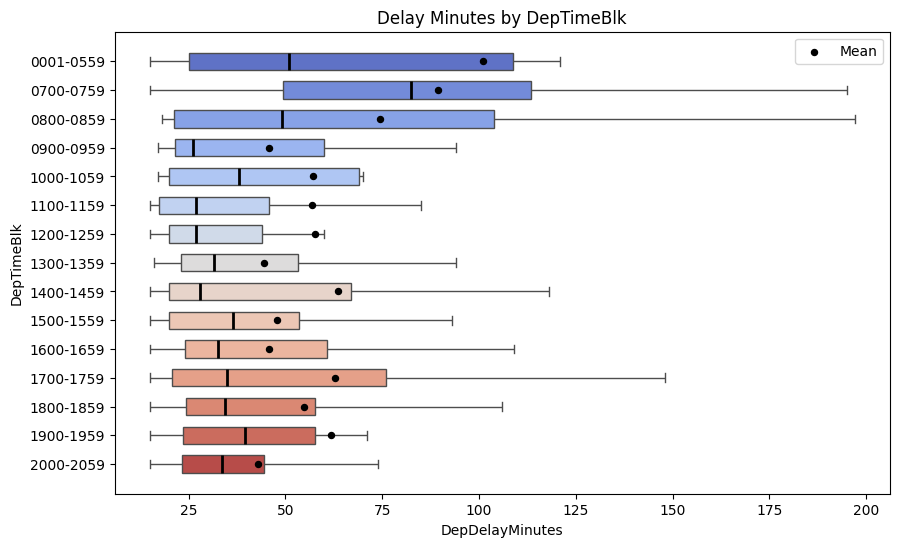

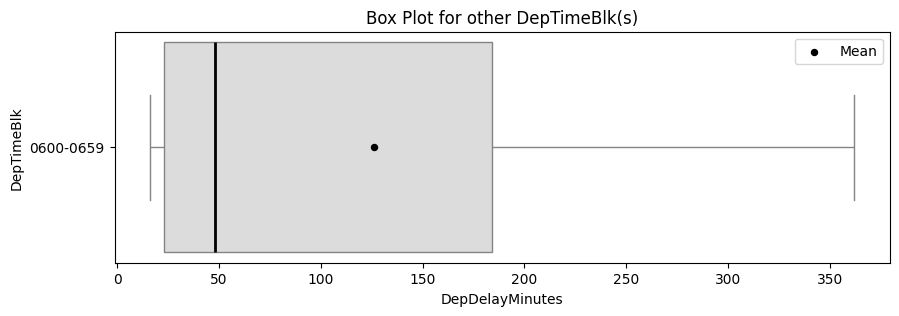


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
2000-2059           42                    43                      34
1300-1359           52                    44                      32
0900-0959            3                    46                      26
1600-1659           72                    46                      32
1500-1559           74                    48                      36
1800-1859          106                    55                      34
1100-1159           58                    57                      27
1000-1059            9                    57                      38
1200-1259           66                    58                      27
1900-1959           34                    62                      40
1400-1459           57                    63                      28
1700-1759          108                    63            

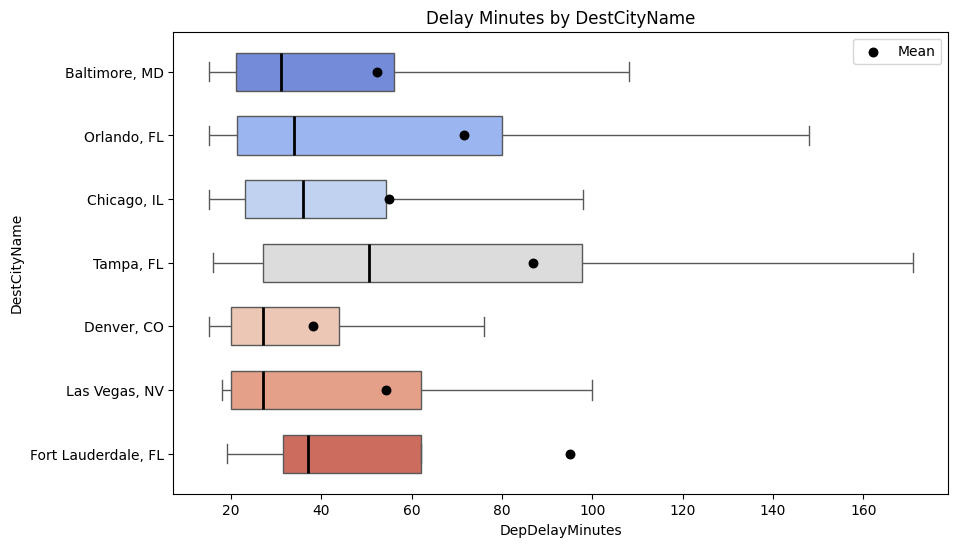

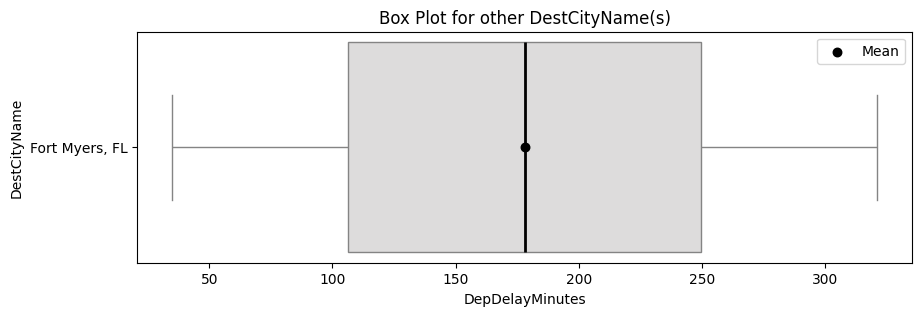


             Departed Flights By DestCityName:

                     Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                           
Denver, CO                   59                 38                   27
Baltimore, MD               317                 52                   31
Las Vegas, NV                25                 54                   27
Chicago, IL                 144                 55                   36
Orlando, FL                 138                 72                   34
Tampa, FL                    50                 87                   50
Fort Lauderdale, FL           7                 95                   37
Fort Myers, FL                2                178                  178



                          Piedmont:

% of Outliers for Delay Minutes is  21
The median is 0 minutes departed after scheduled time.
On average, flights depart 19 minutes delayed.



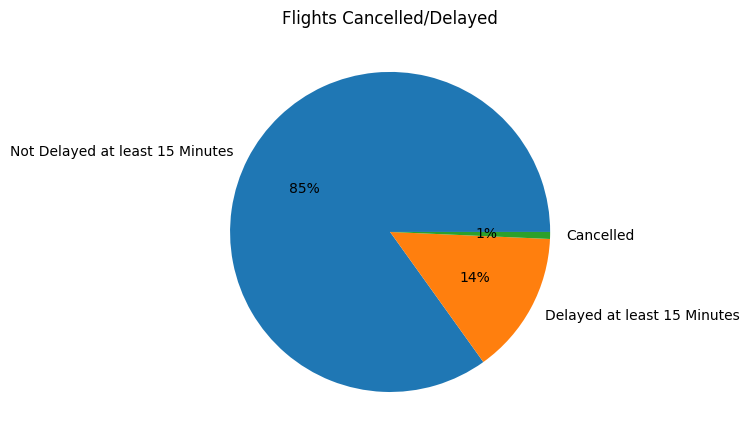


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes     1492  84.9
Delayed at least 15 Minutes          254  14.4
Cancelled                             12   0.7



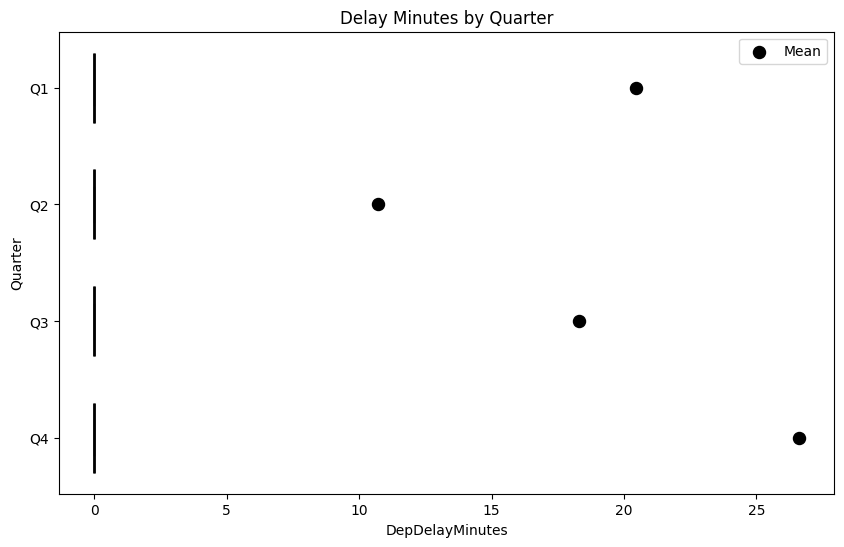

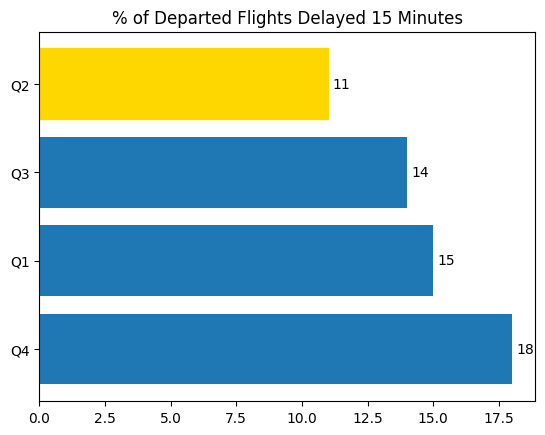


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q2              463                    11                       0
Q3              477                    18                       0
Q1              327                    20                       0
Q4              479                    27                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q2           464                  11.0          0.0
Q3           481                  14.0          1.0
Q1           333                  15.0          2.0
Q4           480                  18.0          0.0



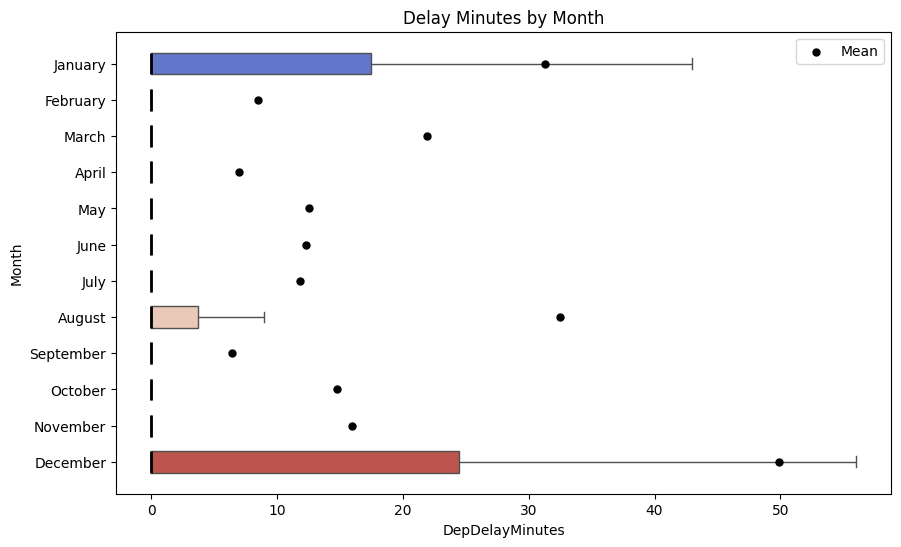

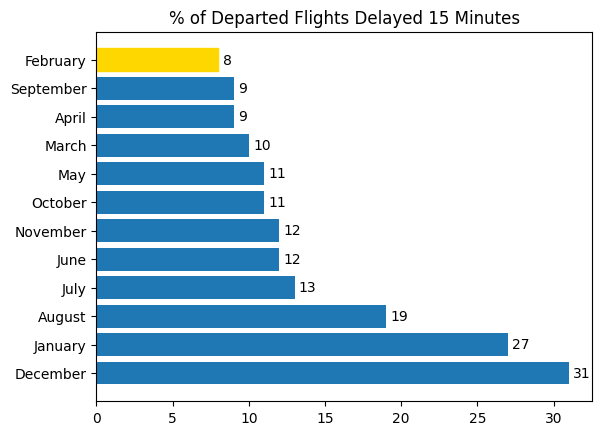


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
September         114                     6                       0
April             144                     7                       0
February          116                     8                       0
June              174                    12                       0
July              183                    12                       0
May               145                    13                       0
October           170                    15                       0
November          153                    16                       0
March              96                    22                       0
January           115                    31                       0
August            180                    32                       0
December          156                    50                       0

     

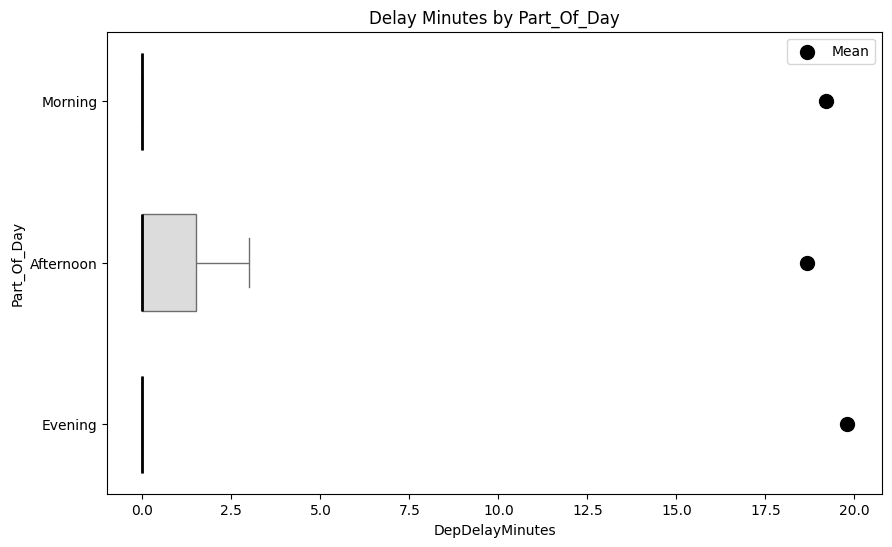

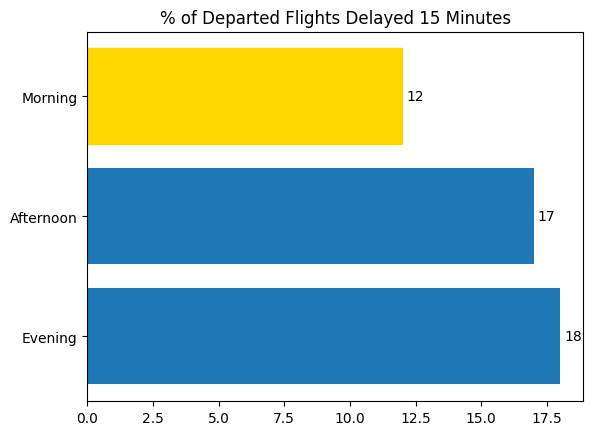


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Afternoon           855                    19                       0
Morning             814                    19                       0
Evening              77                    20                       0

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning          820                  12.0          1.0
Afternoon        858                  17.0          0.0
Evening           80                  18.0          4.0



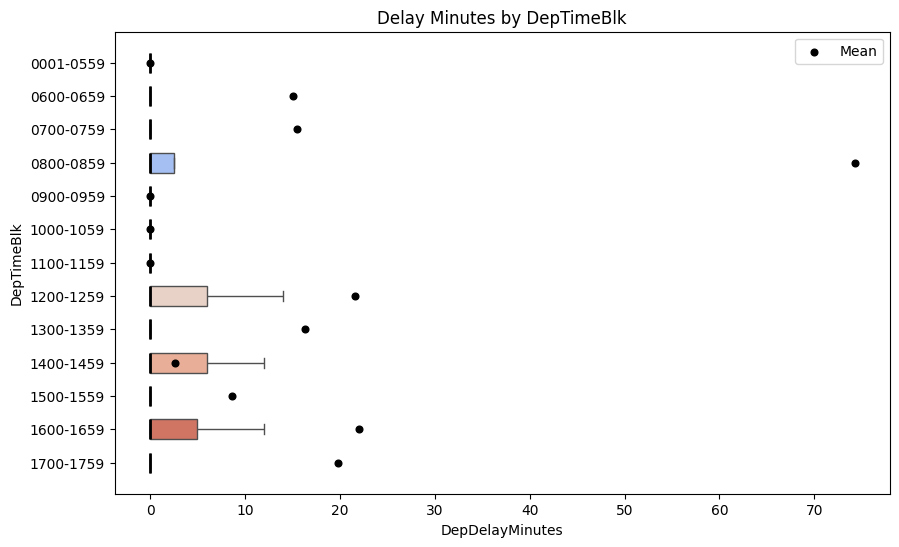

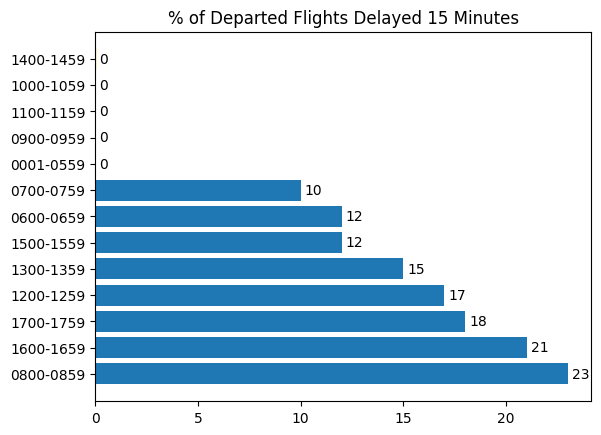


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
0001-0559            5                     0                       0
1100-1159            2                     0                       0
1000-1059            1                     0                       0
0900-0959            1                     0                       0
1400-1459           13                     3                       0
1500-1559           93                     9                       0
0600-0659          337                    15                       0
0700-0759          412                    16                       0
1300-1359          219                    16                       0
1700-1759           77                    20                       0
1600-1659          269                    22                       0
1200-1259          261                    22            

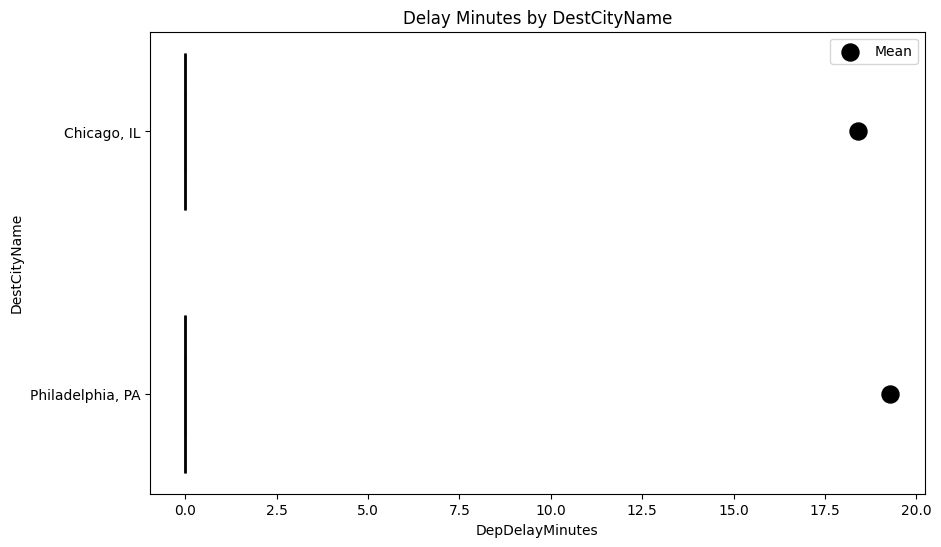

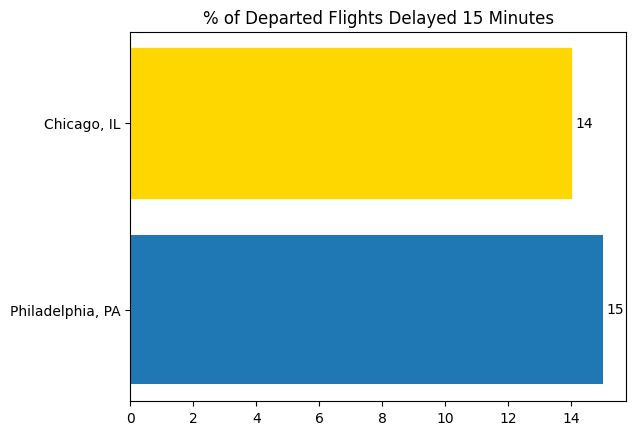


             Departed Flights By DestCityName:

                  Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                        
Chicago, IL              609                 18                    0
Philadelphia, PA        1137                 19                    0

                  Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                                
Chicago, IL           615                  13.0          1.0
Philadelphia, PA     1143                  15.0          1.0


                          American:

% of Outliers for Delay Minutes is  17
The median is 0 minutes departed after scheduled time.
On average, flights depart 23 minutes delayed.



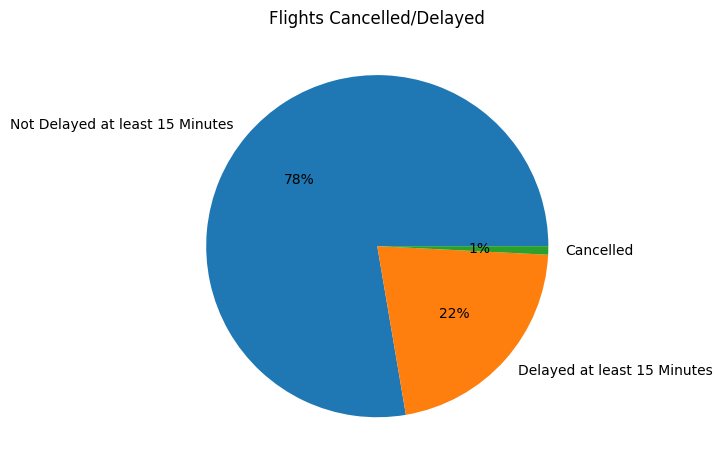


                                 Flights     %
DepDel15                                      
Not Delayed at least 15 Minutes     1128  77.6
Delayed at least 15 Minutes          313  21.5
Cancelled                             12   0.8



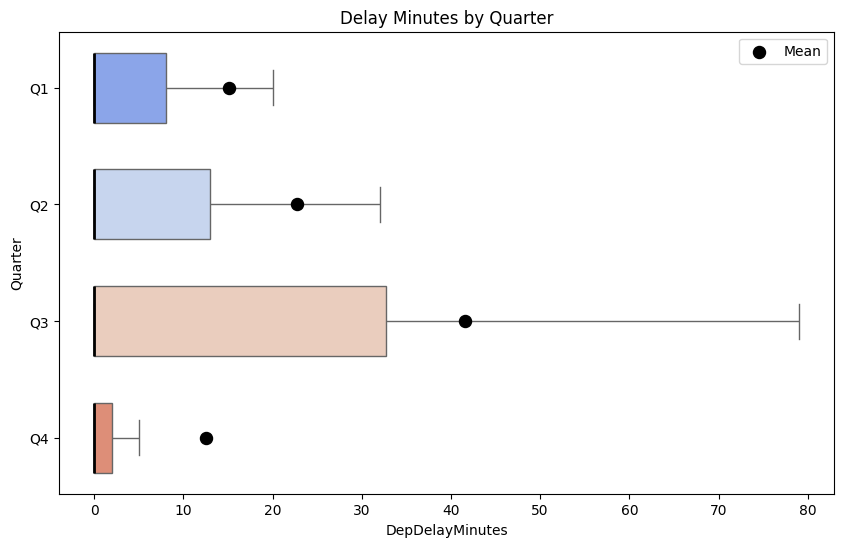

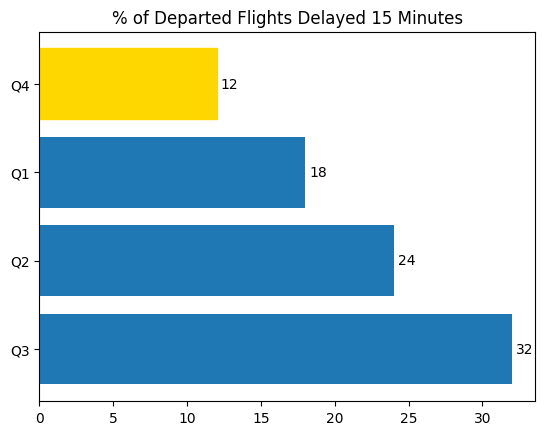


             Departed Flights By Quarter:

         Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Quarter                                                          
Q4              361                    13                       0
Q1              352                    15                       0
Q2              358                    23                       0
Q3              370                    42                       0

         Flights  % Delayed 15 Minutes  % Cancelled
Quarter                                            
Q4           361                  12.0          0.0
Q1           356                  18.0          1.0
Q2           360                  24.0          1.0
Q3           376                  32.0          2.0



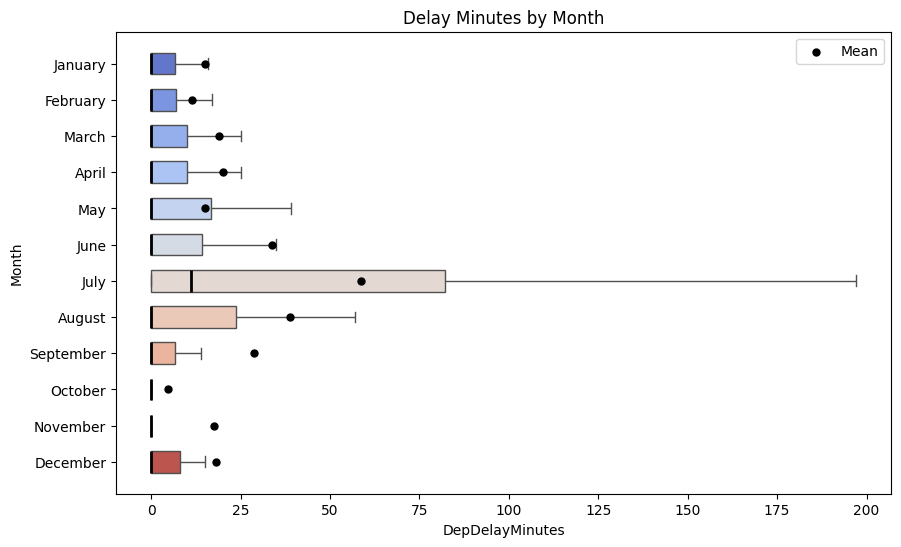

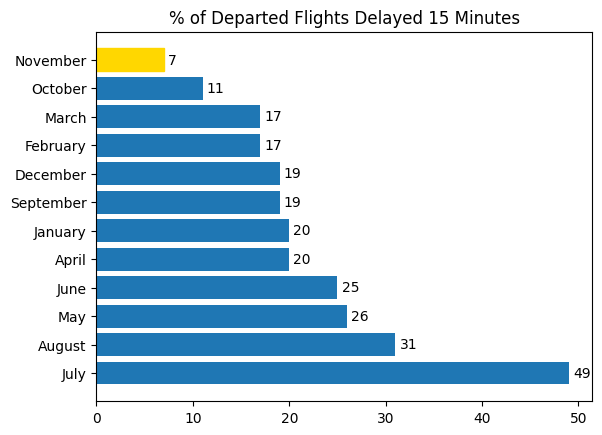


             Departed Flights By Month:

           Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Month                                                              
October           145                     5                       0
February          114                    11                       0
May               122                    15                       0
January           122                    15                       0
December          109                    18                       0
November          107                    18                       0
March             116                    19                       0
April             120                    20                       0
September         134                    29                       0
June              116                    34                       0
August            118                    39                       0
July              118                    59                      11

     

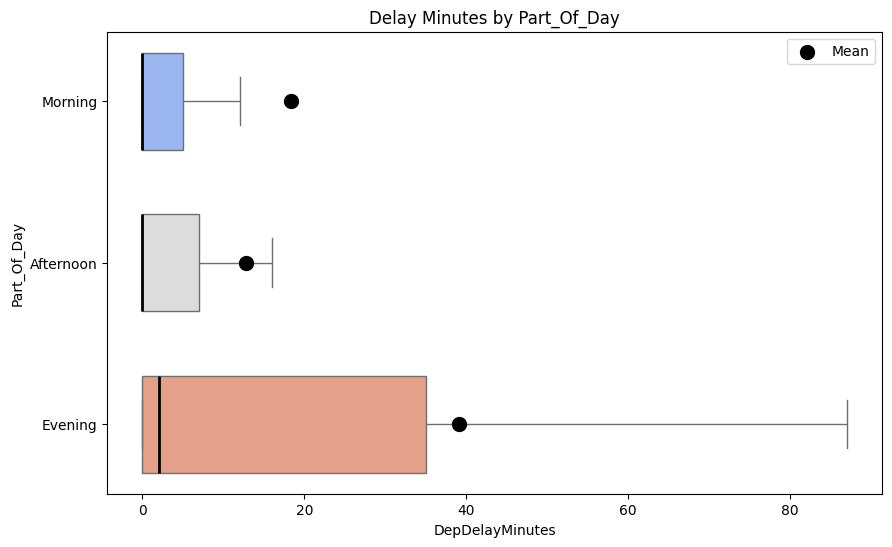

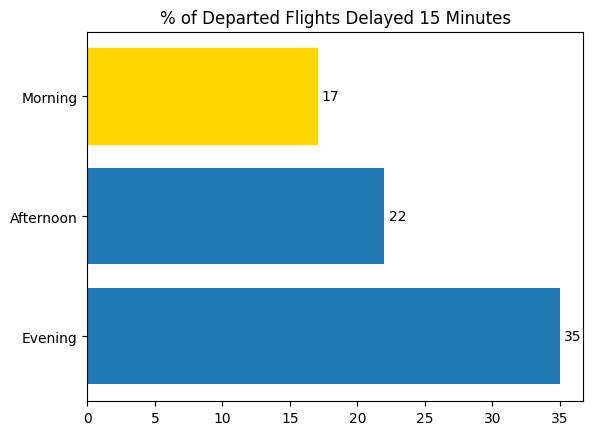


             Departed Flights By Part_Of_Day:

             Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
Part_Of_Day                                                          
Afternoon            37                    13                       0
Morning            1059                    18                       0
Evening             345                    39                       2

             Flights  % Delayed 15 Minutes  % Cancelled
Part_Of_Day                                            
Morning         1068                  17.0          1.0
Afternoon         37                  22.0          0.0
Evening          348                  34.0          1.0



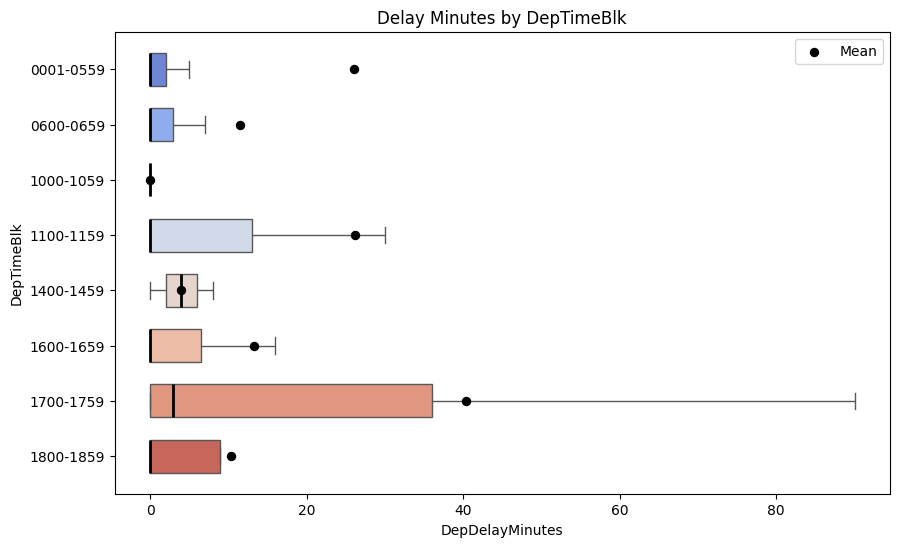

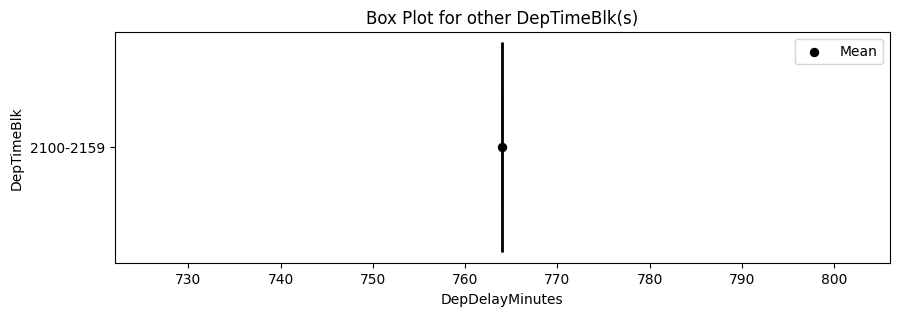

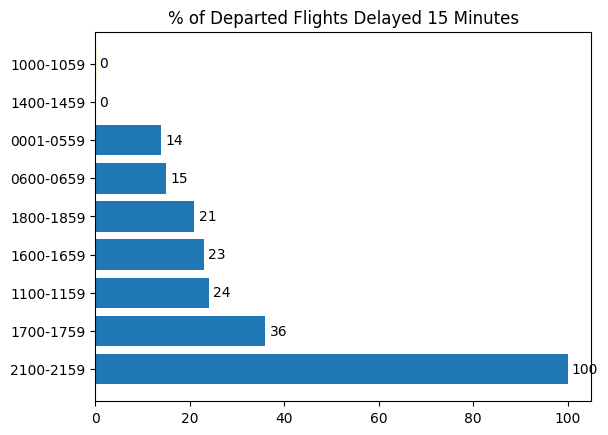


             Departed Flights By DepTimeBlk:

            Departures  Mean_Minutes_Delayed  Median_Minutes_Delayed
DepTimeBlk                                                          
1000-1059            1                     0                       0
1400-1459            2                     4                       4
1800-1859           39                    10                       0
0600-0659          567                    12                       0
1600-1659           35                    13                       0
0001-0559          140                    26                       0
1100-1159          351                    26                       0
1700-1759          305                    40                       3
2100-2159            1                   764                     764

            Flights  % Delayed 15 Minutes  % Cancelled
DepTimeBlk                                            
1000-1059         1                   0.0          0.0
1400-1459         2         

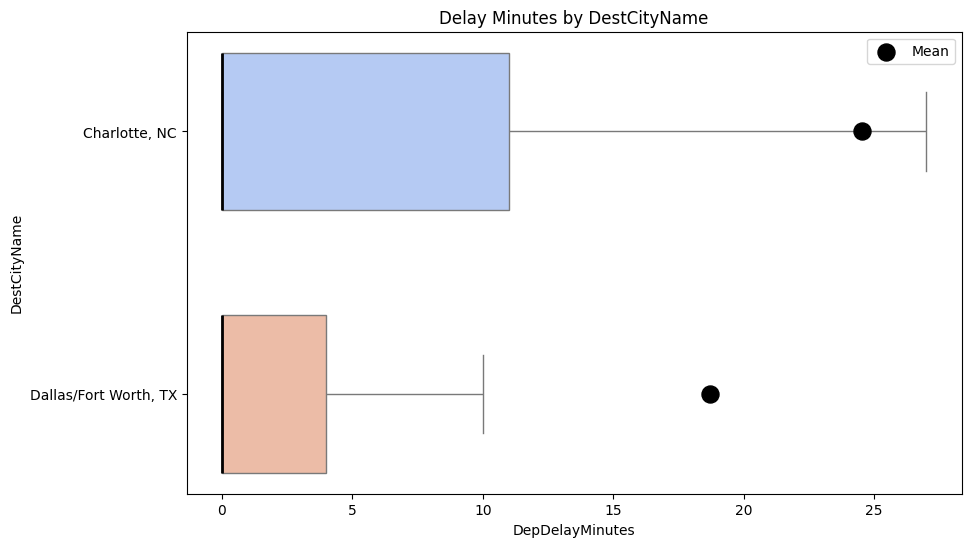

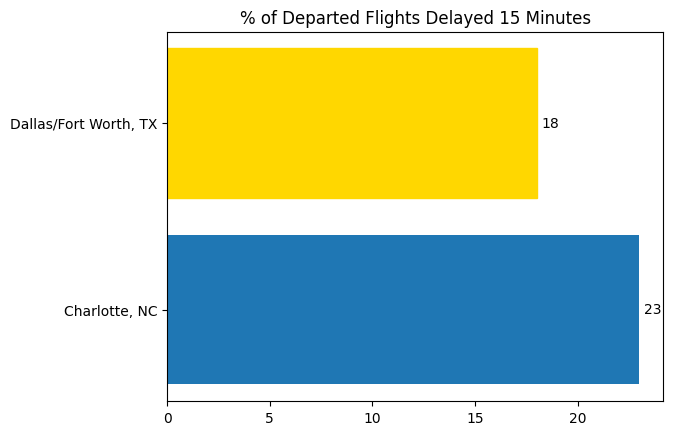


             Departed Flights By DestCityName:

                       Departures  Mean_Mins_Delayed  Median_Mins_Delayed
DestCityName                                                             
Dallas/Fort Worth, TX         347                 19                    0
Charlotte, NC                1094                 25                    0

                       Flights  % Delayed 15 Minutes  % Cancelled
DestCityName                                                     
Dallas/Fort Worth, TX      350                  18.0          1.0
Charlotte, NC             1103                  23.0          1.0



In [ ]:
Airport_delays_by_Airline(ALB_Dep, 'DepDelayMinutes', 'DepDel15', 'DepTimeBlk', 'DestCityName', 'Departures')

**Arrivals**

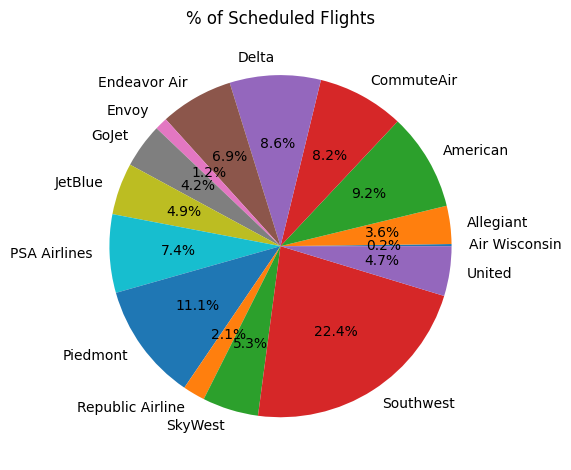

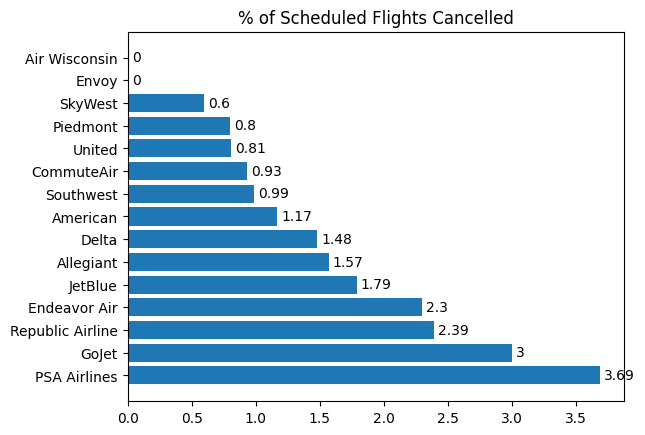

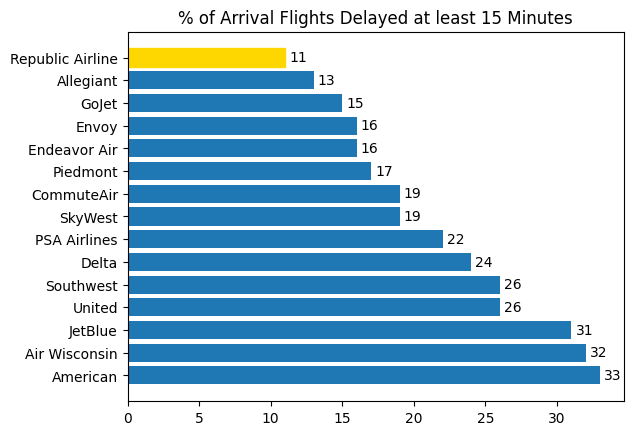


         % of Arrival Flights Delayed at least 15 Minutes: 

                    Arrivals  Delayed 15 Mins %
Operating_Airline                              
Republic Airline         327               11.0
Allegiant                564               13.0
GoJet                    647               15.0
Endeavor Air            1064               16.0
Envoy                    186               16.0
Piedmont                1742               17.0
CommuteAir              1275               19.0
SkyWest                  829               19.0
PSA Airlines            1123               22.0
Delta                   1332               24.0
United                   739               26.0
Southwest               3498               26.0
JetBlue                  766               31.0
Air Wisconsin             25               32.0
American                1436               33.0

           % of Scheduled Flights Cancelled: 

                    Flights  Cancelled %
Operating_Airline                

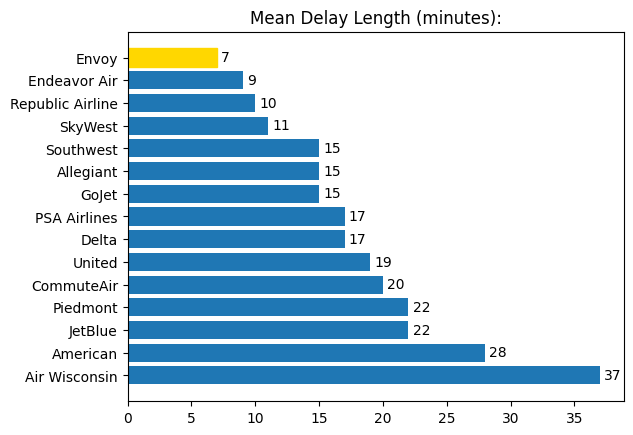


                          Delay Length: 

                    Arrivals  Mean_Mins_Delayed  Median_Mins_Delayed
Operating_Airline                                                   
Envoy                    186                  7                    0
Endeavor Air            1064                  9                    0
Republic Airline         327                 10                    0
SkyWest                  829                 11                    0
Allegiant                564                 15                    0
Southwest               3498                 15                    0
GoJet                    647                 15                    0
Delta                   1332                 17                    0
PSA Airlines            1123                 17                    0
United                   739                 19                    0
CommuteAir              1275                 20                    0
JetBlue                  766                 22             

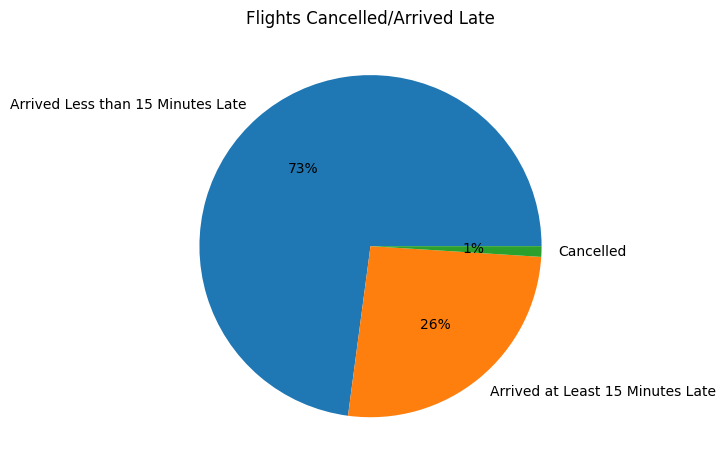


                                   Flights     %
Arrived Less than 15 Minutes Late     2576  72.9
Arrived at Least 15 Minutes Late       922  26.1
Cancelled                               35   1.0



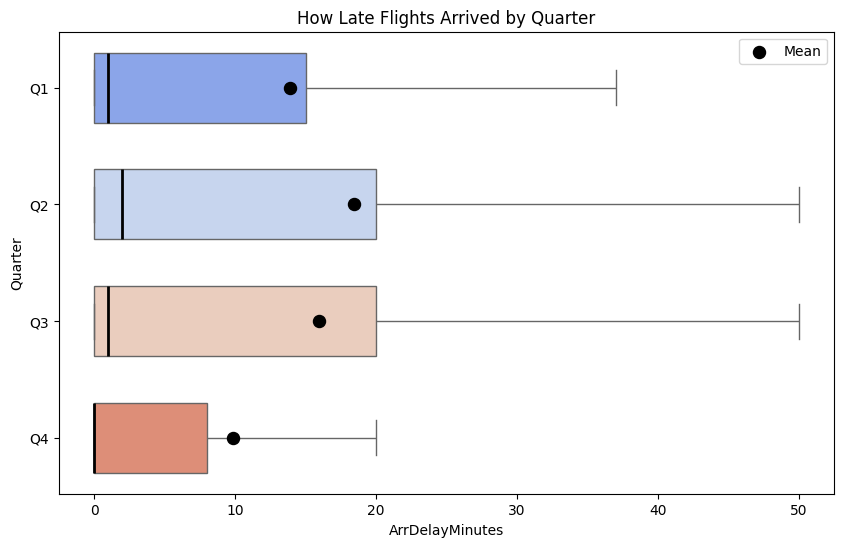

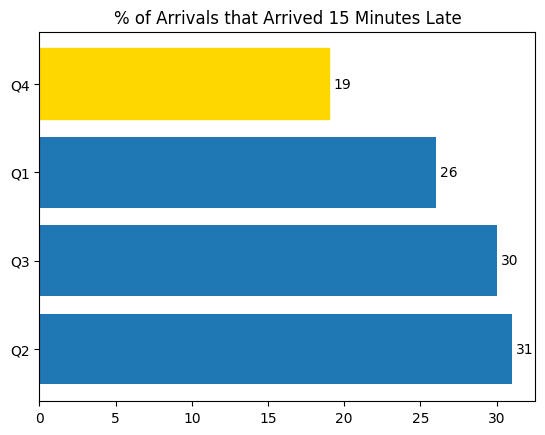


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4            879               10                  0
Q1            836               14                  1
Q3            946               16                  1
Q2            837               18                  2

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4           893               18.0          2.0
Q1           850               26.0          2.0
Q3           952               30.0          1.0
Q2           838               31.0          0.0



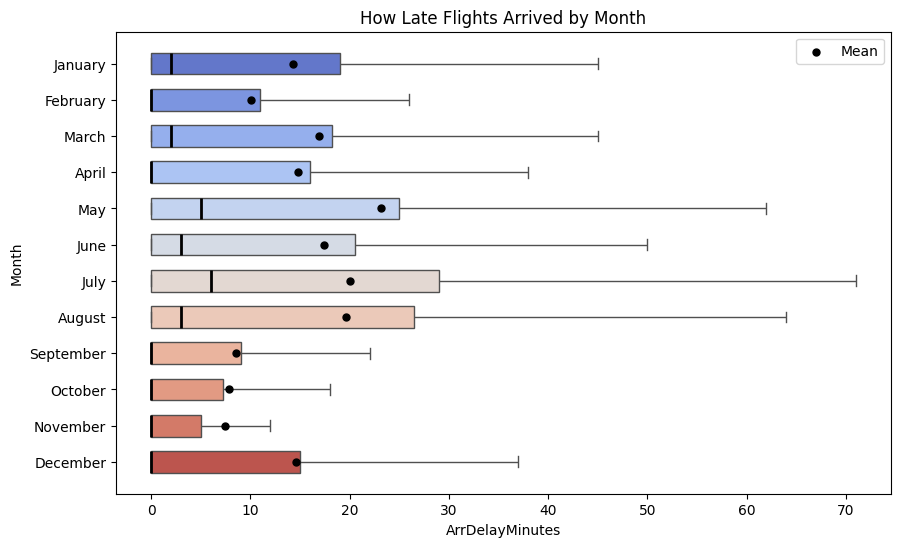

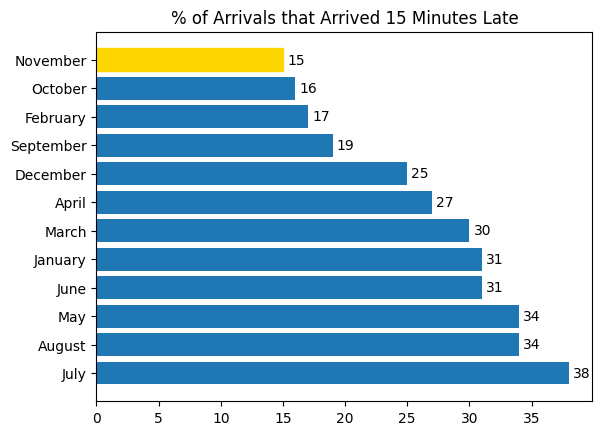


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
November        283                7                  0
October         320                8                  0
September       323                9                  0
February        265               10                  0
January         275               14                  2
December        276               15                  0
April           275               15                  0
March           296               17                  2
June            287               17                  3
August          327               20                  3
July            296               20                  6
May             275               23                  5

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
November       284               15.0          0.0
October        329   

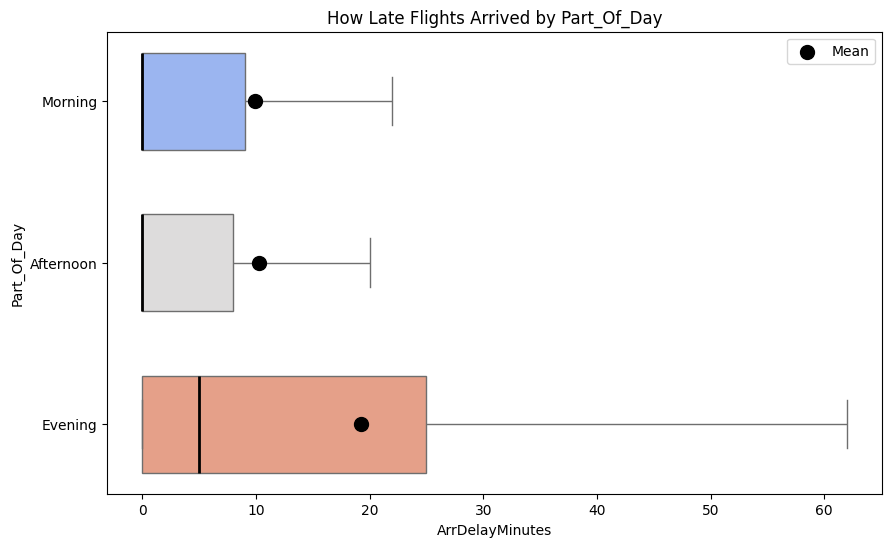

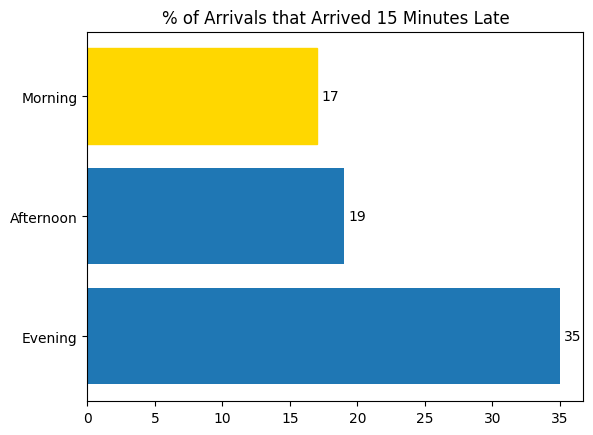


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Afternoon        1197               10                  0
Morning           619               10                  0
Evening          1682               19                  5

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning          629               17.0          2.0
Afternoon       1209               18.0          1.0
Evening         1695               35.0          1.0



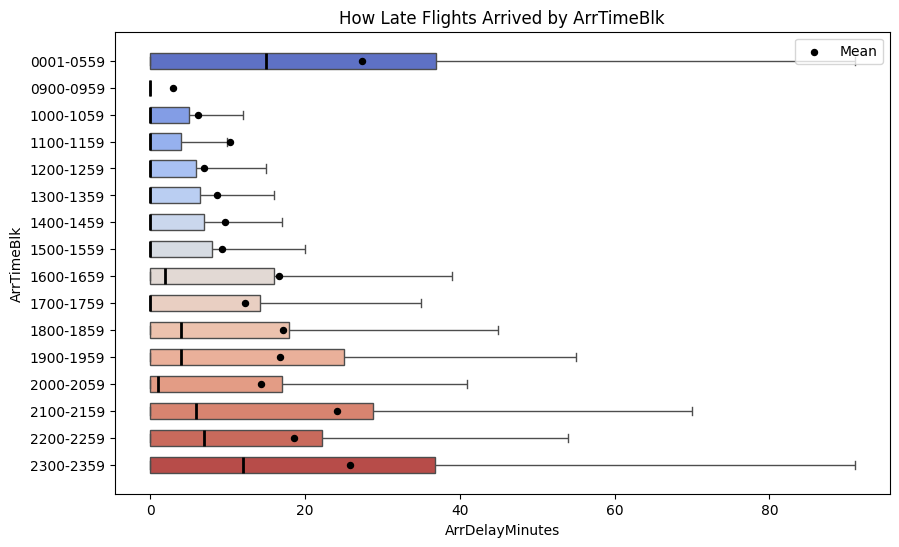

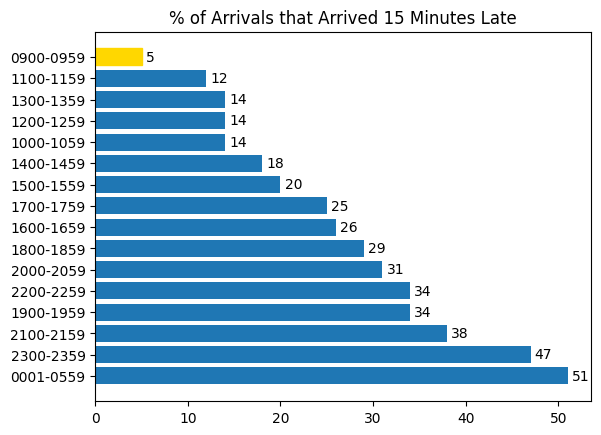


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0900-0959        149                3                  0
1000-1059        224                6                  0
1200-1259        347                7                  0
1300-1359        139                9                  0
1500-1559        256                9                  0
1100-1159        144               10                  0
1400-1459        178               10                  0
1700-1759        328               12                  0
2000-2059         59               14                  1
1900-1959        200               17                  4
1800-1859        195               17                  4
1600-1659        277               17                  2
2200-2259        304               19                  7
2100-2159        182               24                  6
2300-2359        414               26     

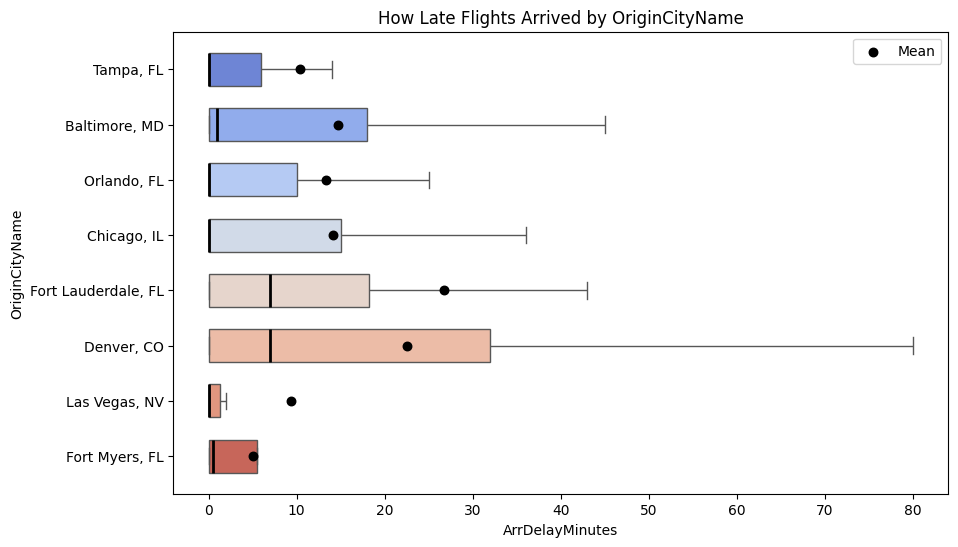

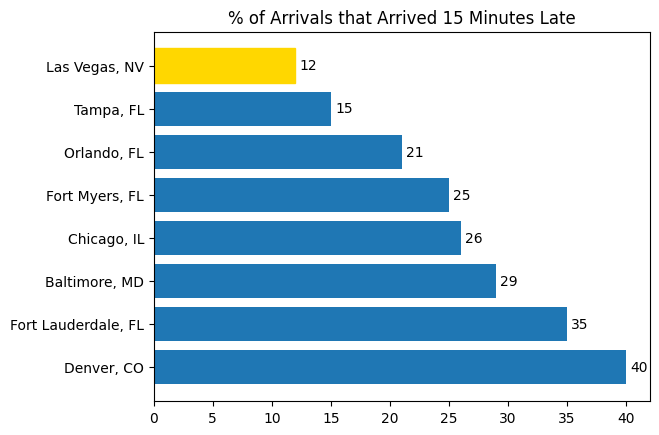


             Arrival Flights By OriginCityName:

                     Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                   
Fort Myers, FL              4                5                  0
Las Vegas, NV              76                9                  0
Tampa, FL                 178               10                  0
Orlando, FL               665               13                  0
Chicago, IL               707               14                  0
Baltimore, MD            1655               15                  1
Denver, CO                187               23                  7
Fort Lauderdale, FL        26               27                  7

                     Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                              
Las Vegas, NV             77               12.0          1.0
Tampa, FL                185               14.0          4.0
Orlando, FL              675               21

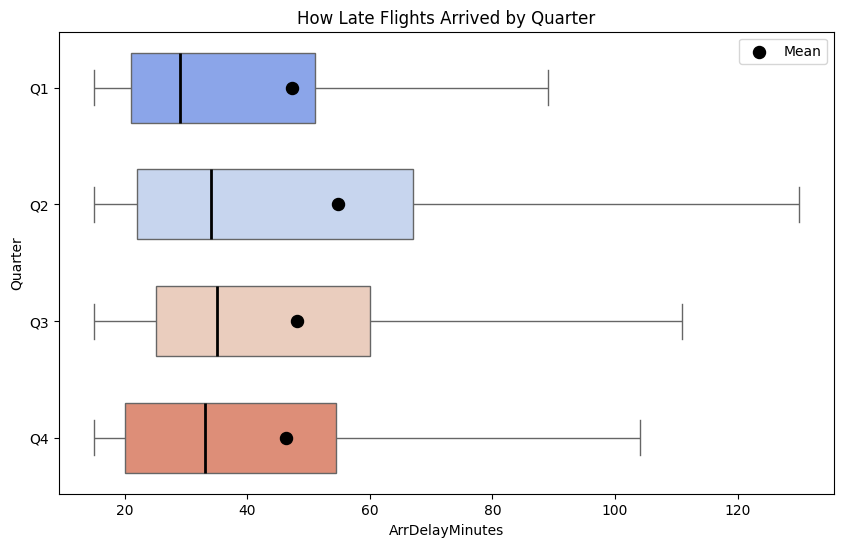


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4            163               46                 33
Q1            217               47                 29
Q3            285               48                 35
Q2            257               55                 34




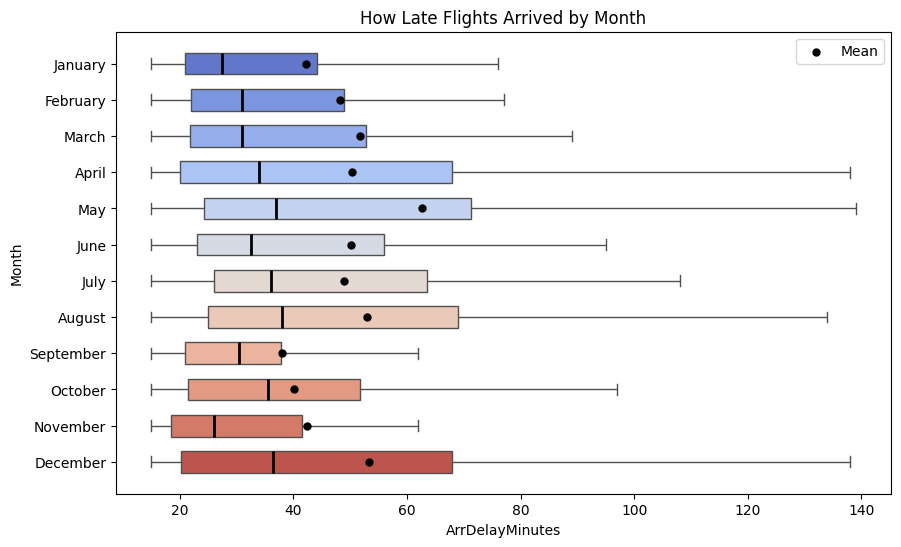


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
September        62               38                 30
October          50               40                 36
January          84               42                 28
November         43               42                 26
February         45               48                 31
July            111               49                 36
June             90               50                 32
April            73               50                 34
March            88               52                 31
December         70               53                 36
August          112               53                 38
May              94               63                 37




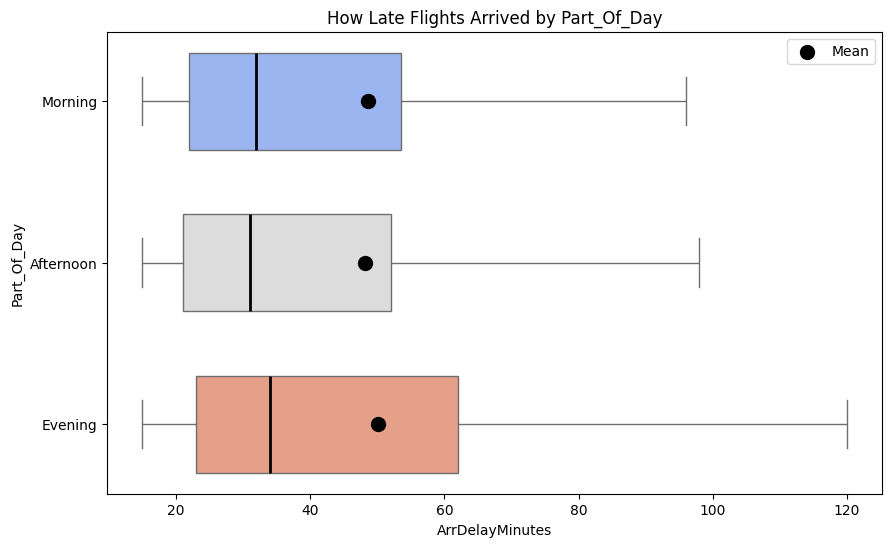


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Afternoon         222               48                 31
Morning           108               49                 32
Evening           592               50                 34




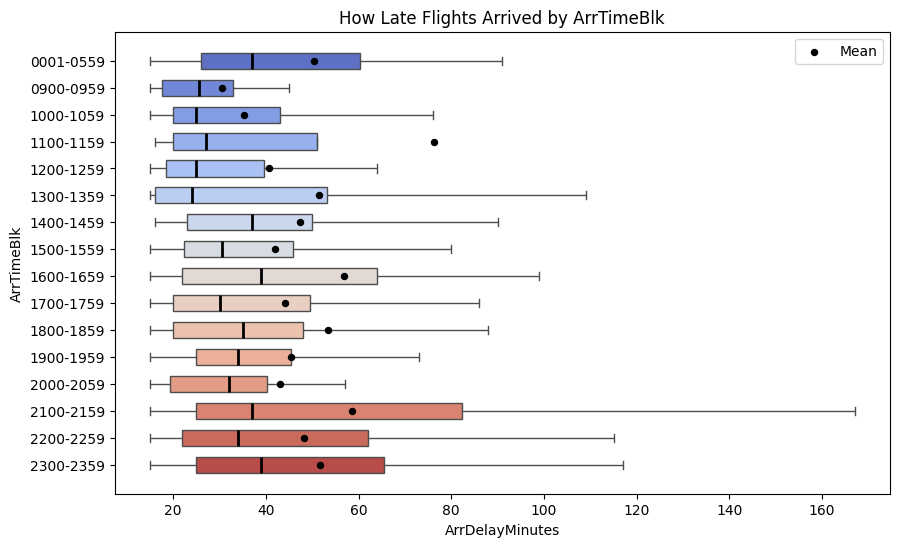


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
0900-0959          8               31                 26
1000-1059         31               35                 25
1200-1259         47               41                 25
1500-1559         50               42                 30
2000-2059         18               43                 32
1700-1759         82               44                 30
1900-1959         67               45                 34
1400-1459         32               47                 37
2200-2259        103               48                 34
0001-0559         52               50                 37
1300-1359         20               51                 24
2300-2359        195               52                 39
1800-1859         57               53                 35
1600-1659         73               57                 39
2100-2159         70               59     

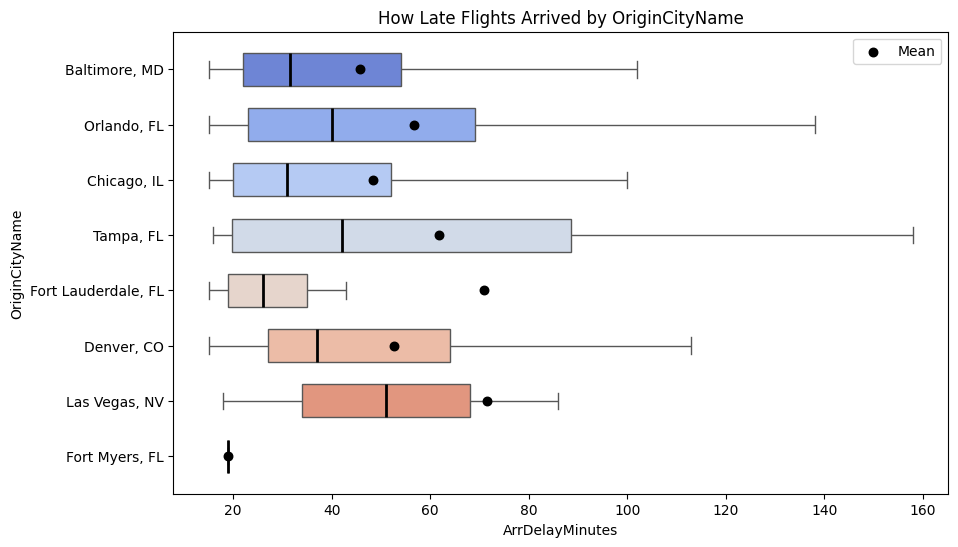


             Arrival Flights By OriginCityName:

                     Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                   
Fort Myers, FL              1               19                 19
Baltimore, MD             476               46                 32
Chicago, IL               186               48                 31
Denver, CO                 75               53                 37
Orlando, FL               140               57                 40
Tampa, FL                  26               62                 42
Fort Lauderdale, FL         9               71                 26
Las Vegas, NV               9               72                 51



                          Piedmont:

% of Outliers for Delay Minutes is  22
The median is 0 minutes arrived after scheduled time.
On average, flights arrive 22 minutes late.



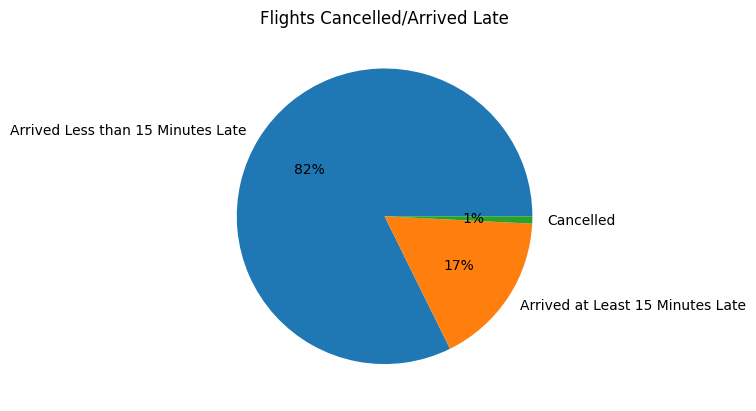


                                   Flights     %
Arrived Less than 15 Minutes Late     1445  82.3
Arrived at Least 15 Minutes Late       297  16.9
Cancelled                               14   0.8



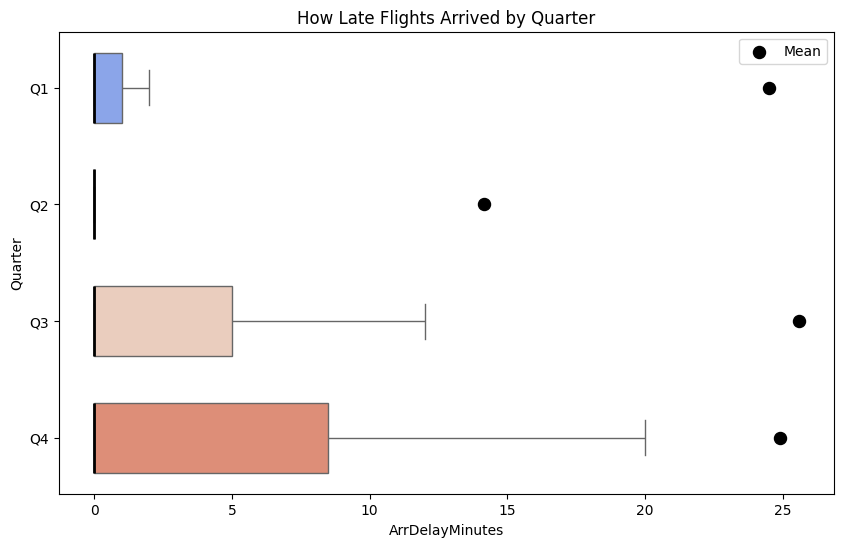

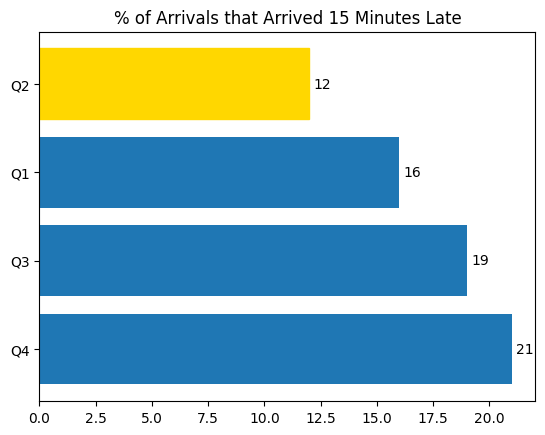


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q2            462               14                  0
Q1            328               24                  0
Q4            475               25                  0
Q3            477               26                  0

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q2           465               12.0          1.0
Q1           333               16.0          2.0
Q3           479               19.0          0.0
Q4           479               20.0          1.0



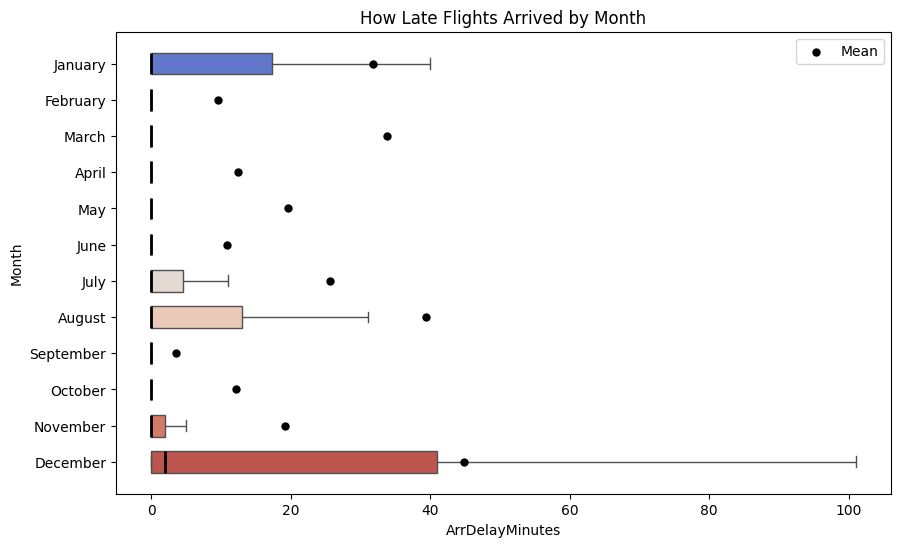

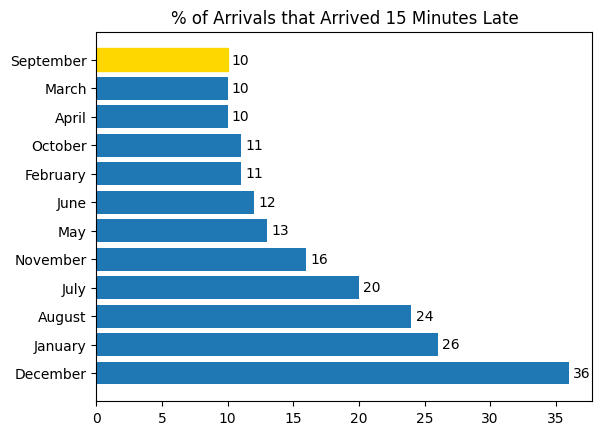


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
September       113                4                  0
February        116               10                  0
June            173               11                  0
April           144               12                  0
October         171               12                  0
November        151               19                  0
May             145               20                  0
July            183               26                  0
January         116               32                  0
March            96               34                  0
August          181               39                  0
December        153               45                  2

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
March           97               10.0          1.0
September      113   

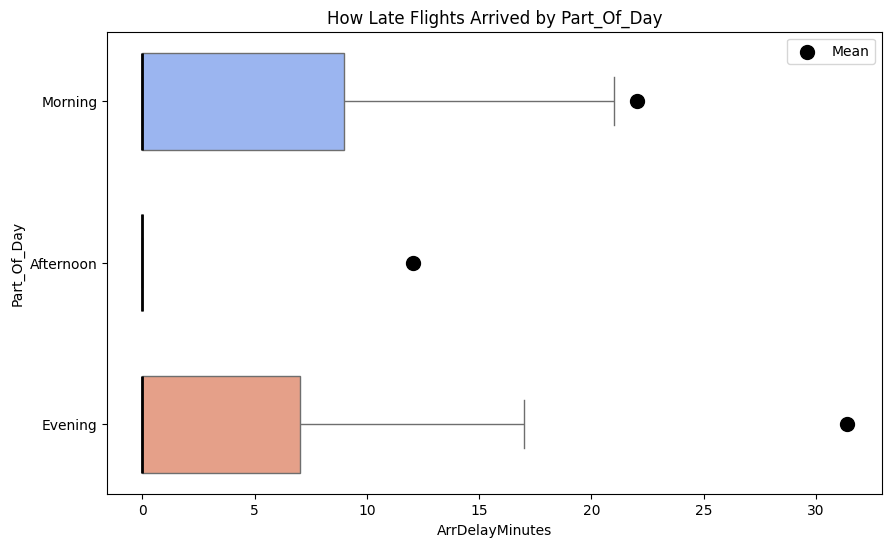

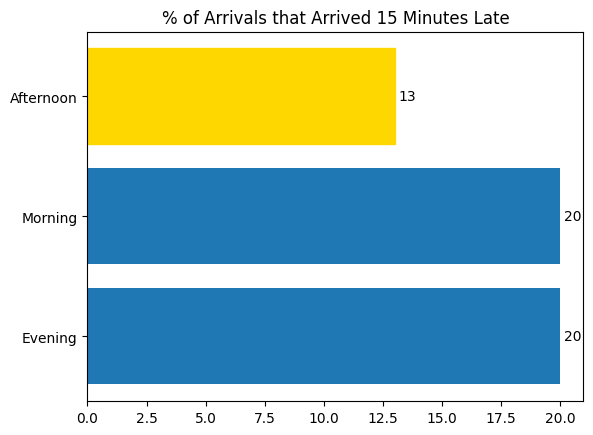


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Afternoon         769               12                  0
Morning           130               22                  0
Evening           843               31                  0

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Afternoon        771               13.0          0.0
Evening          854               20.0          1.0
Morning          131               20.0          1.0



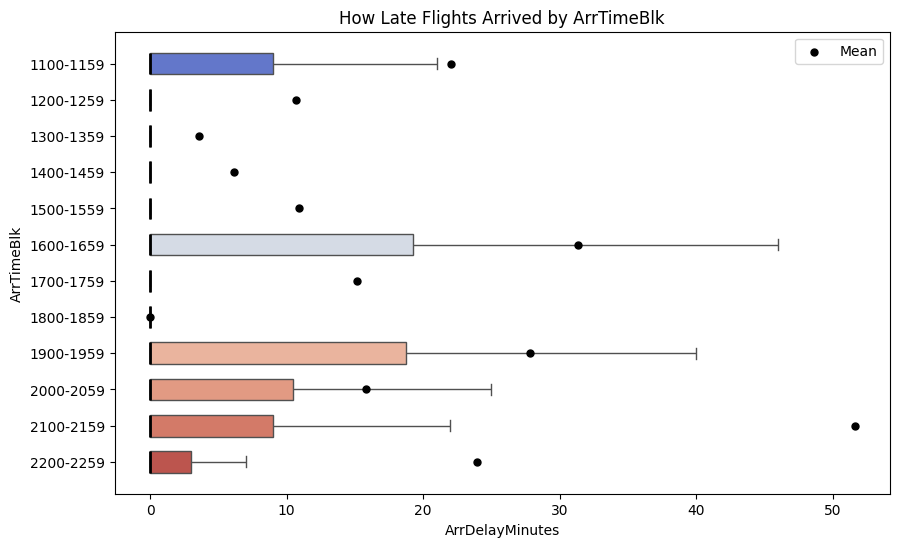

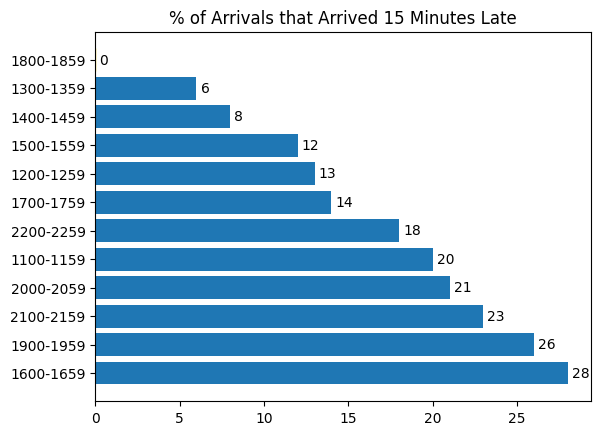


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
1800-1859          3                0                  0
1300-1359        103                4                  0
1400-1459         37                6                  0
1200-1259        287               11                  0
1500-1559        250               11                  0
1700-1759         94               15                  0
2000-2059         90               16                  0
1100-1159        130               22                  0
2200-2259        317               24                  0
1900-1959         62               28                  0
1600-1659         92               31                  0
2100-2159        277               52                  0

            Flights  % 15 Minutes Late  % Cancelled
ArrTimeBlk                                         
1800-1859         3                0.0          0.0

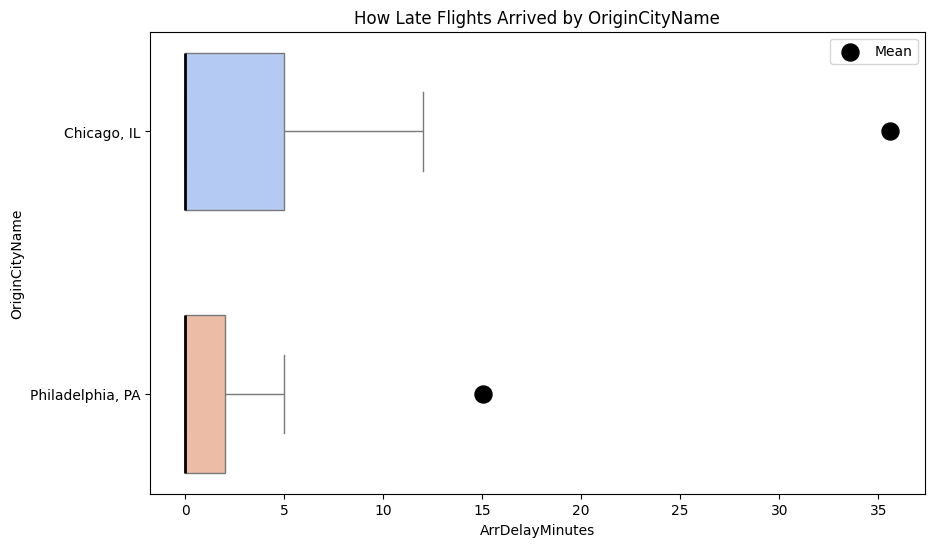

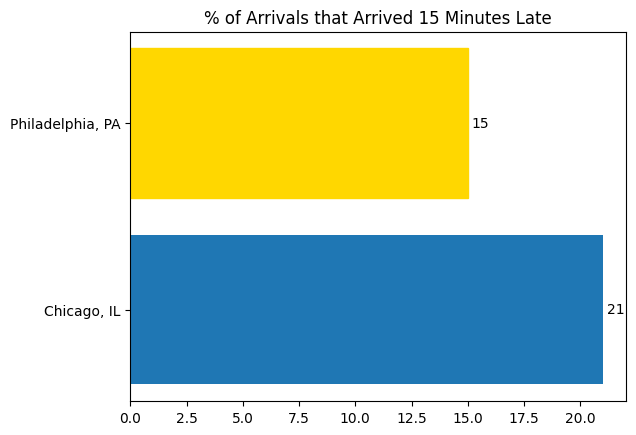


             Arrival Flights By OriginCityName:

                  Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                
Philadelphia, PA      1139               15                  0
Chicago, IL            603               36                  0

                  Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                           
Philadelphia, PA     1145               15.0          1.0
Chicago, IL           611               20.0          1.0


                          American:

% of Outliers for Delay Minutes is  13
The median is 2 minutes arrived after scheduled time.
On average, flights arrive 28 minutes late.



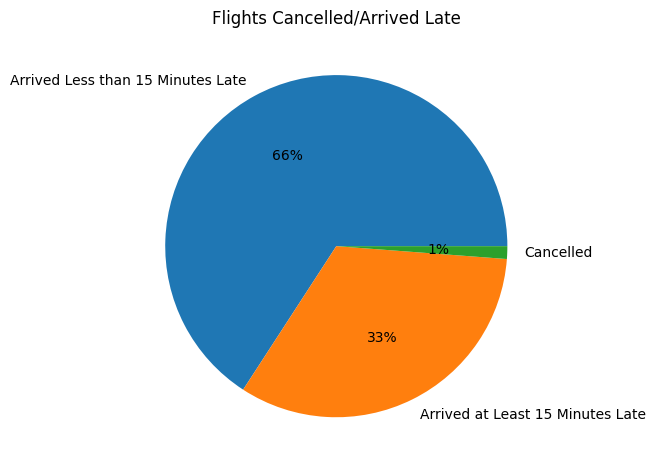


                                   Flights     %
Arrived Less than 15 Minutes Late      957  65.9
Arrived at Least 15 Minutes Late       479  33.0
Cancelled                               17   1.2



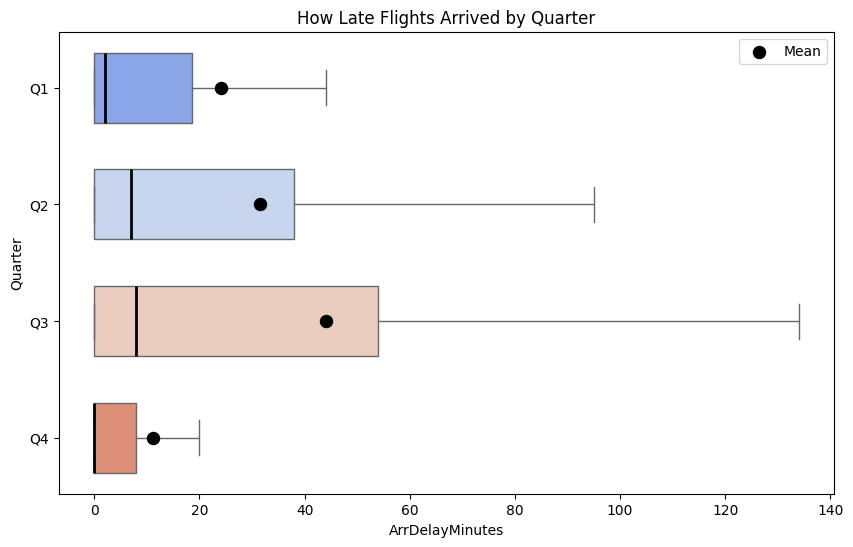

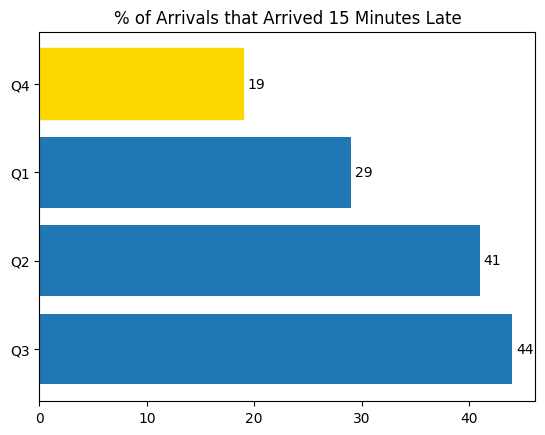


             Arrival Flights By Quarter:

         Arrivals  Mean Mins. Late  Median Mins. Late
Quarter                                              
Q4            359               11                  0
Q1            352               24                  2
Q2            356               31                  7
Q3            369               44                  8

         Flights  % 15 Minutes Late  % Cancelled
Quarter                                         
Q4           361               19.0          1.0
Q1           356               28.0          1.0
Q2           360               41.0          1.0
Q3           376               43.0          2.0



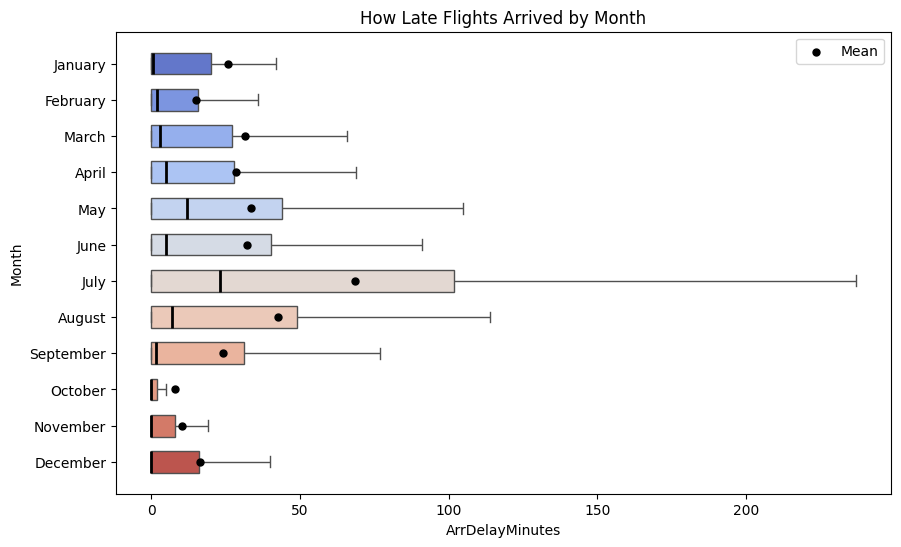

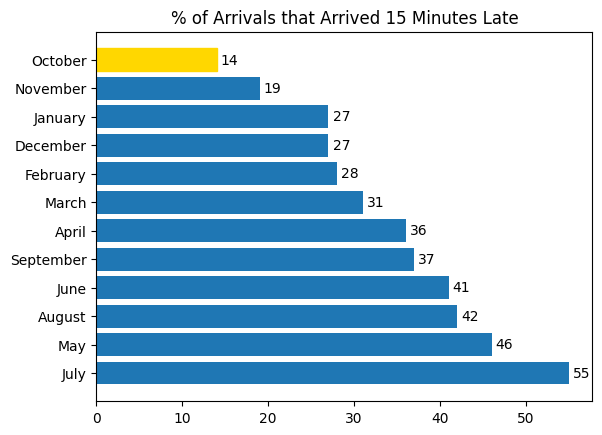


             Arrival Flights By Month:

           Arrivals  Mean Mins. Late  Median Mins. Late
Month                                                  
October         145                8                  0
November        107               10                  0
February        114               15                  2
December        107               16                  0
September       134               24                  2
January         122               26                  0
April           119               29                  5
March           116               32                  3
June            116               32                  5
May             121               34                 12
August          117               43                  7
July            118               69                 23

           Flights  % 15 Minutes Late  % Cancelled
Month                                             
October        145               14.0          0.0
November       107   

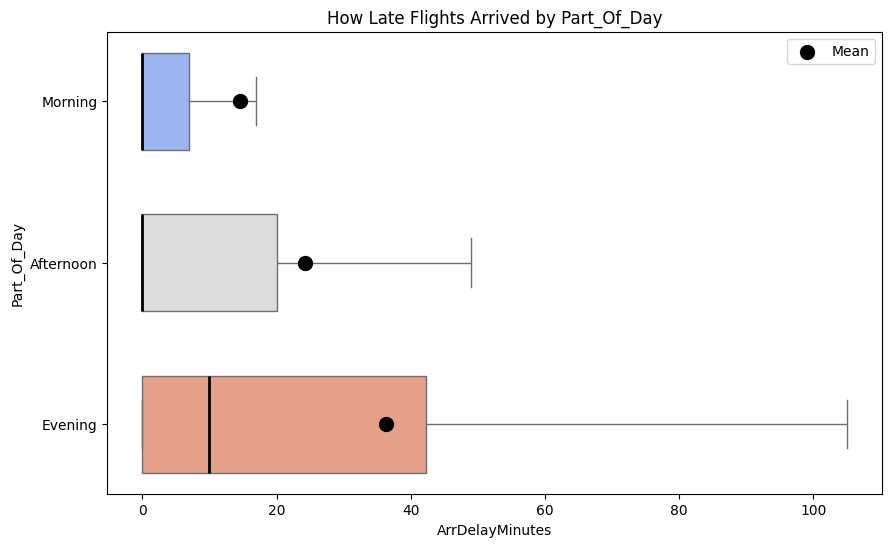

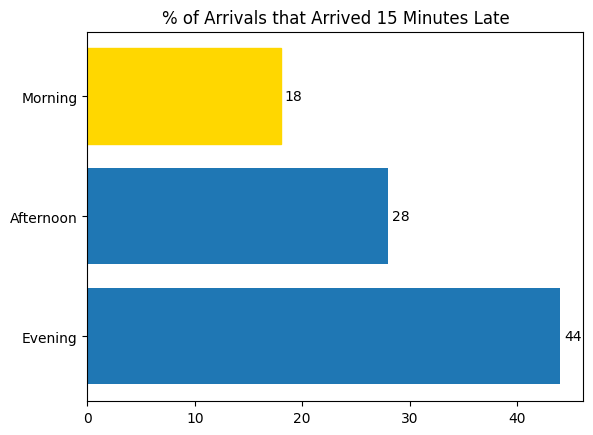


             Arrival Flights By Part_Of_Day:

             Arrivals  Mean Mins. Late  Median Mins. Late
Part_Of_Day                                              
Morning           364               15                  0
Afternoon         348               24                  0
Evening           724               36                 10

             Flights  % 15 Minutes Late  % Cancelled
Part_Of_Day                                         
Morning          367               18.0          1.0
Afternoon        351               28.0          1.0
Evening          735               43.0          1.0



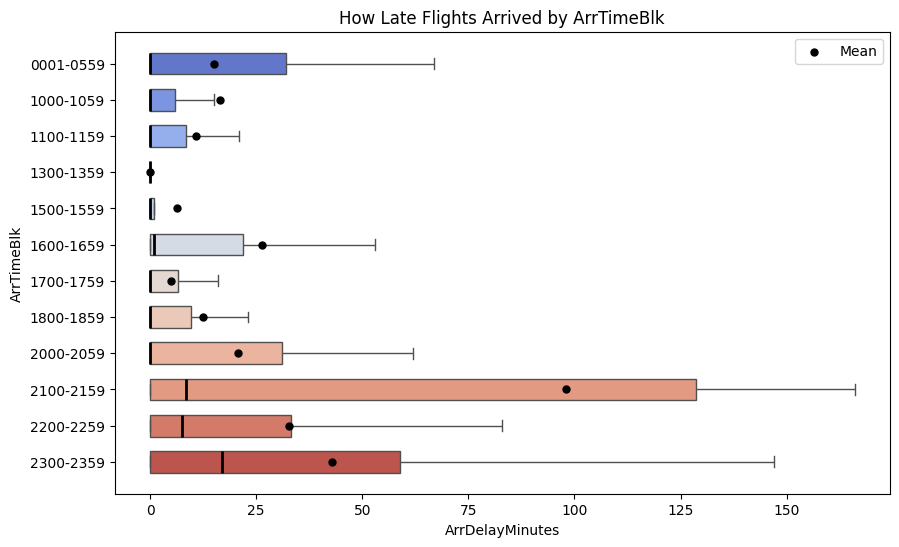

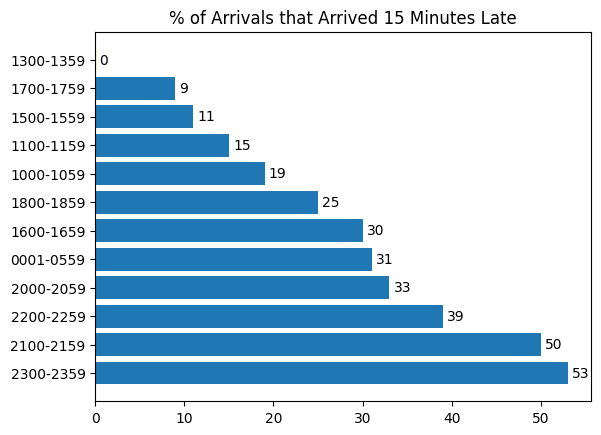


             Arrival Flights By ArrTimeBlk:

            Arrivals  Mean Mins. Late  Median Mins. Late
ArrTimeBlk                                              
1300-1359          2                0                  0
1700-1759         22                5                  0
1500-1559         37                6                  0
1100-1159        119               11                  0
1800-1859         20               12                  0
0001-0559         13               15                  0
1000-1059        232               16                  0
2000-2059          3               21                  0
1600-1659        309               26                  1
2200-2259        352               33                  8
2300-2359        321               43                 17
2100-2159          6               98                  8

            Flights  % 15 Minutes Late  % Cancelled
ArrTimeBlk                                         
1300-1359         2                0.0          0.0

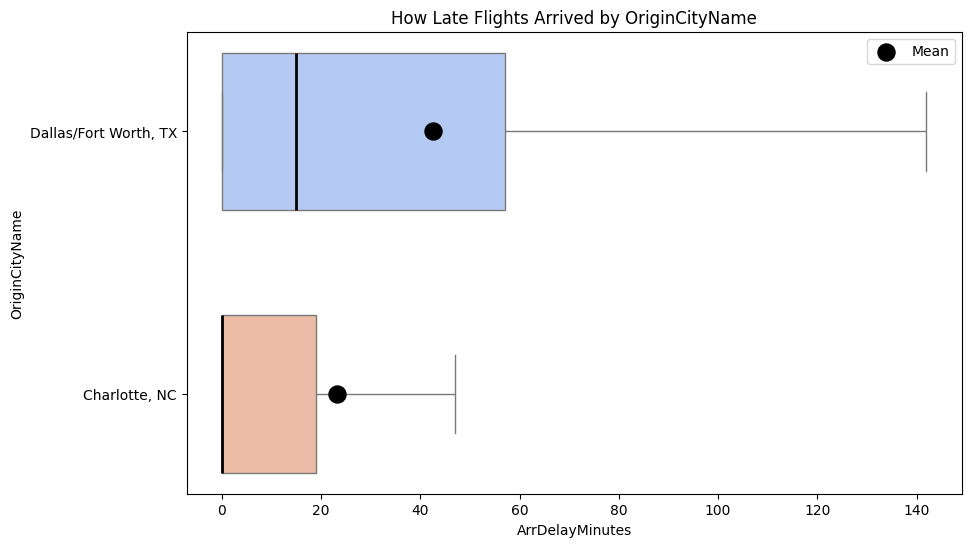

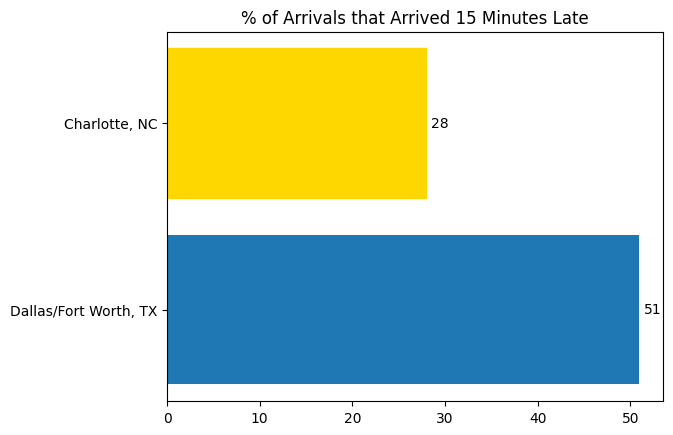


             Arrival Flights By OriginCityName:

                       Arrivals  Mean Mins. Late  Median Mins. Late
OriginCityName                                                     
Charlotte, NC              1091               23                  0
Dallas/Fort Worth, TX       345               43                 15

                       Flights  % 15 Minutes Late  % Cancelled
OriginCityName                                                
Charlotte, NC             1103               28.0          1.0
Dallas/Fort Worth, TX      350               50.0          1.0



In [ ]:
Airport_delays_by_Airline(ALB_Arr, 'ArrDelayMinutes', 'ArrDel15', 'ArrTimeBlk', 'OriginCityName', 'Arrivals')